In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as stats
import scipy.special as special
from statannotations.Annotator import Annotator

from scipy.stats import anderson, normaltest, ttest_ind, ks_2samp, mannwhitneyu

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
"""
s1 = []
p1 = []
s2 = []
p2 = []

minimo = clean_YA['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='M'))]['clustering'], clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='F'))]['clustering'])
    statt2,pvalue2 = stats.ttest_ind(clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='M'))]['clustering'], clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='F'))]['clustering'])
    s1.append(statt1)
    p1.append(pvalue1)
    s2.append(statt2)
    p2.append(pvalue2)
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])
"""

"\ns1 = []\np1 = []\ns2 = []\np2 = []\n\nminimo = clean_YA['density'].min()\n\nvar_density = np.arange(minimo,1.01,0.01).round(2)\n\nfor i in var_density:\n    statt1, pvalue1 = stats.mannwhitneyu(clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='M'))]['clustering'], clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='F'))]['clustering'])\n    statt2,pvalue2 = stats.ttest_ind(clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='M'))]['clustering'], clean_YA[((clean_YA['rounded_density'] == i) & (clean_YA['Gender']=='F'))]['clustering'])\n    s1.append(statt1)\n    p1.append(pvalue1)\n    s2.append(statt2)\n    p2.append(pvalue2)\n    \ndata = np.array(list(zip(var_density, s1,p1,s2,p2)))\nteste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])\n"

In [3]:
pd.set_option('display.max_columns', None) # Changes the total column numbers shown. To return, only change set to reset

In [7]:
# Configuração geral do estilo
#sns.set_theme(style="whitegrid")
#plt.rcParams.update({'font.size': 12})


# Resumo dos resultados

-> Os dados harmonizados reduzem a diferença em comparação com os não-harmonizados, porém ainda há diferença

-> 

In [8]:
# threshold de redes esparsas para comparação nos gráficos
# uma rede esparsa segue a seguinte regra: (k)>2 ln(N), (k) sendo o grau médio e N o número de nós da rede
# Atlas BN
k_BN = 2 * np.log(210)

# Atlas gordon
k_gordon = 2 * np.log(333)

# Atlas glasser
k_glasser = 2 * np.log(360)

print(k_BN/210)
print(k_gordon/333)
print(k_glasser/360)

0.050924833625880656
0.034883738678561226
0.032700577952500864


# Import data

In [3]:
YA_data = pd.read_excel(r'.\Data\HCPYoungAdult_data.xlsx')

Aging_data = pd.read_csv(r'.\Data\HCP_Aging_all_subjects.csv')
Aging_data = Aging_data.drop(0, axis=0)
Aging_data = Aging_data.rename(columns={'src_subject_id': 'codes','sex': 'Gender','interview_age': 'Age'})
Aging_data['Age'] = Aging_data['Age'].map(lambda x: int(x)//12)

YA_BN = pd.read_csv(r'.\Data\All_Data_harm_HCPYoungAdult_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
Aging_BN = pd.read_csv(r'.\Data\All_Data_harm_HCPAging_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
YA_glasser = pd.read_csv(r'.\Data\All_Data_harm_HCPYoungAdult_GlasserFreesurfer.txt')
Aging_glasser = pd.read_csv(r'.\Data\All_Data_harm_HCPAging_GlasserFreesurfer.txt')
YA_gordon = pd.read_csv(r'.\Data\All_Data_harm_HCPYoungAdult_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')
Aging_gordon = pd.read_csv(r'.\Data\All_Data_harm_HCPAging_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')


In [4]:
YA_BN['density'] = YA_BN['density'].round(2)
YA_BN = YA_BN.merge(YA_data, on='codes', how='inner')
YA_BN = YA_BN.dropna(axis=1)

Aging_BN['density'] = Aging_BN['density'].round(2)
Aging_BN = Aging_BN.merge(Aging_data, on='codes', how='inner')
Aging_BN = Aging_BN.dropna(axis=1)

YA_glasser['density'] = YA_glasser['density'].round(2)
YA_glasser = YA_glasser.merge(YA_data, on='codes', how='inner')
YA_glasser = YA_glasser.dropna(axis=1)

Aging_glasser['density'] = Aging_glasser['density'].round(2)
Aging_glasser = Aging_glasser.merge(Aging_data, on='codes', how='inner')
Aging_glasser = Aging_glasser.dropna(axis=1)

YA_gordon['density'] = YA_gordon['density'].round(2)
YA_gordon = YA_gordon.merge(YA_data, on='codes', how='inner')
YA_gordon = YA_gordon.dropna(axis=1)

Aging_gordon['density'] = Aging_gordon['density'].round(2)
Aging_gordon = Aging_gordon.merge(Aging_data, on='codes', how='inner')
Aging_gordon = Aging_gordon.dropna(axis=1)

In [5]:
random_YA_BN = pd.read_csv(r'.\Data\Random_values_YoungAdult_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
random_Aging_BN = pd.read_csv(r'.\Data\Random_values_Aging_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
random_YA_glasser = pd.read_csv(r'.\Data\Random_values_YoungAdult_GlasserFreesurfer.txt')
random_Aging_glasser = pd.read_csv(r'.\Data\Random_values_Aging_GlasserFreesurfer.txt')
random_YA_gordon = pd.read_csv(r'.\Data\Random_values_YoungAdult_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')
random_Aging_gordon = pd.read_csv(r'.\Data\Random_values_Aging_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')

random_YA_BN['density'] = random_YA_BN['density'].round(2)
random_YA_BN = random_YA_BN.merge(YA_data, on='codes', how='inner')
random_YA_BN = random_YA_BN.dropna(axis=1)

random_Aging_BN['density'] = random_Aging_BN['density'].round(2)
random_Aging_BN = random_Aging_BN.merge(Aging_data, on='codes', how='inner')
random_Aging_BN = random_Aging_BN.dropna(axis=1)

random_YA_glasser['density'] = random_YA_glasser['density'].round(2)
random_YA_glasser = random_YA_glasser.merge(YA_data, on='codes', how='inner')
random_YA_glasser = random_YA_glasser.dropna(axis=1)

random_Aging_glasser['density'] = random_Aging_glasser['density'].round(2)
random_Aging_glasser = random_Aging_glasser.merge(Aging_data, on='codes', how='inner')
random_Aging_glasser = random_Aging_glasser.dropna(axis=1)

random_YA_gordon['density'] = random_YA_gordon['density'].round(2)
random_YA_gordon = random_YA_gordon.merge(YA_data, on='codes', how='inner')
random_YA_gordon = random_YA_gordon.dropna(axis=1)

random_Aging_gordon['density'] = random_Aging_gordon['density'].round(2)
random_Aging_gordon = random_Aging_gordon.merge(Aging_data, on='codes', how='inner')
random_Aging_gordon = random_Aging_gordon.dropna(axis=1)


In [6]:
# Von Neumann entropy data
VN_YA_BN = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPYoungAdult_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
VN_aging_BN = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPAging_fsaverage.BN_Atlas.32k_fs_LR_246regions.txt')
VN_YA_glasser = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPYoungAdult_GlasserFreesurfer.txt')
VN_aging_glasser = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPAging_GlasserFreesurfer.txt')
VN_YA_gordon = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPYoungAdult_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')
VN_aging_gordon = pd.read_csv(r'.\Data\Von_Neumann_entropy_HCPAging_Gordon333.32k_fs_LR_Tian_Subcortex_S1_3T.txt')

VN_YA_BN = VN_YA_BN.merge(YA_data, on='codes', how='inner')
VN_YA_BN = VN_YA_BN.dropna(axis=1)

VN_aging_BN = VN_aging_BN.merge(Aging_data, on='codes', how='inner')
VN_aging_BN = VN_aging_BN.dropna(axis=1)

VN_YA_glasser = VN_YA_glasser.merge(YA_data, on='codes', how='inner')
VN_YA_glasser = VN_YA_glasser.dropna(axis=1)

VN_aging_glasser = VN_aging_glasser.merge(Aging_data, on='codes', how='inner')
VN_aging_glasser = VN_aging_glasser.dropna(axis=1)

VN_YA_gordon = VN_YA_gordon.merge(YA_data, on='codes', how='inner')
VN_YA_gordon = VN_YA_gordon.dropna(axis=1)

VN_aging_gordon = VN_aging_gordon.merge(Aging_data, on='codes', how='inner')
VN_aging_gordon = VN_aging_gordon.dropna(axis=1)

In [7]:
VN_YA_BN['group'] = 'Young Adult'
VN_aging_BN['group'] = 'Aging'
VN_YA_glasser['group'] = 'Young Adult'
VN_aging_glasser['group'] = 'Aging'
VN_YA_gordon['group'] = 'Young Adult'
VN_aging_gordon['group'] = 'Aging'

VN_BN = pd.concat([VN_YA_BN, VN_aging_BN])
VN_glasser = pd.concat([VN_YA_glasser, VN_aging_glasser])
VN_gordon = pd.concat([VN_YA_gordon, VN_aging_gordon])

In [8]:
VN_BN['GenderGroup'] = VN_BN['Gender'] + ' - ' + VN_BN['group']
VN_glasser['GenderGroup'] = VN_glasser['Gender'] + ' - ' + VN_glasser['group']
VN_gordon['GenderGroup'] = VN_gordon['Gender'] + ' - ' + VN_gordon['group']

In [9]:
VN_BN['atlas'] = 'Brainnetome'
VN_glasser['atlas'] = 'Glasser'
VN_gordon['atlas'] = 'Gordon'

Von_neumann = pd.concat([VN_BN, VN_glasser, VN_gordon])

# Plots

YA:
 - M 497
 -- 145 (22-25)
 -- 215 (26-30)
 -- 133 (31-35)
 -- 4 (36+)
 - F 587
 -- 82 (22-25)
 -- 260 (26-30)
 -- 236 (31-35)
 -- 9 (36+)
Aging: 36 - 100
 - M 319 60.17 +- 15.63
 - F 406 59.68 +- 15.86

In [11]:
Aging_data.query('Gender=="F"')

codes        subjectkey interview_date  Age Gender visit  \
1    HCA6002236  NDAR_INVXU516PFC         4/1/18   46      F    V1   
3    HCA6018857  NDAR_INVFA481KHD         4/1/17   36      F    V1   
4    HCA6030645  NDAR_INVZV156CYW         1/1/18   45      F    V1   
6    HCA6051047  NDAR_INVJJ557PTN         7/1/17   60      F    V1   
7    HCA6053758  NDAR_INVNL722ZFJ         1/1/18   36      F    V1   
..          ...               ...            ...  ...    ...   ...   
720  HCA9943504  NDAR_INVBF263RTC         4/1/17   61      F    V1   
722  HCA9953406  NDAR_INVJE835YK2         4/1/18   47      F    V1   
723  HCA9956008  NDAR_INVZE529VHP        10/1/17   41      F    V1   
724  HCA9986825  NDAR_INVRA756UKW         1/1/19   86      F    V1   
725  HCA9992517  NDAR_INVXA988JUK         4/1/18   54      F    V1   

    unrelated_subset Full_MR_Compl T1_Count T2_Count  ... tlbx_emsup01  \
1               TRUE             1        1        1  ...            1   
3               TRUE             1        1        1  ...            1   
4               TRUE             1        1        1  ...            1   
6              FALSE             1        1        1  ...            1   
7               TRUE             1        1        1  ...            1   
..               ...           ...      ...      ...  ...          ...   
720             TRUE             1        1        1  ...            1   
722             TRUE             1        1        1  ...            1   
723             TRUE             1        1        1  ...            1   
724             TRUE             1        1        1  ...            1   
725             TRUE             1        1        1  ...            1   

    tlbx_friend01 tlbx_motor01 tlbx_perhost01 tlbx_rej01 tlbx_sensation01  \
1               1            1              1          1                1   
3               1            1              1          1                1   
4               1            1              1          1                1   
6               1            1              1          1                1   
7               1            1              1          1                1   
..            ...          ...            ...        ...              ...   
720             1            1              1          1                1   
722             1            1              1          1                1   
723             1            1              1          1                1   
724             1            1              1          1                1   
725             1            1              1          1                1   

    tlbx_wellbeing01 tpvt01 trail_ca01 vitals01  
1                  1      1          1        1  
3                  1      1          1        1  
4                  1      1          1        1  
6                  1      1          1        1  
7                  1      1          1        1  
..               ...    ...        ...      ...  
720                1      1          1        1  
722                1      1          1        1  
723                1      1          1        1  
724                1      1          1        1  
725                1      1          1        1  

[406 rows x 68 columns]

In [26]:
Aging_BN[(Aging_BN['Gender']=='M') & (Aging_BN['density']==1)]['Age'].std()

15.648357707520727

In [12]:
YA_data.query('Gender=="F" and Age=="31-35"')

codes Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
4     101006    S500         Q06      F  31-35              True         2   
8     101915      Q3         Q04      F  31-35              True         2   
21    103818      Q1         Q01      F  31-35              True         2   
23    104416    S900         Q09      F  31-35              True         2   
28    105620    S900         Q08      F  31-35              True         1   
...      ...     ...         ...    ...    ...               ...       ...   
1056  953764    S900         Q10      F  31-35             False         1   
1068  972566    S900         Q11      F  31-35             False         1   
1070  978578      Q3         Q04      F  31-35              True         1   
1071  979984    S500         Q07      F  31-35             False         1   
1079  992673    S900         Q12      F  31-35              True         1   

      T2_Count  3T_RS-fMRI_Count  3T_RS-fMRI_PctCompl  3T_Full_Task_fMRI  \
4            2                 4                100.0               True   
8            2                 4                100.0               True   
21           2                 4                100.0               True   
23           2                 4                100.0               True   
28           1                 4                100.0               True   
...        ...               ...                  ...                ...   
1056         1                 2                 50.0              False   
1068         1                 2                 50.0               True   
1070         2                 4                100.0               True   
1071         1                 4                100.0               True   
1079         2                 4                100.0               True   

      3T_tMRI_PctCompl  fMRI_WM_PctCompl  fMRI_Gamb_PctCompl  \
4                100.0             100.0               100.0   
8                100.0             100.0               100.0   
21               100.0             100.0               100.0   
23               100.0             100.0               100.0   
28               100.0             100.0               100.0   
...                ...               ...                 ...   
1056              48.6             100.0               100.0   
1068             100.0             100.0               100.0   
1070             100.0             100.0               100.0   
1071             100.0             100.0               100.0   
1079             100.0             100.0               100.0   

      fMRI_Mot_PctCompl  fMRI_Lang_PctCompl  fMRI_Soc_PctCompl  \
4                 100.0               100.0              100.0   
8                 100.0               100.0              100.0   
21                100.0               100.0              100.0   
23                100.0               100.0              100.0   
28                100.0               100.0              100.0   
...                 ...                 ...                ...   
1056              100.0                 0.0                0.0   
1068              100.0               100.0              100.0   
1070              100.0               100.0              100.0   
1071              100.0               100.0              100.0   
1079              100.0               100.0              100.0   

      fMRI_Rel_PctCompl  fMRI_Emo_PctCompl  3T_dMRI_Compl  3T_dMRI_PctCompl  \
4                 100.0              100.0           True             100.0   
8                 100.0              100.0           True             100.0   
21                100.0              100.0           True             100.0   
23                100.0              100.0           True             100.0   
28                100.0              100.0           True             100.0   
...                 ...                ...            ...               ...   
1056                0.0                0.0

In [15]:
YA_BN.head()

codes  entropy degree  entropy geo   std geo      degree  clustering  \
0  100206        0.000000     0.025863  0.000000  206.000000    1.000000   
1  100206        1.832189     0.077224  0.042561  203.942029    0.990117   
2  100206        2.349040     0.117625  0.059336  201.884058    0.980405   
3  100206        2.694243     0.152849  0.072097  199.816425    0.970774   
4  100206        2.864935     0.184001  0.083865  197.758454    0.961566   

   av. distance  diameter  density Release Acquisition Gender    Age  \
0      1.000000         1     1.00    S900         Q11      M  26-30   
1      1.009990         2     0.99    S900         Q11      M  26-30   
2      1.019980         2     0.98    S900         Q11      M  26-30   
3      1.030017         2     0.97    S900         Q11      M  26-30   
4      1.040008         2     0.96    S900         Q11      M  26-30   

   3T_Full_MR_Compl  T1_Count  T2_Count  3T_RS-fMRI_Count  \
0              True         1         1                 4   
1              True         1         1                 4   
2              True         1         1                 4   
3              True         1         1                 4   
4              True         1         1                 4   

   3T_RS-fMRI_PctCompl  3T_Full_Task_fMRI  3T_tMRI_PctCompl  fMRI_WM_PctCompl  \
0                100.0               True             100.0             100.0   
1                100.0               True             100.0             100.0   
2                100.0               True             100.0             100.0   
3                100.0               True             100.0             100.0   
4                100.0               True             100.0             100.0   

   fMRI_Gamb_PctCompl  fMRI_Mot_PctCompl  fMRI_Lang_PctCompl  \
0               100.0              100.0               100.0   
1               100.0              100.0               100.0   
2               100.0              100.0               100.0   
3               100.0              100.0               100.0   
4               100.0              100.0               100.0   

   fMRI_Soc_PctCompl  fMRI_Rel_PctCompl  fMRI_Emo_PctCompl  3T_dMRI_Compl  \
0              100.0              100.0              100.0           True   
1              100.0              100.0              100.0           True   
2              100.0              100.0              100.0           True   
3              100.0              100.0              100.0           True   
4              100.0              100.0              100.0           True   

   3T_dMRI_PctCompl fMRI_3T_ReconVrs  7T_Full_MR_Compl  7T_RS-fMRI_Count  \
0             100.0             r227             False                 0   
1             100.0             r227             False                 0   
2             100.0             r227             False                 0   
3             100.0             r227             False                 0   
4             100.0             r227             False                 0   

   7T_RS-fMRI_PctCompl  7T_Full_Task_fMRI  7T_tMRI_PctCompl  fMRI_Movie_Compl  \
0                  0.0              False               0.0             False   
1                  0.0              False               0.0             False   
2                  0.0              False               0.0             False   
3                  0.0              False               0.0             False   
4                  0.0              False               0.0             False   

   fMRI_Movie_PctCompl  fMRI_Ret_Compl  fMRI_Ret_PctCompl  7T_dMRI_Compl  \
0                  0.0           False                0.0          False   
1                  0.0           False                0.0          False   
2                  0.0           False                0.0          False   
3                  0.0           False                0.0          False   
4                  0.0           False                0.0          False   

   7T_dMRI_

In [37]:
YA_BN['degree'].max()

206.0

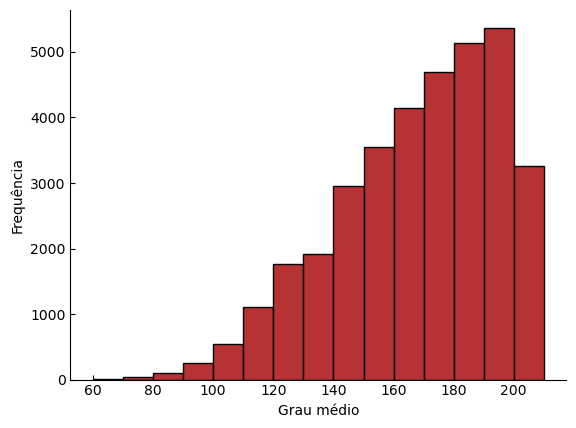

In [51]:
fig, ax = plt.subplots()
sns.histplot(data=YA_BN, x='degree', binwidth=10, color='firebrick', alpha=0.93, ax=ax, binrange=(60,210))

ax.tick_params(labeltop=False, bottom=True, direction="in")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Frequência')
ax.set_xlabel('Grau médio')

plt.savefig('histograma.png')
plt.show()

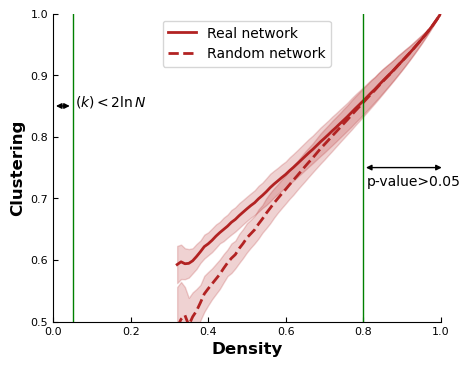

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
sns.lineplot(data = YA_BN, x = 'density', y = 'clustering', lw = 2, color = 'firebrick', ax=ax, ci='sd')

sns.lineplot(data = random_YA_BN, x = 'density', y = 'clustering', lw = 2, linestyle='--', color = 'firebrick', ax=ax, ci='sd')
ax.axvline(x=0.05, color='green', linestyle='-', linewidth=1)
ax.axvline(x=0.8, color='green', linestyle='-', linewidth=1)

ax.text(0.93, 0.72, 'p-value>0.05', fontsize=10, ha = 'center')
ax.annotate('', xy=(0.80, 0.75), xytext=(1.01, 0.75),
                arrowprops=dict(facecolor='black', arrowstyle='<|-|>', lw=1),
                fontsize=8, ha='center')

ax.text(0.15, 0.85, '$(k) < 2\\ln N$', fontsize=10, ha = 'center')
ax.annotate('', xy=(0, 0.85), xytext=(0.05, 0.85),
                arrowprops=dict(facecolor='black', arrowstyle='<|-|>', lw=1),
                fontsize=8, ha='center')

ax.tick_params(labeltop=False, bottom=True, direction="in")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_elements = [
                   Line2D([0], [0], color='firebrick', lw=2, label='Real network'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Random network', linestyle='dashed')
                   ]


ax.legend(handles = legend_elements, title=None, prop = {'size': 10})
plt.xlabel('Density', fontsize = 12, weight='bold')
plt.ylabel('Clustering', fontsize = 12, weight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.xlim(0,1)
plt.ylim(0.5,1)

plt.savefig("Images/Limits.png", bbox_inches = 'tight', dpi = 450)
plt.show()

## Comparação entre gêneros

### Clustering

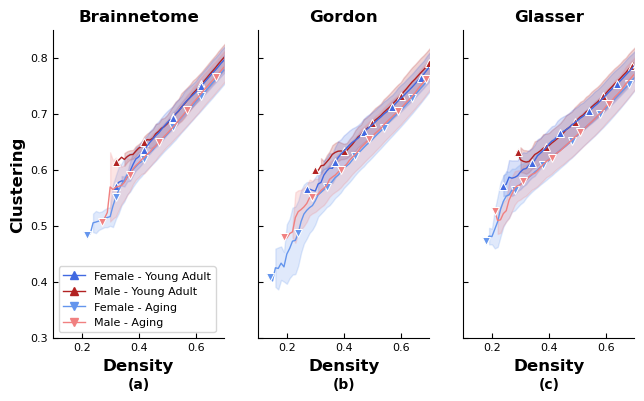

In [ ]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 4), sharex=True, sharey=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'clustering'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
             marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['royalblue', 'firebrick'],
#             linestyle='dashed', marker='o', markersize=5)

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 4
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 5
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 6
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0].set_xlabel('Density', fontsize=12, weight='bold')
axes[0].set_ylabel('Clustering', fontsize=12, weight='bold')
axes[0].set_xlim(0.1, 0.7)
axes[0].legend(title = None, handles = legend_elements, fontsize=8)

axes[1].set_xlabel('Density', fontsize=12, weight='bold')
axes[1].set_ylabel('Clustering', fontsize=12, weight='bold')
axes[1].set_xlim(0.1, 0.7)

axes[2].set_xlabel('Density', fontsize=12, weight='bold')
axes[2].set_ylabel('Clustering', fontsize=12, weight='bold')
axes[2].set_xlim(0.1, 0.7)


plt.ylim(0.3,0.85)

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].text(0.4, 0.21, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 0.21, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 0.21, '(c)', weight='bold', ha='center')

#plt.savefig("Images/Clustering_gender.png", bbox_inches = 'tight', dpi = 450)
plt.show()

#### Diferença

In [19]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'clustering'
Female_BN = []
Male_BN = []
dif_YA_BN = []
dif_Aging_BN = []
Female_gordon = []
Male_gordon = []
dif_YA_gordon = []
dif_Aging_gordon = []
Female_glasser = []
Male_glasser = []
dif_YA_glasser = []
dif_Aging_glasser = []

for i in densidade:
    i = round(i,2)
    #print(i)
    Female_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean())
    Male_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())
    dif_YA_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean())
    dif_Aging_BN.append(Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())

    Female_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean())
    Male_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    dif_YA_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean())
    dif_Aging_gordon.append(Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    
    Female_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean())
    Male_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())
    dif_YA_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean())
    dif_Aging_glasser.append(Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'FemaleBN': Female_BN, 'MaleBN': Male_BN, 'YABN': dif_YA_BN, 'AgingBN': dif_Aging_BN,
                             'FemaleGordon': Female_gordon, 'MaleGordon': Male_gordon, 'YAGordon': dif_YA_gordon, 'AgingGordon': dif_Aging_gordon,
                             'FemaleGlasser': Female_glasser, 'MaleGlasser': Male_glasser, 'YAGlasser': dif_YA_glasser, 'AgingGlasser': dif_Aging_glasser})

In [20]:
df_diferenca.describe()

densidade   FemaleBN     MaleBN       YABN    AgingBN  FemaleGordon  \
count  91.000000  69.000000  69.000000  69.000000  74.000000     74.000000   
mean    0.550000   0.013584   0.018455  -0.007557  -0.003689      0.018664   
std     0.264134   0.006366   0.009397   0.010381   0.007245      0.009520   
min     0.100000  -0.004593   0.000000  -0.042657  -0.052960      0.000000   
25%     0.325000   0.011430   0.016309  -0.006940  -0.004501      0.013339   
50%     0.550000   0.016159   0.017212  -0.004832  -0.002617      0.019477   
75%     0.775000   0.017656   0.018327  -0.002530  -0.000868      0.026327   
max     1.000000   0.020831   0.050265   0.001967   0.004562      0.038387   

       MaleGordon   YAGordon  AgingGordon  FemaleGlasser  MaleGlasser  \
count   71.000000  71.000000    82.000000      77.000000    72.000000   
mean     0.021166  -0.006806    -0.006670       0.018773     0.020997   
std      0.010690   0.007241     0.009119       0.008668     0.010299   
min      0.000000  -0.038309    -0.053586       0.000000     0.000000   
25%      0.016458  -0.008417    -0.005193       0.014248     0.016676   
50%      0.022041  -0.005806    -0.004360       0.021499     0.023212   
75%      0.024537  -0.002554    -0.003101       0.023818     0.026360   
max      0.045878   0.004634     0.000000       0.031503     0.060977   

       YAGlasser  AgingGlasser  
count  72.000000     80.000000  
mean   -0.004650     -0.001238  
std     0.006127      0.006357  
min    -0.043169     -0.032151  
25%    -0.006237     -0.003418  
50%    -0.004149     -0.001319  
75%    -0.002218     -0.000134  
max     0.004733      0.025911

#### Teste estatistico

In [22]:
measure = 'clustering'

In [ ]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [42]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
62     0.72     41063.0  1.856882e-03     -3.100585    2.016642e-03   
63     0.73     43049.0  3.789886e-04     -3.606715    3.336231e-04   
64     0.74     46095.0  9.739854e-05     -3.905516    1.033659e-04   
65     0.75     50401.0  2.506747e-04     -3.505226    4.849171e-04   
66     0.76     54402.0  1.351789e-03     -2.979870    2.979576e-03   
67     0.77     57976.0  7.568413e-04     -3.115193    1.907877e-03   
68     0.78     62704.0  5.422869e-04     -3.193625    1.461119e-03   
69     0.79     65124.0  2.318476e-04     -3.428155    6.387224e-04   
70     0.80     67725.0  2.884276e-05     -4.035299    5.961438e-05   
71     0.81     70771.0  3.357790e-06     -4.537973    6.500531e-06   
72     0.82     74537.0  5.951143e-07     -4.931172    9.783540e-07   
73     0.83     76826.0  1.969744e-07     -5.227929    2.137684e-07   
74     0.84     79888.0  7.961323e-09     -5.958657    3.625570e-09   
75     0.85     84723.0  2.357710e-09     -6.174141    9.868368e-10   
76     0.86     89623.0  8.050098e-09     -5.893685    5.215391e-09   
77     0.87     91770.0  3.534544e-09     -6.004624    2.700437e-09   
78     0.88     94226.0  8.579105e-10     -6.222633    7.195260e-10   
79     0.89     95824.0  3.085435e-12     -7.282056    6.572228e-13   
80     0.90     98051.0  2.717016e-12     -7.301972    5.669486e-13   
81     0.91     99066.0  2.987612e-13     -7.671966    3.884251e-14   
82     0.92    100138.0  2.239777e-13     -7.636711    5.013285e-14   
83     0.93    102081.0  7.857903e-14     -7.692071    3.302298e-14   
84     0.94    103682.0  2.001107e-14     -7.764890    1.905601e-14   
85     0.95    105334.0  3.500181e-14     -7.505378    1.281832e-13   
86     0.96    105660.0  1.962093e-14     -7.412975    2.492025e-13   
87     0.97    106215.0  1.155501e-14     -7.217055    9.982133e-13   
88     0.98    107159.0  4.807039e-14     -6.875193    1.044260e-11   
89     0.99    107100.0  4.401559e-14     -6.486851    1.330907e-10   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
62        46979.0         0.007387        -3.055591           0.002337  
63        47831.0         0.010475        -2.743935           0.006235  
64        49974.0         0.023720        -2.371543           0.017995  
65        51421.0         0.030190        -2.203604           0.027887  
66        52268.0         0.022636        -2.363336           0.018389  
67        52335.0         0.013750        -2.634535           0.008614  
68        53539.0         0.005685        -3.082374           0.002134  
69        53810.0         0.004354        -3.161452           0.001637  
70        53798.0         0.002793        -3.398387           0.000716  
71        54395.0         0.003287        -3.261471           0.001161  
72        54760.0         0.003456        -3.309430           0.000982  
73        55047.0         0.003312        -3.289900           0.001051  
74        55055.0         0.002694        -3.383958           0.000753  
75        55357.0         0.002624        -3.432168           0.000633  
76        55231.0         0.002257        -3.439628           0.000616  
77        55325.0         0.002028        -3.548538           0.000413  
78        55327.0         0.002033        -3.564809           0.000388  
79        55687.0         0.002122        -3.484272           0.000523  
80        55699.0         0.002153        -3.478744           0.000534  
81        55850.0         0.002175        -3.135959           0.001783  
82        56264.0         0.002997        -2.728445           0.006518  
83        55986.0         0.002158        -2.672469           0.007699  
84        55987.0         0.002160        -2.632377           0.008660  
85        56229.0         0.002877        -2.568147           0.010424  
86        55963.0         0.002099        -2.530124           0.011614  
87        56227.0         0.002870        -2.4

In [43]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
62     0.72     41063.0  1.856882e-03     -3.100585    2.016642e-03   
68     0.78     62704.0  5.422869e-04     -3.193625    1.461119e-03   
69     0.79     65124.0  2.318476e-04     -3.428155    6.387224e-04   
70     0.80     67725.0  2.884276e-05     -4.035299    5.961438e-05   
71     0.81     70771.0  3.357790e-06     -4.537973    6.500531e-06   
72     0.82     74537.0  5.951143e-07     -4.931172    9.783540e-07   
73     0.83     76826.0  1.969744e-07     -5.227929    2.137684e-07   
74     0.84     79888.0  7.961323e-09     -5.958657    3.625570e-09   
75     0.85     84723.0  2.357710e-09     -6.174141    9.868368e-10   
76     0.86     89623.0  8.050098e-09     -5.893685    5.215391e-09   
77     0.87     91770.0  3.534544e-09     -6.004624    2.700437e-09   
78     0.88     94226.0  8.579105e-10     -6.222633    7.195260e-10   
79     0.89     95824.0  3.085435e-12     -7.282056    6.572228e-13   
80     0.90     98051.0  2.717016e-12     -7.301972    5.669486e-13   
81     0.91     99066.0  2.987612e-13     -7.671966    3.884251e-14   
82     0.92    100138.0  2.239777e-13     -7.636711    5.013285e-14   
83     0.93    102081.0  7.857903e-14     -7.692071    3.302298e-14   
84     0.94    103682.0  2.001107e-14     -7.764890    1.905601e-14   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
62        46979.0         0.007387        -3.055591           0.002337  
68        53539.0         0.005685        -3.082374           0.002134  
69        53810.0         0.004354        -3.161452           0.001637  
70        53798.0         0.002793        -3.398387           0.000716  
71        54395.0         0.003287        -3.261471           0.001161  
72        54760.0         0.003456        -3.309430           0.000982  
73        55047.0         0.003312        -3.289900           0.001051  
74        55055.0         0.002694        -3.383958           0.000753  
75        55357.0         0.002624        -3.432168           0.000633  
76        55231.0         0.002257        -3.439628           0.000616  
77        55325.0         0.002028        -3.548538           0.000413  
78        55327.0         0.002033        -3.564809           0.000388  
79        55687.0         0.002122        -3.484272           0.000523  
80        55699.0         0.002153        -3.478744           0.000534  
81        55850.0         0.002175        -3.135959           0.001783  
82        56264.0         0.002997        -2.728445           0.006518  
83        55986.0         0.002158        -2.672469           0.007699  
84        55987.0         0.002160        -2.632377           0.008660

In [44]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.1,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [45]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
51     0.61     33845.0  2.731649e-03     -3.195777    1.470090e-03   
52     0.62     36701.0  1.524293e-03     -3.353911    8.464108e-04   
53     0.63     39317.0  5.559016e-05     -4.132770    4.063223e-05   
54     0.64     42005.0  5.285652e-06     -4.663357    3.762282e-06   
55     0.65     44910.0  1.555606e-05     -4.374628    1.406725e-05   
56     0.66     48876.0  1.835568e-05     -4.332528    1.686975e-05   
57     0.67     51604.0  8.892375e-06     -4.468710    9.120646e-06   
58     0.68     54251.0  9.698477e-06     -4.387965    1.309073e-05   
59     0.69     59736.0  4.042570e-05     -3.873127    1.165184e-04   
60     0.70     63856.0  2.241347e-05     -3.916020    9.769185e-05   
61     0.71     65447.0  9.926722e-06     -4.176574    3.279268e-05   
62     0.72     69073.0  6.530010e-06     -4.285428    2.036350e-05   
63     0.73     72777.0  3.827756e-06     -4.349610    1.527894e-05   
64     0.74     75695.0  1.418432e-06     -4.547205    6.200850e-06   
65     0.75     78470.0  1.564449e-07     -5.145791    3.272555e-07   
66     0.76     80553.0  4.048553e-08     -5.474857    5.660067e-08   
67     0.77     82670.0  1.428946e-09     -6.179241    9.606358e-10   
68     0.78     84385.0  6.596018e-10     -6.330565    3.769267e-10   
69     0.79     86982.0  1.224336e-10     -6.598367    6.851520e-11   
70     0.80     89060.0  1.763356e-11     -6.945615    6.861195e-12   
71     0.81     92219.0  6.352187e-11     -6.593464    6.975554e-11   
72     0.82     96277.0  3.111556e-10     -6.218176    7.361664e-10   
73     0.83     97564.0  1.200338e-10     -6.387436    2.564389e-10   
74     0.84     99394.0  2.751435e-11     -6.620076    5.772363e-11   
75     0.85    100865.0  1.324887e-11     -6.631916    5.323704e-11   
76     0.86    103014.0  3.703915e-11     -6.300575    4.364680e-10   
77     0.87    104404.0  1.547778e-11     -6.404155    2.274249e-10   
78     0.88    105273.0  2.019580e-12     -6.749857    2.428895e-11   
79     0.89    106354.0  3.847596e-12     -6.494950    1.271578e-10   
80     0.90    106408.0  1.489271e-12     -6.650810    4.642349e-11   
81     0.91    106521.0  1.542706e-13     -7.159395    1.498512e-12   
82     0.92    106327.0  8.134796e-14     -7.200674    1.122757e-12   
83     0.93    106284.0  7.629602e-14     -7.142086    1.689286e-12   
84     0.94    106490.0  7.283832e-14     -7.177201    1.322138e-12   
85     0.95    106551.0  2.752583e-14     -7.369898    3.385982e-13   
86     0.96    106521.0  1.840931e-14     -7.348346    3.946243e-13   
87     0.97    106996.0  3.767109e-14     -7.127627    1.862593e-12   
88     0.98    107332.0  6.219726e-14     -6.916639    7.897873e-12   
89     0.99    107237.0  5.399914e-14     -6.622866    5.539202e-11   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
51        43541.0         0.124476        -1.708752           0.087998  
52        45137.0         0.143263        -1.549230           0.121829  
53        46053.0         0.174233        -1.408809           0.159382  
54        46661.0         0.130411        -1.581392           0.114282  
55        47685.0         0.128066        -1.625261           0.104594  
56        48904.0         0.048225        -2.147146           0.032145  
57        50180.0         0.043750        -2.297286           0.021910  
58        50274.0         0.023427        -2.650073           0.008236  
59        51909.0         0.031269        -2.334020           0.019884  
60        52534.0         0.036844        -2.167196           0.030563  
61        53136.0         0.035467        -2.187869           0.029014  
62        53549.0         0.022620        -2.448419           0.014595  
63        53905.0         0.019441        -2.529068           0.011656  
64        54434.0         0.017239        -2.575147           0.010223  
65        54404.0         0.011389        -2.811678           0.0050

In [46]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
66     0.76     80553.0  4.048553e-08     -5.474857    5.660067e-08   
67     0.77     82670.0  1.428946e-09     -6.179241    9.606358e-10   
68     0.78     84385.0  6.596018e-10     -6.330565    3.769267e-10   
69     0.79     86982.0  1.224336e-10     -6.598367    6.851520e-11   
70     0.80     89060.0  1.763356e-11     -6.945615    6.861195e-12   
71     0.81     92219.0  6.352187e-11     -6.593464    6.975554e-11   
72     0.82     96277.0  3.111556e-10     -6.218176    7.361664e-10   
73     0.83     97564.0  1.200338e-10     -6.387436    2.564389e-10   
74     0.84     99394.0  2.751435e-11     -6.620076    5.772363e-11   
75     0.85    100865.0  1.324887e-11     -6.631916    5.323704e-11   
76     0.86    103014.0  3.703915e-11     -6.300575    4.364680e-10   
77     0.87    104404.0  1.547778e-11     -6.404155    2.274249e-10   
78     0.88    105273.0  2.019580e-12     -6.749857    2.428895e-11   
79     0.89    106354.0  3.847596e-12     -6.494950    1.271578e-10   
80     0.90    106408.0  1.489271e-12     -6.650810    4.642349e-11   
81     0.91    106521.0  1.542706e-13     -7.159395    1.498512e-12   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
66        54432.0         0.007893        -3.058653           0.002307  
67        54705.0         0.007465        -3.055954           0.002328  
68        54717.0         0.004067        -3.450733           0.000592  
69        55294.0         0.004625        -3.287455           0.001060  
70        55388.0         0.002189        -3.808935           0.000152  
71        55467.0         0.002407        -3.802158           0.000156  
72        55457.0         0.002378        -3.819021           0.000146  
73        55401.0         0.001782        -3.963297           0.000081  
74        55756.0         0.002305        -3.726934           0.000209  
75        55712.0         0.002187        -3.715179           0.000219  
76        55667.0         0.002071        -3.726556           0.000209  
77        55713.0         0.002189        -3.707081           0.000226  
78        55673.0         0.002086        -3.705317           0.000227  
79        56194.0         0.002761        -2.768279           0.005780  
80        55974.0         0.002127        -2.691278           0.007283  
81        55944.0         0.002052        -2.609504           0.009255

In [47]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [48]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
59     0.69     62645.0  2.667791e-03     -2.897479    3.867806e-03   
60     0.70     64949.0  1.370028e-03     -3.093333    2.048803e-03   
61     0.71     68496.0  1.087959e-03     -3.139495    1.753623e-03   
62     0.72     71694.0  3.246637e-04     -3.480317    5.268092e-04   
63     0.73     74601.0  2.250918e-04     -3.543109    4.169593e-04   
64     0.74     78006.0  1.801746e-04     -3.649620    2.782796e-04   
65     0.75     78772.0  4.869617e-05     -4.011651    6.542592e-05   
66     0.76     83088.0  4.022548e-05     -4.046683    5.640176e-05   
67     0.77     85668.0  1.685310e-05     -4.234709    2.518914e-05   
68     0.78     87796.0  8.700228e-07     -4.955424    8.559030e-07   
69     0.79     90524.0  9.935539e-07     -4.850628    1.437105e-06   
70     0.80     92614.0  5.724737e-07     -4.893977    1.157822e-06   
71     0.81     94723.0  4.025839e-08     -5.552073    3.631937e-08   
72     0.82     96257.0  1.811772e-08     -5.696276    1.612622e-08   
73     0.83     98708.0  6.374224e-09     -5.903114    4.869172e-09   
74     0.84     99476.0  3.045238e-09     -6.048301    2.056035e-09   
75     0.85    100429.0  3.465710e-09     -5.983231    3.026466e-09   
76     0.86    100465.0  7.364284e-10     -6.320488    3.886216e-10   
77     0.87    101276.0  5.001849e-11     -6.884053    1.006919e-11   
78     0.88    101665.0  8.755197e-12     -7.216473    1.026064e-12   
79     0.89    101648.0  2.158460e-12     -7.491500    1.445590e-13   
80     0.90    102569.0  1.192664e-12     -7.541821    9.992656e-14   
81     0.91    104499.0  2.299637e-12     -7.262047    7.374301e-13   
82     0.92    105445.0  1.833321e-12     -7.193898    1.186007e-12   
83     0.93    106064.0  4.254563e-13     -7.395205    2.843100e-13   
84     0.94    106110.0  1.594749e-13     -7.514369    1.201657e-13   
85     0.95    106315.0  5.279155e-14     -7.669283    3.851713e-14   
86     0.96    106505.0  2.567943e-14     -7.574964    7.690346e-14   
87     0.97    106517.0  1.829799e-14     -7.524631    1.109390e-13   
88     0.98    105604.0  4.511849e-15     -7.316801    4.938539e-13   
89     0.99    105498.0  3.827223e-15     -6.833941    1.376913e-11   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
59        50590.0         0.020474        -3.122478           0.001870  
60        51026.0         0.016728        -3.209179           0.001394  
61        51504.0         0.014223        -3.272719           0.001119  
62        51842.0         0.014570        -3.220222           0.001341  
63        52700.0         0.010837        -3.343428           0.000872  
64        53613.0         0.012528        -3.182500           0.001525  
65        53921.0         0.014954        -3.073534           0.002198  
66        54506.0         0.014026        -3.051772           0.002361  
67        54522.0         0.011770        -3.168812           0.001597  
68        55138.0         0.013765        -3.039596           0.002456  
69        55198.0         0.014640        -3.019804           0.002620  
70        55484.0         0.009547        -3.341434           0.000877  
71        55793.0         0.009367        -3.359761           0.000822  
72        55774.0         0.009180        -3.361812           0.000816  
73        55819.0         0.009629        -3.368308           0.000797  
74        55826.0         0.006518        -3.619228           0.000316  
75        56088.0         0.007420        -3.355668           0.000834  
76        56434.0         0.009215        -3.189265           0.001488  
77        56684.0         0.006944        -3.209042           0.001391  
78        56710.0         0.005838        -3.322876           0.000936  
79        56693.0         0.005730        -3.303182           0.001003  
80        56545.0         0.004864        -3.256850           0.001179  
81        56626.0         0.005322        -3.150712 

In [49]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
70     0.80     92614.0  5.724737e-07     -4.893977    1.157822e-06   
71     0.81     94723.0  4.025839e-08     -5.552073    3.631937e-08   
72     0.82     96257.0  1.811772e-08     -5.696276    1.612622e-08   
73     0.83     98708.0  6.374224e-09     -5.903114    4.869172e-09   
74     0.84     99476.0  3.045238e-09     -6.048301    2.056035e-09   
75     0.85    100429.0  3.465710e-09     -5.983231    3.026466e-09   
76     0.86    100465.0  7.364284e-10     -6.320488    3.886216e-10   
77     0.87    101276.0  5.001849e-11     -6.884053    1.006919e-11   
78     0.88    101665.0  8.755197e-12     -7.216473    1.026064e-12   
79     0.89    101648.0  2.158460e-12     -7.491500    1.445590e-13   
80     0.90    102569.0  1.192664e-12     -7.541821    9.992656e-14   
81     0.91    104499.0  2.299637e-12     -7.262047    7.374301e-13   
82     0.92    105445.0  1.833321e-12     -7.193898    1.186007e-12   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
70        55484.0         0.009547        -3.341434           0.000877  
71        55793.0         0.009367        -3.359761           0.000822  
72        55774.0         0.009180        -3.361812           0.000816  
73        55819.0         0.009629        -3.368308           0.000797  
74        55826.0         0.006518        -3.619228           0.000316  
75        56088.0         0.007420        -3.355668           0.000834  
76        56434.0         0.009215        -3.189265           0.001488  
77        56684.0         0.006944        -3.209042           0.001391  
78        56710.0         0.005838        -3.322876           0.000936  
79        56693.0         0.005730        -3.303182           0.001003  
80        56545.0         0.004864        -3.256850           0.001179  
81        56626.0         0.005322        -3.150712           0.001696  
82        56982.0         0.006708        -2.589263           0.009812

### Diameter

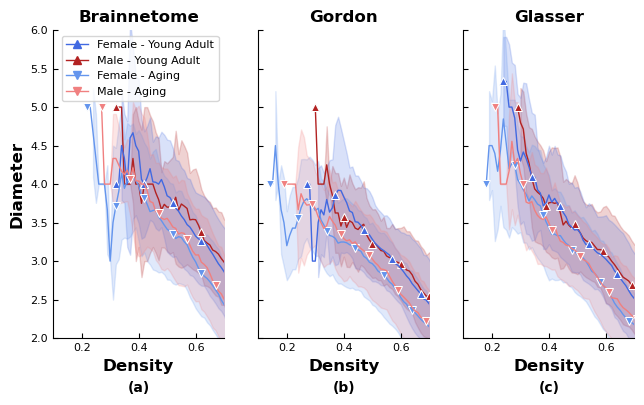

In [18]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 4), sharex=True, sharey=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'diameter'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
             marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['royalblue', 'firebrick'],
#             linestyle='dashed', marker='o', markersize=5)

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 4
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 5
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 6
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0].set_xlabel('Density', fontsize=12, weight='bold')
axes[0].set_ylabel('Diameter', fontsize=12, weight='bold')
axes[0].set_xlim(0.1, 0.7)
axes[0].legend(title = None, handles = legend_elements, fontsize=8)

axes[1].set_xlabel('Density', fontsize=12, weight='bold')
axes[1].set_ylabel('Diameter', fontsize=12, weight='bold')
axes[1].set_xlim(0.1, 0.7)

axes[2].set_xlabel('Density', fontsize=12, weight='bold')
axes[2].set_ylabel('Diameter', fontsize=12, weight='bold')
axes[2].set_xlim(0.1, 0.7)


plt.ylim(2,6)

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].text(0.4, 1.3, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 1.3, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 1.3, '(c)', weight='bold', ha='center')

plt.savefig("Images/Diameter_gender.png", bbox_inches = 'tight', dpi = 450)
plt.show()

#### Diferença

In [10]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'diameter'
Female_BN = []
Male_BN = []
dif_YA_BN = []
dif_Aging_BN = []
Female_gordon = []
Male_gordon = []
dif_YA_gordon = []
dif_Aging_gordon = []
Female_glasser = []
Male_glasser = []
dif_YA_glasser = []
dif_Aging_glasser = []

for i in densidade:
    i = round(i,2)
    #print(i)
    Female_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean())
    Male_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())
    dif_YA_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean())
    dif_Aging_BN.append(Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())

    Female_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean())
    Male_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    dif_YA_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean())
    dif_Aging_gordon.append(Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    
    Female_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean())
    Male_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())
    dif_YA_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean())
    dif_Aging_glasser.append(Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'FemaleBN': Female_BN, 'MaleBN': Male_BN, 'YABN': dif_YA_BN, 'AgingBN': dif_Aging_BN,
                             'FemaleGordon': Female_gordon, 'MaleGordon': Male_gordon, 'YAGordon': dif_YA_gordon, 'AgingGordon': dif_Aging_gordon,
                             'FemaleGlasser': Female_glasser, 'MaleGlasser': Male_glasser, 'YAGlasser': dif_YA_glasser, 'AgingGlasser': dif_Aging_glasser})

In [11]:
df_diferenca.describe()

densidade   FemaleBN     MaleBN       YABN    AgingBN  FemaleGordon  \
count  91.000000  69.000000  69.000000  69.000000  74.000000     74.000000   
mean    0.550000   0.289547   0.256295  -0.049458  -0.119915      0.214527   
std     0.264134   0.163860   0.206026   0.249312   0.194993      0.230051   
min     0.100000  -0.041667  -0.250000  -1.000000  -1.000000     -0.724138   
25%     0.325000   0.176471   0.113628  -0.139948  -0.129002      0.083620   
50%     0.550000   0.330799   0.299424  -0.094225  -0.078847      0.275166   
75%     0.775000   0.417366   0.385533   0.000000  -0.024483      0.340613   
max     1.000000   0.580952   0.833333   0.600000   0.021505      0.686355   

       MaleGordon   YAGordon  AgingGordon  FemaleGlasser  MaleGlasser  \
count   71.000000  71.000000    82.000000      77.000000    72.000000   
mean     0.253672  -0.067986    -0.076734       0.272707     0.290072   
std      0.195686   0.277701     0.151703       0.184994     0.161172   
min      0.000000  -2.000000    -0.800000       0.000000     0.000000   
25%      0.159329  -0.100432    -0.070709       0.127236     0.208344   
50%      0.239730  -0.050267    -0.042145       0.290102     0.300320   
75%      0.335681   0.004502    -0.012840       0.390483     0.391506   
max      1.318182   0.462121     0.109351       0.803922     0.714286   

       YAGlasser  AgingGlasser  
count  72.000000     80.000000  
mean   -0.067158     -0.017533  
std     0.109570      0.182631  
min    -0.555556     -0.833333  
25%    -0.119807     -0.062752  
50%    -0.062908     -0.013199  
75%    -0.008506      0.003968  
max     0.162247      0.846154

#### Teste estatistico

In [12]:
measure = 'diameter'

In [13]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [14]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
50     0.60      9595.5  5.412471e-03     -2.996780    2.941858e-03   
51     0.61     11629.0  6.576042e-03     -2.614112    9.335782e-03   
61     0.71     38731.5  2.886932e-03     -3.016779    2.660815e-03   
62     0.72     41020.0  2.817477e-04     -3.963877    8.209116e-05   
63     0.73     46064.0  9.287890e-03     -2.960464    3.182474e-03   
70     0.80     73199.0  2.522464e-03     -3.120590    1.867873e-03   
71     0.81     76283.0  1.952346e-04     -3.893334    1.066509e-04   
72     0.82     80683.0  3.788369e-05     -4.268248    2.185793e-05   
73     0.83     82880.5  5.187306e-06     -4.702481    2.978251e-06   
74     0.84     87295.5  5.586600e-07     -5.267574    1.724157e-07   
75     0.85     96064.5  1.690301e-05     -4.344398    1.547806e-05   
76     0.86    103045.5  2.435792e-04     -3.518949    4.534782e-04   
77     0.87    105337.0  4.564526e-05     -4.053148    5.454407e-05   
78     0.88    111178.5  3.462014e-04     -4.031020    5.977886e-05   
79     0.89    113456.0  6.756886e-07     -5.226866    2.091380e-07   
80     0.90    118650.0  5.110680e-06     -4.730512    2.551751e-06   
81     0.91    121878.0  1.933207e-06     -4.888095    1.178623e-06   
82     0.92    126523.5  1.918123e-05     -4.263486    2.194507e-05   
83     0.93    130660.5  2.555322e-05     -4.318698    1.717019e-05   
84     0.94    136828.0  2.682839e-03     -3.013511    2.643282e-03   
85     0.95    139721.5  2.629885e-03     -3.019673    2.590211e-03   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
50        28177.0         0.091806        -1.628001           0.104153  
51        28016.0         0.001189        -3.278652           0.001113  
61        46991.5         0.050884        -1.850823           0.064654  
62        48462.5         0.011873        -2.992333           0.002872  
63        49315.5         0.013142        -2.616545           0.009085  
70        57195.0         0.001753        -3.378692           0.000768  
71        58309.0         0.004036        -2.875496           0.004155  
72        58774.0         0.002270        -3.004018           0.002758  
73        60620.0         0.036102        -2.109580           0.035242  
74        61102.0         0.033592        -2.012016           0.044593  
75        61837.0         0.043630        -1.760306           0.078782  
76        62210.0         0.050403        -1.624823           0.104640  
77        62653.0         0.074592        -1.786413           0.074454  
78        63142.0         0.169173        -1.376660           0.169047  
79        63501.0         0.169508        -1.375572           0.169382  
80        63544.0         0.143063        -1.466709           0.142892  
81        63946.5         0.210952        -1.252843           0.210669  
82        64669.5         0.711326         0.623083           0.533427  
83        64510.0         0.863966        -0.173181           0.862558  
84        64554.0         1.000000              NaN                NaN  
85        64554.0         1.000000              NaN                NaN

In [15]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
51     0.61     11629.0      0.006576     -2.614112        0.009336   
53     0.63     18616.0      0.769230     -0.198611        0.842666   
54     0.64     21262.0      0.592615     -0.487030        0.626481   
68     0.78     66186.5      0.007480     -2.555385        0.010795   
69     0.79     68801.5      0.003109     -2.555862        0.010776   
70     0.80     73199.0      0.002522     -3.120590        0.001868   
71     0.81     76283.0      0.000195     -3.893334        0.000107   
72     0.82     80683.0      0.000038     -4.268248        0.000022   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
51        28016.0         0.001189        -3.278652           0.001113  
53        32742.5         0.003512        -3.107902           0.001981  
54        35779.0         0.009255        -2.791075           0.005429  
68        56423.0         0.006511        -2.714675           0.006797  
69        56715.0         0.002483        -3.117563           0.001898  
70        57195.0         0.001753        -3.378692           0.000768  
71        58309.0         0.004036        -2.875496           0.004155  
72        58774.0         0.002270        -3.004018           0.002758

In [16]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.1,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [17]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
54     0.64     47024.5      0.003057     -2.643507        0.008399   
60     0.70     69165.5      0.002979     -2.615804        0.009069   
62     0.72     75911.5      0.002933     -2.917343        0.003625   
63     0.73     80272.0      0.002427     -2.986994        0.002898   
64     0.74     85081.0      0.005455     -2.998118        0.002793   
66     0.76     92184.5      0.001134     -3.789207        0.000161   
67     0.77     97334.0      0.001294     -3.703697        0.000225   
68     0.78    100826.0      0.002532     -3.276360        0.001090   
69     0.79    103725.0      0.000389     -3.820901        0.000141   
70     0.80    106239.0      0.000046     -4.046621        0.000056   
71     0.81    110910.5      0.000388     -3.388707        0.000730   
72     0.82    114906.5      0.000439     -3.515369        0.000459   
73     0.83    116321.5      0.000071     -3.991809        0.000070   
74     0.84    119390.5      0.000031     -4.115798        0.000042   
75     0.85    123605.5      0.000223     -3.634910        0.000292   
76     0.86    128354.0      0.006317     -2.634277        0.008556   
78     0.88    133623.5      0.001068     -3.346307        0.000848   
79     0.89    136057.5      0.006214     -2.744912        0.006154   
80     0.90    137517.5      0.006744     -2.717581        0.006682   
81     0.91    138335.5      0.000385     -3.646980        0.000278   
82     0.92    140444.0      0.000656     -3.424793        0.000638   
83     0.93    142347.5      0.003764     -2.908000        0.003712   
84     0.94    142934.5      0.007400     -2.686753        0.007326   
85     0.95    143815.0      0.007582     -2.678522        0.007507   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
54        48574.0         0.411363        -0.807035           0.419946  
60        54687.0         0.049467        -1.743648           0.081668  
62        56742.0         0.068994        -1.305065           0.192303  
63        56313.0         0.012034        -2.346055           0.019252  
64        57631.0         0.027457        -1.826427           0.068211  
66        57779.0         0.003333        -2.607892           0.009303  
67        58953.5         0.015879        -2.244312           0.025120  
68        59599.5         0.010108        -2.463207           0.014006  
69        61334.0         0.099315        -1.763918           0.078173  
70        61937.0         0.046643        -2.192389           0.028672  
71        62433.0         0.100722        -1.764369           0.078095  
72        62046.0         0.014636        -2.514551           0.012136  
73        62496.5         0.021355        -2.309296           0.021210  
74        63256.0         0.111851        -1.592435           0.111726  
75        63385.0         0.051874        -1.949091           0.051673  
76        63385.0         0.051874        -1.949091           0.051673  
78        64236.0         1.000000              NaN                NaN  
79        64872.0         0.211118         1.252960           0.210626  
80        64872.0         0.211118         1.252960           0.210626  
81        64872.0         0.211118         1.252960           0.210626  
82        64554.0         1.000000              NaN                NaN  
83        64554.0         1.000000              NaN                NaN  
84        64554.0         1.000000              NaN                NaN  
85        64554.0         1.000000              NaN                NaN

In [18]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
66     0.76     92184.5      0.001134     -3.789207        0.000161   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
66        57779.0         0.003333        -2.607892           0.009303

In [19]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [21]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
58     0.68     61103.5  2.940374e-03     -2.770454    5.734304e-03   
59     0.69     62942.0  1.062951e-03     -3.060204    2.288135e-03   
60     0.70     66344.5  1.826872e-03     -2.897573    3.864497e-03   
61     0.71     69083.0  4.587864e-04     -3.390906    7.302729e-04   
62     0.72     71436.0  2.667219e-05     -4.207280    2.864789e-05   
63     0.73     76115.5  1.622081e-04     -3.828283    1.384986e-04   
64     0.74     81475.0  1.063581e-03     -3.384728    7.443625e-04   
65     0.75     83033.0  4.667418e-04     -3.640433    2.880772e-04   
66     0.76     87532.5  3.144687e-04     -3.677114    2.498332e-04   
67     0.77     90819.0  1.812385e-04     -3.911035    9.867400e-05   
68     0.78     93475.0  6.071879e-06     -4.553560    5.968148e-06   
69     0.79     97840.0  3.582816e-05     -4.278717    2.069646e-05   
70     0.80    101377.5  5.264733e-05     -4.200441    2.910908e-05   
71     0.81    107487.0  2.526543e-04     -4.004464    6.684010e-05   
72     0.82    109668.0  1.205872e-04     -4.255610    2.282151e-05   
73     0.83    112705.0  3.034883e-05     -4.167488    3.344054e-05   
74     0.84    112329.5  7.758466e-07     -4.852844    1.408278e-06   
75     0.85    115522.0  5.621982e-06     -4.440812    9.941388e-06   
76     0.86    117278.5  3.208610e-06     -4.788666    1.926454e-06   
77     0.87    122000.5  1.335562e-05     -4.485138    8.101086e-06   
78     0.88    123005.0  2.803703e-07     -5.130964    3.436780e-07   
79     0.89    127337.5  2.371131e-05     -4.417517    1.102285e-05   
80     0.90    129236.5  1.049060e-05     -4.534395    6.440103e-06   
81     0.91    134184.5  2.959239e-03     -2.831533    4.720268e-03   
83     0.93    137846.0  1.348716e-03     -3.265297    1.128132e-03   
84     0.94    139421.5  2.560150e-03     -3.072167    2.178619e-03   
86     0.96    143228.0  2.026547e-03     -3.099222    1.990431e-03   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
58        50250.0         0.006149        -2.941140           0.003383  
59        51950.5         0.013995        -2.530087           0.011629  
60        52937.5         0.017165        -2.668749           0.007795  
61        54016.0         0.026658        -2.580211           0.010081  
62        54942.5         0.050316        -2.017194           0.044064  
63        55256.0         0.011539        -2.448735           0.014583  
64        56371.5         0.014555        -2.256863           0.024325  
65        57036.0         0.019898        -2.385786           0.017308  
66        58163.0         0.032671        -1.908950           0.056675  
67        58506.5         0.034555        -1.913625           0.056073  
68        59128.0         0.034489        -1.897724           0.058140  
69        59548.5         0.048716        -1.790570           0.073790  
70        59644.0         0.009659        -2.472190           0.013662  
71        60593.0         0.033445        -2.132437           0.033312  
72        61932.5         0.287083        -1.065185           0.287153  
73        61909.5         0.210674        -1.252838           0.210675  
74        61848.0         0.049277        -1.970818           0.049130  
75        63164.5         0.641530        -0.466063           0.641312  
76        63205.5         0.470436        -0.722381           0.470296  
77        63571.0         0.313291        -0.676908           0.498681  
78        63862.0         0.291732        -0.635185           0.525509  
79        64064.0         0.484508        -0.307607           0.758470  
80        64105.5         0.470120        -0.723295           0.469733  
81        64713.0         0.210555         1.254511           0.210063  
83        64713.0         0.377651         0.884882           0.376515  
84        64713.0         0.377651         0.884882           0.376515  
86        64554.0         1.000000          

In [22]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
58     0.68     61103.5       0.00294     -2.770454        0.005734   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
58        50250.0         0.006149         -2.94114           0.003383

### Average distance

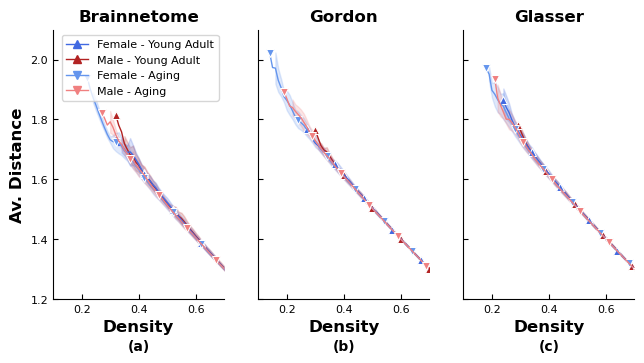

In [17]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3.5), sharex=True, sharey=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'av. distance'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
             marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['royalblue', 'firebrick'],
#             linestyle='dashed', marker='o', markersize=5)

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
#sns.lineplot(data = df_random[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 4
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 5
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 6
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')
#sns.lineplot(data = df_random[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0].set_xlabel('Density', fontsize=12, weight='bold')
axes[0].set_ylabel('Av. Distance', fontsize=12, weight='bold')
axes[0].set_xlim(0.1, 0.7)
axes[0].legend(title = None, handles = legend_elements, fontsize=8)

axes[1].set_xlabel('Density', fontsize=12, weight='bold')
axes[1].set_ylabel('Av. Distance', fontsize=12, weight='bold')
axes[1].set_xlim(0.1, 0.7)

axes[2].set_xlabel('Density', fontsize=12, weight='bold')
axes[2].set_ylabel('Av. Distance', fontsize=12, weight='bold')
axes[2].set_xlim(0.1, 0.7)


plt.ylim(1.2,2.1)

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].text(0.4, 1.03, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 1.03, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 1.03, '(c)', weight='bold', ha='center')

plt.savefig("Images/Distance_gender.png", bbox_inches = 'tight', dpi = 450)
plt.show()

#### Diferença

In [23]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'av. distance'
Female_BN = []
Male_BN = []
dif_YA_BN = []
dif_Aging_BN = []
Female_gordon = []
Male_gordon = []
dif_YA_gordon = []
dif_Aging_gordon = []
Female_glasser = []
Male_glasser = []
dif_YA_glasser = []
dif_Aging_glasser = []

for i in densidade:
    i = round(i,2)
    #print(i)
    Female_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean())
    Male_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())
    dif_YA_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean())
    dif_Aging_BN.append(Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())

    Female_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean())
    Male_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    dif_YA_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean())
    dif_Aging_gordon.append(Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    
    Female_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean())
    Male_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())
    dif_YA_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean())
    dif_Aging_glasser.append(Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'FemaleBN': Female_BN, 'MaleBN': Male_BN, 'YABN': dif_YA_BN, 'AgingBN': dif_Aging_BN,
                             'FemaleGordon': Female_gordon, 'MaleGordon': Male_gordon, 'YAGordon': dif_YA_gordon, 'AgingGordon': dif_Aging_gordon,
                             'FemaleGlasser': Female_glasser, 'MaleGlasser': Male_glasser, 'YAGlasser': dif_YA_glasser, 'AgingGlasser': dif_Aging_glasser})

In [24]:
df_diferenca.describe()

densidade   FemaleBN     MaleBN       YABN    AgingBN  FemaleGordon  \
count  91.000000  69.000000  69.000000  69.000000  74.000000     74.000000   
mean    0.550000   0.004640   0.006430  -0.003197  -0.003959      0.001518   
std     0.264134   0.005919   0.011329   0.013619   0.010613      0.002735   
min     0.100000  -0.009038   0.000000  -0.076873  -0.059730     -0.005890   
25%     0.325000   0.000279   0.000540  -0.001274  -0.001821      0.000021   
50%     0.550000   0.001991   0.002926  -0.000335  -0.000513      0.000470   
75%     0.775000   0.007325   0.008100   0.000000  -0.000027      0.002506   
max     1.000000   0.021321   0.066476   0.009263   0.004037      0.009284   

         MaleGordon      YAGordon   AgingGordon  FemaleGlasser   MaleGlasser  \
count  7.100000e+01  7.100000e+01  8.200000e+01      77.000000  7.200000e+01   
mean   2.439385e-03 -1.337628e-03 -1.828685e-03       0.003237  2.835456e-03   
std    5.188967e-03  6.304879e-03  4.281265e-03       0.004545  4.512689e-03   
min   -5.688799e-08 -4.321792e-02 -1.909655e-02      -0.000006 -9.732758e-08   
25%    1.232247e-04 -2.206203e-04 -1.125792e-03       0.000115  2.650007e-04   
50%    6.554054e-04 -5.723156e-05 -8.631151e-05       0.001104  1.267393e-03   
75%    2.536095e-03 -7.558870e-08 -1.680718e-07       0.005402  3.876663e-03   
max    3.469570e-02  4.054778e-03  3.949733e-03       0.020228  2.400889e-02   

       YAGlasser  AgingGlasser  
count  72.000000     80.000000  
mean   -0.000586     -0.000339  
std     0.003201      0.006871  
min    -0.018778     -0.051786  
25%    -0.000352     -0.000188  
50%    -0.000149     -0.000008  
75%    -0.000023      0.000056  
max     0.003498      0.022137

#### Teste estatistico

In [25]:
measure = 'av. distance'

In [26]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [27]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
60     0.70     34290.5  3.155613e-03     -2.947711        0.003329   
62     0.72     41480.5  3.037697e-03     -3.509087        0.000481   
63     0.73     45097.5  6.009658e-03     -3.686009        0.000247   
64     0.74     48624.5  2.786974e-03     -3.708504        0.000225   
65     0.75     52139.0  1.586697e-03     -3.177101        0.001552   
70     0.80     72270.5  1.138357e-03     -3.026928        0.002548   
71     0.81     74951.0  4.801112e-05     -3.390959        0.000729   
72     0.82     79822.5  1.578339e-05     -3.161649        0.001623   
73     0.83     82533.5  4.417744e-06     -3.017365        0.002623   
74     0.84     86951.5  5.086564e-07     -3.369688        0.000784   
78     0.88    112031.0  1.237682e-03     -2.856271        0.004376   
79     0.89    113501.0  1.103739e-06     -3.146770        0.001699   
80     0.90    118394.5  4.968057e-06     -2.733176        0.006380   
81     0.91    121342.5  7.968518e-07     -2.672712        0.007642   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
60        45860.5         0.037425        -1.640027           0.101492  
62        48374.5         0.012490        -3.377841           0.000774  
63        49281.5         0.014310        -1.569718           0.116959  
64        51174.0         0.021302        -0.749050           0.454089  
65        53306.0         0.056859        -1.148096           0.251333  
70        57366.5         0.002907        -3.026003           0.002568  
71        58201.5         0.003605        -1.282210           0.200188  
72        58534.0         0.001571        -1.404337           0.160655  
73        61108.5         0.110793        -1.033760           0.301598  
74        60412.0         0.010393        -0.828188           0.407840  
78        63292.0         0.299225        -1.782565           0.075080  
79        63967.0         0.662973        -1.448167           0.148006  
80        63767.0         0.464699        -1.164642           0.244550  
81        64220.5         0.730462        -1.063722           0.287811

In [28]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
69     0.79     68321.0      0.002493     -1.100531        0.271431   
70     0.80     72270.5      0.001138     -3.026928        0.002548   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
69        56664.0         0.002856        -2.617997           0.009035  
70        57366.5         0.002907        -3.026003           0.002568

In [29]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.1,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [30]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
66     0.76     92828.0      0.003088     -3.888714    1.080810e-04   
67     0.77     96773.5      0.001039     -5.271771    1.678879e-07   
68     0.78     99846.0      0.001107     -4.508425    7.350569e-06   
69     0.79    102610.0      0.000147     -4.512190    7.208180e-06   
70     0.80    105105.5      0.000022     -3.621047    3.084605e-04   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
66        58046.5         0.013123        -0.039495           0.968507  
67        58686.5         0.016655         0.345745           0.729637  
68        60690.5         0.146051        -0.900371           0.368228  
69        60986.5         0.094654        -1.041737           0.297886  
70        62018.0         0.128225        -2.168926           0.030416

In [31]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

Empty DataFrame
Columns: [density, statMWU_YA, pvalueMWU_YA, statTtest_YA, pvalueTtest_YA, statMWU_aging, pvalueMWU_aging, statTtest_aging, pvalueTtest_aging]
Index: []

In [32]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [33]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
70     0.80    102287.0  2.666997e-04     -2.788281        0.005403   
71     0.81    106872.0  1.687240e-04     -4.136420        0.000038   
72     0.82    109250.5  1.179821e-04     -4.273960        0.000021   
73     0.83    111929.0  1.650915e-05     -3.204149        0.001397   
74     0.84    111803.0  4.816388e-07     -2.909691        0.003697   
79     0.89    127236.5  1.165787e-04     -3.509378        0.000468   
80     0.90    128930.5  1.871588e-05     -3.212245        0.001357   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
70        59755.5         0.026523        -0.549092           0.583115  
71        61703.0         0.326814        -1.507280           0.132182  
72        61932.5         0.380101        -1.736746           0.082864  
73        61075.5         0.069032        -1.129609           0.259021  
74        61708.0         0.061061        -1.954665           0.051012  
79        64161.5         0.762908         0.797879           0.425203  
80        63529.5         0.208799         0.454983           0.649259

In [34]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
58     0.68     60475.5      0.003122     -0.865244        0.387178   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
58        50135.0          0.00691        -2.998876            0.00281

### Geodesic entropy

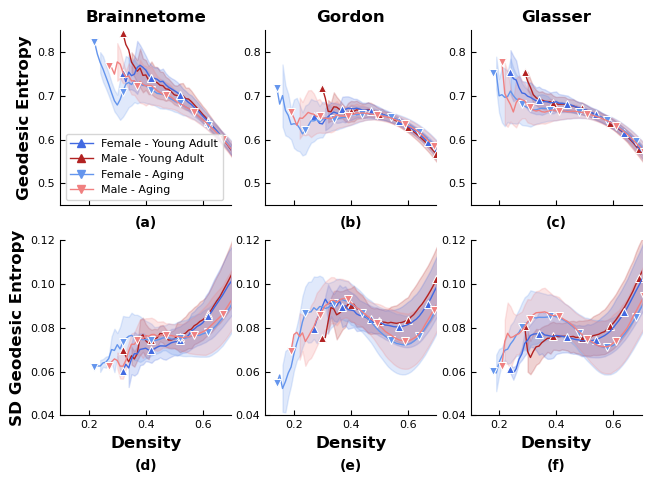

In [16]:
# Criação da figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(7.5, 5), sharex=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]


medida = 'entropy geo'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,0], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0,2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')

medida2 = 'std geo'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,0], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[3], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[4], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', markevery=10, ci='sd')
sns.lineplot(data = df[5], x = 'density', y = medida2, hue = 'Gender', lw = 1, ax = axes[1,2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', markevery=10, ci='sd')


legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0,0].legend(title = None, handles = legend_elements, fontsize=8)


for axis in axes:
    for ax in axis:
        ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Geodesic Entropy'
nome_eixoY2 = 'SD Geodesic Entropy'

axes[0,0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[0,1].set_title("Gordon", fontsize=12, weight='bold')
axes[0,2].set_title("Glasser", fontsize=12, weight='bold')

axes[0,0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[0,1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,1].set_ylabel('', fontsize = 12, weight='bold')

axes[0,2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,2].set_ylabel('', fontsize = 12, weight='bold')

axes[1,0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,0].set_ylabel(nome_eixoY2, fontsize = 12, weight='bold')

axes[1,1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,1].set_ylabel('', fontsize = 12, weight='bold')

axes[1,2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,2].set_ylabel('', fontsize = 12, weight='bold')

axes[0,0].set_ylim(0.45, 0.85)
axes[0,1].set_ylim(0.45, 0.85)
axes[0,2].set_ylim(0.45, 0.85)

axes[1,0].set_ylim(0.04, 0.12)
axes[1,1].set_ylim(0.04, 0.12)
axes[1,2].set_ylim(0.04, 0.12)

axes[0,0].text(0.4, 0.4, '(a)', weight='bold', ha='center')
axes[0,1].text(0.4, 0.4, '(b)', weight='bold', ha='center')
axes[0,2].text(0.4, 0.4, '(c)', weight='bold', ha='center')
axes[1,0].text(0.4, 0.015, '(d)', weight='bold', ha='center')
axes[1,1].text(0.4, 0.015, '(e)', weight='bold', ha='center')
axes[1,2].text(0.4, 0.015, '(f)', weight='bold', ha='center')

plt.xlim(0.1, 0.7)
#plt.ylim(0.5, 0.85)

plt.savefig("Images/Geo_entropy_gender.png", bbox_inches = 'tight', dpi = 450)
plt.show()

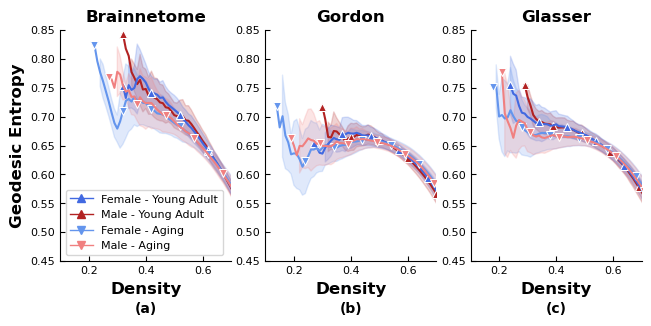

In [ ]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3), sharex=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]


medida = 'entropy geo'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[0], palette = ['firebrick', 'royalblue'],
             legend=False, ci='sd', marker='^', markevery=10)
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', ci='sd', markevery=10)

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[1], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', ci='sd', markevery=10)
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', ci='sd', markevery=10)

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[2], palette = ['firebrick', 'royalblue'],
             legend=False, marker='^', ci='sd', markevery=10)
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1.5, ax = axes[2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, marker='v', ci='sd', markevery=10)


legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0].legend(title = None, handles = legend_elements, fontsize=8)


for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Geodesic Entropy'
nome_eixoY2 = 'SD Geodesic Entropy'

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel('', fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel('', fontsize = 12, weight='bold')

axes[0].set_ylim(0.45, 0.85)
axes[1].set_ylim(0.45, 0.85)
axes[2].set_ylim(0.45, 0.85)


axes[0].text(0.4, 0.36, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 0.36, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 0.36, '(c)', weight='bold', ha='center')


plt.xlim(0.1, 0.7)
#plt.ylim(0.5, 0.85)

plt.savefig("Images/Geo_entropy_gender_test.png", bbox_inches = 'tight', dpi = 450)
plt.show()

#### Diferença

In [50]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'entropy geo'
Female_BN = []
Male_BN = []
dif_YA_BN = []
dif_Aging_BN = []
Female_gordon = []
Male_gordon = []
dif_YA_gordon = []
dif_Aging_gordon = []
Female_glasser = []
Male_glasser = []
dif_YA_glasser = []
dif_Aging_glasser = []

for i in densidade:
    i = round(i,2)
    #print(i)
    Female_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean())
    Male_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())
    dif_YA_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean())
    dif_Aging_BN.append(Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())

    Female_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean())
    Male_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    dif_YA_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean())
    dif_Aging_gordon.append(Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    
    Female_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean())
    Male_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())
    dif_YA_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean())
    dif_Aging_glasser.append(Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'FemaleBN': Female_BN, 'MaleBN': Male_BN, 'YABN': dif_YA_BN, 'AgingBN': dif_Aging_BN,
                             'FemaleGordon': Female_gordon, 'MaleGordon': Male_gordon, 'YAGordon': dif_YA_gordon, 'AgingGordon': dif_Aging_gordon,
                             'FemaleGlasser': Female_glasser, 'MaleGlasser': Male_glasser, 'YAGlasser': dif_YA_glasser, 'AgingGlasser': dif_Aging_glasser})

In [52]:
df_diferenca.describe()

densidade   FemaleBN     MaleBN       YABN    AgingBN  FemaleGordon  \
count  91.000000  69.000000  69.000000  69.000000  74.000000     74.000000   
mean    0.550000   0.006034   0.005980  -0.000251  -0.004885     -0.002099   
std     0.264134   0.017120   0.021550   0.017909   0.019081      0.009345   
min     0.100000  -0.014422  -0.019031  -0.089593  -0.098499     -0.013039   
25%     0.325000  -0.009145  -0.010726   0.000000  -0.002263     -0.010014   
50%     0.550000   0.001506   0.002510   0.003922   0.000898     -0.004210   
75%     0.775000   0.020215   0.017786   0.007789   0.003425      0.003281   
max     1.000000   0.043700   0.089250   0.018492   0.005325      0.019956   

       MaleGordon   YAGordon  AgingGordon  FemaleGlasser  MaleGlasser  \
count   71.000000  71.000000    82.000000      77.000000    72.000000   
mean    -0.002542   0.001559    -0.001453       0.003127     0.001729   
std      0.014594   0.012718     0.008628       0.014711     0.017440   
min     -0.016734  -0.081389    -0.035558      -0.012669    -0.016008   
25%     -0.013103   0.001436    -0.001190      -0.009077    -0.011552   
50%     -0.006017   0.004507     0.001768      -0.001860    -0.003527   
75%      0.004950   0.006650     0.002977       0.015346     0.010298   
max      0.067936   0.011588     0.004657       0.043540     0.066323   

       YAGlasser  AgingGlasser  
count  72.000000     80.000000  
mean    0.001147      0.001647  
std     0.008752      0.010514  
min    -0.049828     -0.074024  
25%     0.000769      0.000701  
50%     0.002109      0.001790  
75%     0.005324      0.003976  
max     0.007581      0.037268

#### Teste estatistico

In [35]:
measure = 'entropy geo'

In [36]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [37]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
63     0.73     58529.0  3.193127e-03      2.874379    4.179125e-03   
64     0.74     64312.0  9.493876e-04      3.295254    1.034145e-03   
65     0.75     69005.0  9.690544e-04      3.298316    1.021234e-03   
66     0.76     72121.0  1.521407e-03      3.158554    1.650966e-03   
67     0.77     77878.0  5.930510e-04      3.427620    6.419335e-04   
68     0.78     84897.0  2.231515e-04      3.701314    2.294921e-04   
69     0.79     89784.0  6.389922e-05      3.894620    1.065541e-04   
70     0.80     95603.0  3.675673e-05      3.999741    6.911882e-05   
71     0.81    102896.0  6.872621e-06      4.389158    1.281633e-05   
72     0.82    110970.0  9.679404e-07      4.855062    1.425664e-06   
73     0.83    115960.0  2.932547e-07      5.144900    3.294403e-07   
74     0.84    125717.0  7.114909e-09      5.963763    3.518125e-09   
75     0.85    134470.0  2.070397e-09      6.217058    7.595015e-10   
76     0.86    139755.0  3.602546e-09      6.093686    1.592605e-09   
77     0.87    143788.0  2.607854e-09      6.077347    1.748699e-09   
78     0.88    149382.0  9.072103e-10      6.237449    6.569332e-10   
79     0.89    160952.0  3.457910e-12      7.279284    6.701893e-13   
80     0.90    164255.0  3.901450e-12      7.277407    6.742706e-13   
81     0.91    169170.0  5.473201e-13      7.595932    6.791610e-14   
82     0.92    171031.0  5.556085e-13      7.523842    1.143584e-13   
83     0.93    175634.0  1.910027e-13      7.667038    3.973690e-14   
84     0.94    180380.0  3.942327e-14      7.895746    7.120850e-15   
85     0.95    181882.0  7.545028e-14      7.688445    3.349785e-14   
86     0.96    183342.0  4.071142e-14      7.813907    1.310944e-14   
87     0.97    185050.0  2.373783e-14      7.843878    1.043014e-14   
88     0.98    184080.0  1.009126e-13      7.699497    3.070660e-14   
89     0.99    183870.0  1.374062e-13      7.602424    6.284651e-14   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
63        60740.0         0.006695         2.675080           0.007656  
64        62198.0         0.008686         2.531007           0.011601  
65        63022.0         0.016907         2.355960           0.018758  
66        64417.0         0.015625         2.387014           0.017255  
67        65340.0         0.011464         2.470904           0.013718  
68        68620.0         0.004104         2.985233           0.002932  
69        69373.0         0.003434         3.118093           0.001894  
70        70187.0         0.002169         3.335501           0.000896  
71        70669.0         0.002394         3.369547           0.000794  
72        70938.0         0.002775         3.349027           0.000854  
73        71397.0         0.002562         3.355399           0.000834  
74        71877.0         0.001869         3.463541           0.000565  
75        72221.0         0.001989         3.526280           0.000448  
76        72354.0         0.001690         3.535813           0.000433  
77        72611.0         0.001617         3.636003           0.000297  
78        72703.0         0.001442         3.643141           0.000289  
79        73031.0         0.001572         3.565539           0.000387  
80        72923.0         0.001795         3.538362           0.000428  
81        72993.0         0.002041         3.288444           0.001056  
82        72823.0         0.003071         3.012352           0.002683  
83        73067.0         0.002304         2.949755           0.003283  
84        73040.0         0.002380         2.944669           0.003337  
85        72798.0         0.003161         2.913762           0.003681  
86        73186.0         0.001998         2.956503           0.003213  
87        72768.0         0.003273         2.928308           0.003515  
88        73077.0         0.002277         3.030734           0.002527  
89        73644.0         0.001136         3

In [38]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
63     0.73     58529.0  3.193127e-03      2.874379    4.179125e-03   
68     0.78     84897.0  2.231515e-04      3.701314    2.294921e-04   
69     0.79     89784.0  6.389922e-05      3.894620    1.065541e-04   
70     0.80     95603.0  3.675673e-05      3.999741    6.911882e-05   
71     0.81    102896.0  6.872621e-06      4.389158    1.281633e-05   
72     0.82    110970.0  9.679404e-07      4.855062    1.425664e-06   
73     0.83    115960.0  2.932547e-07      5.144900    3.294403e-07   
74     0.84    125717.0  7.114909e-09      5.963763    3.518125e-09   
75     0.85    134470.0  2.070397e-09      6.217058    7.595015e-10   
76     0.86    139755.0  3.602546e-09      6.093686    1.592605e-09   
77     0.87    143788.0  2.607854e-09      6.077347    1.748699e-09   
78     0.88    149382.0  9.072103e-10      6.237449    6.569332e-10   
79     0.89    160952.0  3.457910e-12      7.279284    6.701893e-13   
80     0.90    164255.0  3.901450e-12      7.277407    6.742706e-13   
81     0.91    169170.0  5.473201e-13      7.595932    6.791610e-14   
82     0.92    171031.0  5.556085e-13      7.523842    1.143584e-13   
83     0.93    175634.0  1.910027e-13      7.667038    3.973690e-14   
84     0.94    180380.0  3.942327e-14      7.895746    7.120850e-15   
85     0.95    181882.0  7.545028e-14      7.688445    3.349785e-14   
86     0.96    183342.0  4.071142e-14      7.813907    1.310944e-14   
87     0.97    185050.0  2.373783e-14      7.843878    1.043014e-14   
88     0.98    184080.0  1.009126e-13      7.699497    3.070660e-14   
89     0.99    183870.0  1.374062e-13      7.602424    6.284651e-14   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
63        60740.0         0.006695         2.675080           0.007656  
68        68620.0         0.004104         2.985233           0.002932  
69        69373.0         0.003434         3.118093           0.001894  
70        70187.0         0.002169         3.335501           0.000896  
71        70669.0         0.002394         3.369547           0.000794  
72        70938.0         0.002775         3.349027           0.000854  
73        71397.0         0.002562         3.355399           0.000834  
74        71877.0         0.001869         3.463541           0.000565  
75        72221.0         0.001989         3.526280           0.000448  
76        72354.0         0.001690         3.535813           0.000433  
77        72611.0         0.001617         3.636003           0.000297  
78        72703.0         0.001442         3.643141           0.000289  
79        73031.0         0.001572         3.565539           0.000387  
80        72923.0         0.001795         3.538362           0.000428  
81        72993.0         0.002041         3.288444           0.001056  
82        72823.0         0.003071         3.012352           0.002683  
83        73067.0         0.002304         2.949755           0.003283  
84        73040.0         0.002380         2.944669           0.003337  
85        72798.0         0.003161         2.913762           0.003681  
86        73186.0         0.001998         2.956503           0.003213  
87        72768.0         0.003273         2.928308           0.003515  
88        73077.0         0.002277         3.030734           0.002527  
89        73644.0         0.001136         3.135211           0.001787

In [39]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.1,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [40]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
51     0.61     45915.0  1.720880e-03      3.564863    3.939411e-04   
52     0.62     50705.0  4.659246e-04      4.073774    5.239656e-05   
53     0.63     58361.0  1.405523e-05      4.803291    1.947774e-06   
54     0.64     64202.0  4.525870e-06      4.964112    8.783024e-07   
55     0.65     67780.0  2.152126e-06      5.194194    2.718050e-07   
56     0.66     73068.0  1.971003e-06      5.163979    3.144241e-07   
57     0.67     77942.0  6.313764e-07      5.274171    1.759654e-07   
58     0.68     81694.0  4.159459e-07      5.308876    1.456487e-07   
59     0.69     87026.0  1.530629e-06      4.948676    9.170176e-07   
60     0.70     92471.0  3.506048e-06      4.523833    6.992021e-06   
61     0.71     95550.0  2.528473e-06      4.529302    6.803886e-06   
62     0.72    100696.0  2.696962e-06      4.520342    7.065502e-06   
63     0.73    106122.0  2.613604e-06      4.475698    8.644200e-06   
64     0.74    111377.0  1.465275e-06      4.546502    6.221117e-06   
65     0.75    119370.0  7.409544e-08      5.249265    1.906745e-07   
66     0.76    124086.0  3.202696e-08      5.371516    9.911816e-08   
67     0.77    132093.0  1.833529e-09      5.934185    4.157641e-09   
68     0.78    136005.0  5.717833e-10      6.189792    8.967616e-10   
69     0.79    142446.0  9.544599e-11      6.516705    1.157076e-10   
70     0.80    148619.0  1.135897e-11      6.931007    7.571661e-12   
71     0.81    151254.0  3.578450e-11      6.673110    4.160150e-11   
72     0.82    154499.0  1.574614e-10      6.302415    4.376968e-10   
73     0.83    158180.0  4.328803e-11      6.559988    8.559967e-11   
74     0.84    163330.0  9.298765e-12      6.822302    1.527279e-11   
75     0.85    166603.0  5.027014e-12      6.825421    1.489154e-11   
76     0.86    167907.0  1.504547e-11      6.510652    1.160268e-10   
77     0.87    171435.0  6.066507e-12      6.610164    6.088736e-11   
78     0.88    176138.0  8.339201e-13      6.963521    5.803225e-12   
79     0.89    176648.0  1.513227e-12      6.786256    1.905856e-11   
80     0.90    178273.0  6.516104e-13      6.963397    5.790454e-12   
81     0.91    182318.0  6.114497e-14      7.451565    1.890385e-13   
82     0.92    183121.0  3.091300e-14      7.537048    1.016927e-13   
83     0.93    183062.0  3.380041e-14      7.520389    1.147936e-13   
84     0.94    183476.0  3.071574e-14      7.591826    6.811268e-14   
85     0.95    185162.0  1.173901e-14      7.832987    1.133079e-14   
86     0.96    185678.0  9.128542e-15      7.907733    6.434223e-15   
87     0.97    185072.0  2.296198e-14      7.847935    1.011588e-14   
88     0.98    184896.0  2.993933e-14      7.851424    9.853135e-15   
89     0.99    185019.0  2.487499e-14      7.864624    8.918446e-15   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
51        50896.0         0.072201         1.993075           0.046692  
52        52044.0         0.111059         1.737842           0.082728  
53        52794.0         0.111474         1.686982           0.092099  
54        53993.0         0.099107         1.651852           0.099055  
55        55081.0         0.106101         1.551845           0.121188  
56        58518.0         0.049163         1.962829           0.050085  
57        60520.0         0.032464         2.244126           0.025150  
58        61915.0         0.018007         2.548075           0.011053  
59        63274.0         0.022534         2.485633           0.013170  
60        63602.0         0.027537         2.336074           0.019775  
61        64393.0         0.026196         2.427309           0.015466  
62        65927.0         0.015408         2.704297           0.007012  
63        66685.0         0.012931         2.683596           0.007456  
64        67553.0         0.011525         2.747383           0.006161  
65        68359.0         0.007683         2.997356           0.0028

In [60]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
65     0.75    119370.0  7.409544e-08      5.249265    1.906745e-07   
66     0.76    124086.0  3.202696e-08      5.371516    9.911816e-08   
67     0.77    132093.0  1.833529e-09      5.934185    4.157641e-09   
68     0.78    136005.0  5.717833e-10      6.189792    8.967616e-10   
69     0.79    142446.0  9.544599e-11      6.516705    1.157076e-10   
70     0.80    148619.0  1.135897e-11      6.931007    7.571661e-12   
71     0.81    151254.0  3.578450e-11      6.673110    4.160150e-11   
72     0.82    154499.0  1.574614e-10      6.302415    4.376968e-10   
73     0.83    158180.0  4.328803e-11      6.559988    8.559967e-11   
74     0.84    163330.0  9.298765e-12      6.822302    1.527279e-11   
75     0.85    166603.0  5.027014e-12      6.825421    1.489154e-11   
76     0.86    167907.0  1.504547e-11      6.510652    1.160268e-10   
77     0.87    171435.0  6.066507e-12      6.610164    6.088736e-11   
78     0.88    176138.0  8.339201e-13      6.963521    5.803225e-12   
79     0.89    176648.0  1.513227e-12      6.786256    1.905856e-11   
80     0.90    178273.0  6.516104e-13      6.963397    5.790454e-12   
81     0.91    182318.0  6.114497e-14      7.451565    1.890385e-13   
82     0.92    183121.0  3.091300e-14      7.537048    1.016927e-13   
83     0.93    183062.0  3.380041e-14      7.520389    1.147936e-13   
84     0.94    183476.0  3.071574e-14      7.591826    6.811268e-14   
85     0.95    185162.0  1.173901e-14      7.832987    1.133079e-14   
86     0.96    185678.0  9.128542e-15      7.907733    6.434223e-15   
87     0.97    185072.0  2.296198e-14      7.847935    1.011588e-14   
88     0.98    184896.0  2.993933e-14      7.851424    9.853135e-15   
89     0.99    185019.0  2.487499e-14      7.864624    8.918446e-15   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
65        68359.0         0.007683         2.997356           0.002819  
66        69090.0         0.005504         3.210809           0.001384  
67        69542.0         0.005109         3.206185           0.001406  
68        70692.0         0.002866         3.534620           0.000435  
69        71145.0         0.003268         3.381544           0.000760  
70        72609.0         0.001621         3.790415           0.000163  
71        72526.0         0.001795         3.834569           0.000137  
72        72572.0         0.001697         3.863542           0.000122  
73        72949.0         0.001399         4.018236           0.000065  
74        72921.0         0.001799         3.809331           0.000151  
75        72961.0         0.001713         3.794954           0.000160  
76        72954.0         0.001728         3.803421           0.000155  
77        72901.0         0.001844         3.783476           0.000168  
78        72975.0         0.001684         3.779922           0.000170  
79        72991.0         0.002522         3.001853           0.002776  
80        73172.0         0.002032         2.982267           0.002958  
81        73146.0         0.002097         2.952665           0.003253  
82        73047.0         0.002360         2.930244           0.003494  
83        73123.0         0.002155         2.940529           0.003381  
84        73016.0         0.002448         2.941191           0.003374  
85        73013.0         0.002457         2.962580           0.003151  
86        73362.0         0.001613         3.002622           0.002769  
87        73236.0         0.001881         3.020525           0.002612  
88        73637.0         0.001146         3.042242           0.002433  
89        73555.0         0.001270         3.085796           0.002108

In [61]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [62]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
58     0.68     77549.0  3.679299e-03      3.008263    2.714078e-03   
59     0.69     81703.0  1.188823e-03      3.373751    7.783590e-04   
60     0.70     86043.0  4.778972e-04      3.548995    4.095192e-04   
61     0.71     90343.0  6.906828e-04      3.402558    7.002538e-04   
62     0.72     96599.0  2.328910e-04      3.620702    3.115354e-04   
63     0.73    101106.0  1.358411e-04      3.757046    1.836493e-04   
64     0.74    106263.0  6.582456e-05      3.941590    8.744016e-05   
65     0.75    109727.0  1.941473e-05      4.208931    2.829601e-05   
66     0.76    115611.0  1.618121e-05      4.284453    2.028667e-05   
67     0.77    120733.0  6.016910e-06      4.509780    7.329843e-06   
68     0.78    128829.0  4.582166e-07      5.117899    3.746871e-07   
69     0.79    132110.0  5.849609e-07      5.018525    6.212416e-07   
70     0.80    135670.0  4.606196e-07      4.975957    7.686535e-07   
71     0.81    143298.0  3.919004e-08      5.501153    4.812019e-08   
72     0.82    146724.0  2.068821e-08      5.573377    3.218304e-08   
73     0.83    152173.0  5.736873e-09      5.851814    6.569559e-09   
74     0.84    154549.0  2.825515e-09      5.987989    2.945904e-09   
75     0.85    155645.0  3.163842e-09      5.957876    3.516812e-09   
76     0.86    158542.0  6.158222e-10      6.307392    4.216163e-10   
77     0.87    164381.0  4.220342e-11      6.843394    1.322148e-11   
78     0.88    167922.0  7.280690e-12      7.178128    1.341154e-12   
79     0.89    170231.0  1.830496e-12      7.406941    2.656701e-13   
80     0.90    172545.0  1.045980e-12      7.493006    1.423996e-13   
81     0.91    174214.0  2.173966e-12      7.321088    4.858111e-13   
82     0.92    176009.0  1.660212e-12      7.284578    6.271657e-13   
83     0.93    179367.0  3.960575e-13      7.529519    1.078558e-13   
84     0.94    181081.0  1.478783e-13      7.688141    3.359777e-14   
85     0.95    183255.0  4.640105e-14      7.950448    4.664050e-15   
86     0.96    184730.0  2.265104e-14      7.988220    3.486052e-15   
87     0.97    185104.0  2.187782e-14      8.046420    2.227433e-15   
88     0.98    185722.0  8.532623e-15      8.055535    2.076282e-15   
89     0.99    185668.0  9.269588e-15      8.058526    2.028923e-15   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
58        61476.0         0.015427         3.022048           0.002606  
59        62724.0         0.013031         3.111358           0.001941  
60        63509.0         0.012348         3.169750           0.001594  
61        64358.0         0.010957         3.255792           0.001187  
62        64836.0         0.009740         3.304942           0.000999  
63        66392.0         0.007623         3.366121           0.000804  
64        67172.0         0.008955         3.273712           0.001114  
65        67211.0         0.010291         3.193312           0.001470  
66        68064.0         0.009328         3.232149           0.001286  
67        68410.0         0.008086         3.289038           0.001055  
68        68793.0         0.009717         3.179621           0.001539  
69        68750.0         0.010175         3.180733           0.001533  
70        70001.0         0.006362         3.465851           0.000560  
71        70362.0         0.006559         3.426376           0.000647  
72        70357.0         0.006596         3.405735           0.000697  
73        70332.0         0.006780         3.424168           0.000652  
74        71056.0         0.004922         3.663108           0.000268  
75        71082.0         0.005799         3.439058           0.000618  
76        71066.0         0.007127         3.274563           0.001109  
77        71938.0         0.005357         3.372525           0.000785  
78        72263.0         0.004767         3.493462           0.000506  
79        72240.0         0.004891         3.453763   

In [63]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
62     0.72     96599.0  2.328910e-04      3.620702    3.115354e-04   
63     0.73    101106.0  1.358411e-04      3.757046    1.836493e-04   
64     0.74    106263.0  6.582456e-05      3.941590    8.744016e-05   
66     0.76    115611.0  1.618121e-05      4.284453    2.028667e-05   
67     0.77    120733.0  6.016910e-06      4.509780    7.329843e-06   
68     0.78    128829.0  4.582166e-07      5.117899    3.746871e-07   
70     0.80    135670.0  4.606196e-07      4.975957    7.686535e-07   
71     0.81    143298.0  3.919004e-08      5.501153    4.812019e-08   
72     0.82    146724.0  2.068821e-08      5.573377    3.218304e-08   
73     0.83    152173.0  5.736873e-09      5.851814    6.569559e-09   
74     0.84    154549.0  2.825515e-09      5.987989    2.945904e-09   
75     0.85    155645.0  3.163842e-09      5.957876    3.516812e-09   
76     0.86    158542.0  6.158222e-10      6.307392    4.216163e-10   
77     0.87    164381.0  4.220342e-11      6.843394    1.322148e-11   
78     0.88    167922.0  7.280690e-12      7.178128    1.341154e-12   
79     0.89    170231.0  1.830496e-12      7.406941    2.656701e-13   
80     0.90    172545.0  1.045980e-12      7.493006    1.423996e-13   
81     0.91    174214.0  2.173966e-12      7.321088    4.858111e-13   
82     0.92    176009.0  1.660212e-12      7.284578    6.271657e-13   
83     0.93    179367.0  3.960575e-13      7.529519    1.078558e-13   
84     0.94    181081.0  1.478783e-13      7.688141    3.359777e-14   
85     0.95    183255.0  4.640105e-14      7.950448    4.664050e-15   
86     0.96    184730.0  2.265104e-14      7.988220    3.486052e-15   
87     0.97    185104.0  2.187782e-14      8.046420    2.227433e-15   
88     0.98    185722.0  8.532623e-15      8.055535    2.076282e-15   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
62        64836.0         0.009740         3.304942           0.000999  
63        66392.0         0.007623         3.366121           0.000804  
64        67172.0         0.008955         3.273712           0.001114  
66        68064.0         0.009328         3.232149           0.001286  
67        68410.0         0.008086         3.289038           0.001055  
68        68793.0         0.009717         3.179621           0.001539  
70        70001.0         0.006362         3.465851           0.000560  
71        70362.0         0.006559         3.426376           0.000647  
72        70357.0         0.006596         3.405735           0.000697  
73        70332.0         0.006780         3.424168           0.000652  
74        71056.0         0.004922         3.663108           0.000268  
75        71082.0         0.005799         3.439058           0.000618  
76        71066.0         0.007127         3.274563           0.001109  
77        71938.0         0.005357         3.372525           0.000785  
78        72263.0         0.004767         3.493462           0.000506  
79        72240.0         0.004891         3.453763           0.000585  
80        72345.0         0.004347         3.377750           0.000770  
81        72265.0         0.004756         3.317121           0.000955  
82        72134.0         0.006651         2.905167           0.003783  
83        72171.0         0.006389         2.850344           0.004492  
84        71994.0         0.007728         2.790522           0.005401  
85        72252.0         0.005850         2.783976           0.005510  
86        72138.0         0.006622         2.754229           0.006031  
87        71990.0         0.007761         2.689586           0.007319  
88        72503.0         0.004428         2.793128           0.005358

### Degree distribution entropy

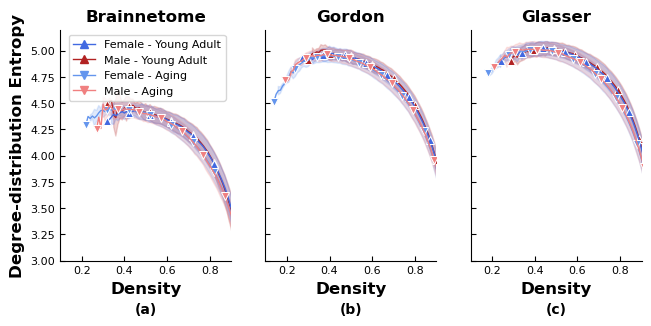

In [15]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3), sharex=True, sharey=True)
df = [YA_BN, YA_gordon, YA_glasser, Aging_BN, Aging_gordon, Aging_glasser]
df_random = [random_YA_BN, random_YA_gordon, random_YA_glasser, random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'entropy degree'

# Graph 1
sns.lineplot(data = df[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
             ci='sd', marker='^', markevery=10)
#sns.lineplot(data = df_random[0], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['royalblue', 'firebrick'],
#             linestyle='dashed', marker='o', markersize=5)

# Graph 2
sns.lineplot(data = df[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
             legend=False, ci='sd', marker='^', markevery=10)
#sns.lineplot(data = df_random[1], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 3
sns.lineplot(data = df[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
             legend=False, ci='sd', marker='^', markevery=10)
#sns.lineplot(data = df_random[2], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['royalblue', 'firebrick'],
#             legend=False, linestyle='dashed')

# Graph 4
sns.lineplot(data = df[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, ci='sd', marker='v', markevery=10)
#sns.lineplot(data = df_random[3], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[0], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 5
sns.lineplot(data = df[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, ci='sd', marker='v', markevery=10)
#sns.lineplot(data = df_random[4], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[1], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

# Graph 6
sns.lineplot(data = df[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['cornflowerblue', 'lightcoral'],
             legend=False, ci='sd', marker='v', markevery=10)
#sns.lineplot(data = df_random[5], x = 'density', y = medida, hue = 'Gender', lw = 1, ax = axes[2], palette = ['firebrick', 'royalblue'],
#             legend=False, linestyle='dashed')

legend_elements = [Line2D([0], [0], color='royalblue', lw=1, label='Female - Young Adult', marker='^'),
                   Line2D([0], [0], color='firebrick', lw=1, label='Male - Young Adult', marker='^'),
                   Line2D([0], [0], color='cornflowerblue', lw=1, label='Female - Aging', marker='v'),
                   Line2D([0], [0], color='lightcoral', lw=1, label='Male - Aging', marker='v')
                   ]

axes[0].set_xlabel('Density', fontsize=12, weight='bold')
axes[0].set_ylabel('Degree-distribution Entropy', fontsize=12, weight='bold')
axes[0].legend(title = None, handles = legend_elements, fontsize=8)

axes[1].set_xlabel('Density', fontsize=12, weight='bold')
axes[1].set_ylabel('Degree-distribution Entropy', fontsize=12, weight='bold')

axes[2].set_xlabel('Density', fontsize=12, weight='bold')
axes[2].set_ylabel('Degree-distribution Entropy', fontsize=12, weight='bold')

plt.xlim(0.1, 0.9)
plt.ylim(3, 5.2)

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].text(0.5, 2.5, '(a)', weight='bold', ha='center')
axes[1].text(0.5, 2.5, '(b)', weight='bold', ha='center')
axes[2].text(0.5, 2.5, '(c)', weight='bold', ha='center')

plt.savefig("Images/Degree_entropy_gender.png", bbox_inches = 'tight', dpi = 450)
plt.show()

#### Diferença

In [64]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'entropy degree'
Female_BN = []
Male_BN = []
dif_YA_BN = []
dif_Aging_BN = []
Female_gordon = []
Male_gordon = []
dif_YA_gordon = []
dif_Aging_gordon = []
Female_glasser = []
Male_glasser = []
dif_YA_glasser = []
dif_Aging_glasser = []

for i in densidade:
    i = round(i,2)
    #print(i)
    Female_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean())
    Male_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())
    dif_YA_BN.append(YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='F')][medida].mean() - YA_BN.loc[(YA_BN['density']==i) & (YA_BN['Gender']=='M')][medida].mean())
    dif_Aging_BN.append(Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='F')][medida].mean() - Aging_BN.loc[(Aging_BN['density']==i) & (Aging_BN['Gender']=='M')][medida].mean())

    Female_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean())
    Male_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    dif_YA_gordon.append(YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='F')][medida].mean() - YA_gordon.loc[(YA_gordon['density']==i) & (YA_gordon['Gender']=='M')][medida].mean())
    dif_Aging_gordon.append(Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='F')][medida].mean() - Aging_gordon.loc[(Aging_gordon['density']==i) & (Aging_gordon['Gender']=='M')][medida].mean())
    
    Female_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean())
    Male_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())
    dif_YA_glasser.append(YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='F')][medida].mean() - YA_glasser.loc[(YA_glasser['density']==i) & (YA_glasser['Gender']=='M')][medida].mean())
    dif_Aging_glasser.append(Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='F')][medida].mean() - Aging_glasser.loc[(Aging_glasser['density']==i) & (Aging_glasser['Gender']=='M')][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'FemaleBN': Female_BN, 'MaleBN': Male_BN, 'YABN': dif_YA_BN, 'AgingBN': dif_Aging_BN,
                             'FemaleGordon': Female_gordon, 'MaleGordon': Male_gordon, 'YAGordon': dif_YA_gordon, 'AgingGordon': dif_Aging_gordon,
                             'FemaleGlasser': Female_glasser, 'MaleGlasser': Male_glasser, 'YAGlasser': dif_YA_glasser, 'AgingGlasser': dif_Aging_glasser})

In [65]:
df_diferenca.describe()

densidade   FemaleBN     MaleBN       YABN    AgingBN  FemaleGordon  \
count  91.000000  69.000000  69.000000  69.000000  74.000000     74.000000   
mean    0.550000   0.022067   0.033120  -0.010167   0.004376      0.040389   
std     0.264134   0.043844   0.036859   0.041064   0.027053      0.020559   
min     0.100000  -0.099932  -0.062867  -0.174100  -0.057276     -0.018003   
25%     0.325000  -0.002781   0.014429  -0.012977  -0.004020      0.025618   
50%     0.550000   0.022243   0.027698  -0.007445   0.000295      0.042057   
75%     0.775000   0.060483   0.060185   0.007307   0.008172      0.060396   
max     1.000000   0.079764   0.100816   0.048415   0.171901      0.068543   

       MaleGordon   YAGordon  AgingGordon  FemaleGlasser  MaleGlasser  \
count   71.000000  71.000000    82.000000      77.000000    72.000000   
mean     0.043421  -0.011614    -0.009514       0.045025     0.046661   
std      0.025724   0.014236     0.009673       0.038591     0.048599   
min     -0.027961  -0.057164    -0.041958      -0.034610    -0.077378   
25%      0.024003  -0.019208    -0.012354       0.009971     0.016828   
50%      0.043427  -0.009465    -0.007749       0.043028     0.049280   
75%      0.067260  -0.001955    -0.005270       0.081683     0.088948   
max      0.082222   0.026414     0.026669       0.099141     0.109194   

       YAGlasser  AgingGlasser  
count  72.000000     80.000000  
mean   -0.004247     -0.005752  
std     0.015176      0.006484  
min    -0.022169     -0.018773  
25%    -0.015185     -0.009136  
50%    -0.008704     -0.006881  
75%     0.005109     -0.003309  
max     0.055145      0.027202

#### Teste estatistico

In [41]:
measure = 'entropy degree'

In [67]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='F'), [measure]], YA_BN.loc[(YA_BN['density'] == i) & (YA_BN['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='F'), [measure]], Aging_BN.loc[(Aging_BN['density'] == i) & (Aging_BN['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [68]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
82     0.92    148743.0      0.008334      4.241600    2.415847e-05   
83     0.93    155746.0      0.000821      4.903159    1.090881e-06   
84     0.94    156970.0      0.003508      4.731775    2.524053e-06   
85     0.95    160848.0      0.000836      4.760360    2.196435e-06   
86     0.96    159528.0      0.003787      4.432848    1.025044e-05   
87     0.97    163270.0      0.000704      4.872689    1.265141e-06   
88     0.98    164210.0      0.000356      5.118460    3.643415e-07   
89     0.99    167347.0      0.000029      5.857558    6.226314e-09   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
82        67754.0         0.251967         1.009678           0.312988  
83        65914.0         0.626421         0.426506           0.669866  
84        64155.0         0.886540         0.091067           0.927464  
85        63847.0         0.800297        -0.061941           0.950627  
86        62470.0         0.455668        -0.601351           0.547795  
87        62710.0         0.509211        -0.422103           0.673076  
88        61848.0         0.332691        -0.747502           0.455004  
89        59200.0         0.055260        -1.827142           0.068091

In [69]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

Empty DataFrame
Columns: [density, statMWU_YA, pvalueMWU_YA, statTtest_YA, pvalueTtest_YA, statMWU_aging, pvalueMWU_aging, statTtest_aging, pvalueTtest_aging]
Index: []

In [70]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.1,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='F'), [measure]], YA_gordon.loc[(YA_gordon['density'] == i) & (YA_gordon['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='F'), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i) & (Aging_gordon['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [71]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
55     0.65     45938.0      0.000091     -3.769668        0.000178   
56     0.66     50780.0      0.000354     -3.417100        0.000669   
57     0.67     55381.0      0.001995     -2.785330        0.005486   
58     0.68     56958.5      0.000487     -3.433366        0.000629   
59     0.69     60181.0      0.000075     -3.778941        0.000170   
60     0.70     65218.0      0.000135     -3.657902        0.000271   
61     0.71     67297.5      0.000114     -3.732761        0.000203   
62     0.72     70670.5      0.000053     -3.894170        0.000106   
63     0.73     74479.0      0.000034     -3.931620        0.000091   
64     0.74     78577.0      0.000053     -4.095244        0.000046   
65     0.75     82529.0      0.000028     -3.883115        0.000111   
66     0.76     86978.0      0.000112     -3.722511        0.000209   
67     0.77     91850.0      0.000138     -3.671386        0.000255   
68     0.78     95691.0      0.000530     -3.182441        0.001508   
69     0.79     99903.0      0.000607     -3.115335        0.001892   
70     0.80    102857.0      0.000325     -3.361064        0.000806   
71     0.81    105865.0      0.000476     -3.095527        0.002020   
72     0.82    110027.0      0.000981     -2.973061        0.003019   
73     0.83    110291.0      0.000213     -3.270072        0.001111   
76     0.86    118249.0      0.000505     -2.921924        0.003554   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
55        48331.0         0.212152        -1.243763           0.214037  
56        51507.0         0.363974        -0.888487           0.374602  
57        51735.0         0.164061        -1.526590           0.127335  
58        51279.0         0.061975        -1.675064           0.094386  
59        53705.5         0.146352        -1.318916           0.187639  
60        52564.0         0.037907        -2.020769           0.043692  
61        55344.0         0.209720        -1.168027           0.243199  
62        54155.0         0.040408        -1.883092           0.060105  
63        57144.0         0.265017        -1.145606           0.252351  
64        57301.0         0.190563        -1.374853           0.169616  
65        57594.0         0.179392        -1.308680           0.191070  
66        58479.0         0.247432        -1.030038           0.303345  
67        59110.0         0.293891        -0.935456           0.349872  
68        58678.5         0.155323        -1.158834           0.246913  
69        59663.0         0.214733        -0.882354           0.377882  
70        61661.0         0.424214        -0.412103           0.680387  
71        63535.0         0.902328         0.268029           0.788754  
72        60582.5         0.234672        -0.708732           0.478721  
73        60362.0         0.180997        -0.800034           0.423955  
76        62926.0         0.637872        -0.154762           0.877052

In [72]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
88     0.98    130849.0      0.003450     -0.094065        0.925075   
89     0.99    131952.0      0.006734      0.060279        0.951944   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
88        56190.0         0.002748        -3.407136           0.000693  
89        56519.0         0.004018        -3.251393           0.001202

In [73]:
s1 = []
p1 = []
s2 = []
p2 = []
s3 = []
p3 = []
s4 = []
p4 = []


var_density = np.arange(0.10,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt2, pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='F'), [measure]], YA_glasser.loc[(YA_glasser['density'] == i) & (YA_glasser['Gender']=='M'), [measure]])
    statt3, pvalue3 = stats.mannwhitneyu(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    statt4, pvalue4 = stats.ttest_ind(Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='F'), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i) & (Aging_glasser['Gender']=='M'), [measure]])
    
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    s3.append(statt3[0])
    p3.append(pvalue3[0])
    s4.append(statt4[0])
    p4.append(pvalue4[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2,s3,p3,s4,p4)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU_YA','pvalueMWU_YA','statTtest_YA','pvalueTtest_YA','statMWU_aging','pvalueMWU_aging','statTtest_aging','pvalueTtest_aging'])


In [74]:
teste_hip.loc[(teste_hip['pvalueMWU_YA'] <= 0.01) & (teste_hip['pvalueTtest_YA'] <= 0.01)]

density  statMWU_YA  pvalueMWU_YA  statTtest_YA  pvalueTtest_YA  \
60     0.70     65778.0      0.003305     -3.067518        0.002232   
61     0.71     70018.0      0.005067     -2.929686        0.003488   
62     0.72     74694.0      0.006560     -2.873917        0.004157   
63     0.73     76485.0      0.001602     -3.030795        0.002513   
65     0.75     82030.0      0.001449     -3.133030        0.001787   
66     0.76     87126.5      0.002207     -3.045129        0.002393   
67     0.77     91323.0      0.003988     -2.804421        0.005147   
68     0.78     95050.0      0.001590     -3.207340        0.001385   
69     0.79     98539.0      0.002818     -3.015198        0.002636   
70     0.80    100615.0      0.001724     -3.152474        0.001669   
71     0.81    104344.0      0.000919     -3.399666        0.000702   
72     0.82    108666.0      0.004151     -2.903475        0.003772   
73     0.83    109961.0      0.000783     -3.342680        0.000860   
74     0.84    113400.0      0.003413     -2.825117        0.004819   
75     0.85    113958.0      0.002621     -2.982063        0.002931   
76     0.86    117194.0      0.009262     -2.681375        0.007450   

    statMWU_aging  pvalueMWU_aging  statTtest_aging  pvalueTtest_aging  
60        53718.0         0.181223        -1.309928           0.190663  
61        54321.0         0.174884        -1.373931           0.169913  
62        53567.0         0.075833        -1.759351           0.078964  
63        55008.0         0.095201        -1.571909           0.116428  
65        57756.0         0.321815        -0.865420           0.387105  
66        58165.0         0.274886        -0.941804           0.346616  
67        57320.0         0.139459        -1.348171           0.178037  
68        57869.0         0.146099        -1.193745           0.232978  
69        58636.0         0.242072        -1.180772           0.238090  
70        59523.0         0.266371        -0.938822           0.348141  
71        58813.0         0.134610        -1.348264           0.178002  
72        58963.0         0.149466        -1.302324           0.193226  
73        59505.0         0.213643        -1.172720           0.241300  
74        59484.0         0.164042        -1.261482           0.207547  
75        59385.0         0.138363        -1.369123           0.171390  
76        58878.0         0.085518        -1.546877           0.122334

In [75]:
teste_hip.loc[(teste_hip['pvalueMWU_aging'] <= 0.01) & (teste_hip['pvalueTtest_aging'] <= 0.01)]

Empty DataFrame
Columns: [density, statMWU_YA, pvalueMWU_YA, statTtest_YA, pvalueTtest_YA, statMWU_aging, pvalueMWU_aging, statTtest_aging, pvalueTtest_aging]
Index: []

## Comparação entre idades

### Clustering

In [71]:
Aging_glasser['density'].min()

0.18

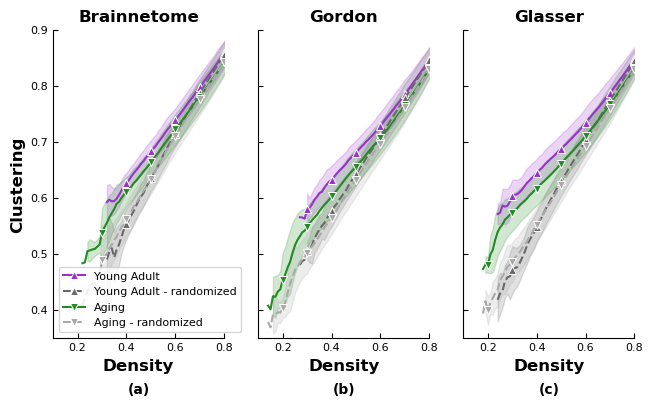

In [73]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 4), sharex=True, sharey=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'clustering'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='v', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', ci='sd',marker='v', markevery=(8,10))

# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))

# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))


"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""
plt.xlim(0.1, 0.8)
plt.ylim(0.35, 0.9)

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
axes[0].legend(title=None, prop = {'size': 8})
axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel('Clustering', fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel('Clustering', fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel('Clustering', fontsize = 12, weight='bold')

axes[0].text(0.45, 0.25, '(a)', weight='bold', ha='center')
axes[1].text(0.45, 0.25, '(b)', weight='bold', ha='center')
axes[2].text(0.45, 0.25, '(c)', weight='bold', ha='center')
        

#plt.tight_layout()
plt.savefig("Images/Clustering_groups.png", bbox_inches = 'tight', dpi = 450)

plt.show()

#### Diferença

In [37]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'clustering'
diferenca1 = []
diferenca2 = []
diferenca3 = []
for i in densidade:
    i = round(i,2)
    #print(i)
    diferenca1.append(Aging_BN.loc[Aging_BN['density']==i][medida].mean() - YA_BN.loc[YA_BN['density']==i][medida].mean())
    diferenca2.append(Aging_gordon.loc[Aging_gordon['density']==i][medida].mean() - YA_gordon.loc[YA_gordon['density']==i][medida].mean())
    diferenca3.append(Aging_glasser.loc[Aging_glasser['density']==i][medida].mean() - YA_glasser.loc[YA_glasser['density']==i][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'BN': diferenca1, 'gordon':diferenca2, 'glasser':diferenca3})

In [38]:
df_diferenca.describe()

densidade         BN     gordon    glasser
count  91.000000  69.000000  74.000000  77.000000
mean    0.550000  -0.015247  -0.019550  -0.019709
std     0.264134   0.005945   0.009124   0.008647
min     0.100000  -0.036443  -0.034175  -0.033686
25%     0.325000  -0.017653  -0.026084  -0.026198
50%     0.550000  -0.016661  -0.021114  -0.023106
75%     0.775000  -0.014152  -0.014998  -0.015622
max     1.000000   0.000000   0.000000   0.000000

#### Teste estatistico

In [24]:
measure = 'clustering'

In [25]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [26]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
9      0.41    1276.0  5.041705e-03   2.706519  7.894139e-03
10     0.42    1746.0  5.814707e-04   3.152205  2.028795e-03
11     0.43    2487.0  1.733900e-04   3.397378  8.740667e-04
12     0.44    3572.0  3.566108e-05   4.084212  6.783129e-05
13     0.45    4632.0  4.400608e-06   4.351471  2.189795e-05
14     0.46    6684.0  1.098610e-07   5.043440  9.465911e-07
15     0.47    7901.0  2.046268e-07   4.966868  1.261848e-06
16     0.48   10738.0  3.486512e-09   5.931322  8.655568e-09
17     0.49   14273.0  1.483676e-10   6.456846  3.892917e-10
18     0.50   17412.0  8.359116e-12   6.886328  2.600840e-11
19     0.51   23149.0  4.920517e-13   7.087868  6.219403e-12
20     0.52   29388.0  5.036889e-13   7.019370  8.413936e-12
21     0.53   34801.0  1.485343e-14   7.687219  8.651000e-14
22     0.54   43333.0  1.735569e-14   7.621953  1.160876e-13
23     0.55   52779.0  1.580673e-15   8.019350  5.863855e-15
24     0.56   66078.0  4.459646e-18   8.744270  1.977718e-17
25     0.57   79966.0  3.612375e-20   9.173623  5.105288e-19
26     0.58   88938.0  9.262004e-21   9.306776  1.495382e-19
27     0.59  102114.0  4.026114e-22   9.556411  1.540123e-20
28     0.60  112417.0  4.768962e-21   9.262452  1.699790e-19
29     0.61  125970.0  1.435208e-22   9.698831  3.480259e-21
30     0.62  140280.0  3.541227e-23   9.912745  4.562225e-22
31     0.63  156236.0  1.784526e-24  10.291516  1.237491e-23
32     0.64  173975.0  1.096298e-25  10.572013  7.551497e-25
33     0.65  192141.0  1.006285e-27  10.940197  1.831994e-26
34     0.66  206330.0  6.026412e-29  11.020204  7.475810e-27
35     0.67  220104.0  4.723681e-31  11.616088  1.544222e-29
36     0.68  237793.0  1.333085e-31  11.442028  8.272936e-29
37     0.69  252935.0  8.629514e-34  11.969732  2.852141e-31
38     0.70  263470.0  3.002780e-34  11.945896  3.417228e-31
39     0.71  279957.0  5.402497e-37  12.447207  1.268640e-33
40     0.72  296686.0  6.233757e-37  12.181163  2.137437e-32
41     0.73  309926.0  2.649910e-39  12.562897  2.822143e-34
42     0.74  327468.0  1.071444e-40  12.810920  1.492934e-35
43     0.75  343783.0  1.535675e-41  12.720027  3.819254e-35
44     0.76  357858.0  6.786044e-43  12.950920  2.442980e-36
45     0.77  375414.0  1.576485e-46  13.660735  4.753645e-40
46     0.78  395894.0  7.077067e-47  13.501191  2.852187e-39
47     0.79  408267.0  5.237634e-49  13.825272  5.093853e-41
48     0.80  424029.0  3.034135e-52  14.392472  3.806571e-44
49     0.81  441390.0  1.871570e-55  14.912749  4.094703e-47
50     0.82  460110.0  2.735775e-59  15.546813  7.697427e-51
51     0.83  471659.0  2.939789e-61  15.797108  2.320065e-52
52     0.84  491129.0  5.612216e-66  16.569681  4.083816e-57
53     0.85  512849.0  1.041002e-70  17.319070  6.542841e-62
54     0.86  528088.0  1.988226e-74  17.908230  8.688222e-66
55     0.87  538643.0  4.452430e-77  18.176443  1.337930e-67
56     0.88  550999.0  1.781099e-80  18.593486  1.928559e-70
57     0.89  568578.0  1.324853e-83  18.753394  1.296466e-71
58     0.90  576680.0  1.426692e-85  18.819960  4.181922e-72
59     0.91  585107.0  3.337123e-87  18.660528  4.622206e-71
60     0.92  589802.0  6.837113e-88  18.280828  1.594230e-68
61     0.93  598434.0  8.005948e-90  18.144883  1.188439e-67
62     0.94  605806.0  3.864379e-91  17.875699  6.774330e-66
63     0.95  609067.0  3.120966e-91  17.344997  1.937466e-62
64     0.96  610812.0  2.264369e-91  16.693286  2.778329e-58
65     0.97  613306.0  1.081193e-91  15.886768  2.681050e-53
66     0.98  610844.0  1.056764e-89  14.921939  1.434524e-47
67     0.99  604635.0  8.795172e-85  13.709074  9.129729e-41

In [27]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [28]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
7      0.34    1257.0  1.741899e-04   3.507769  6.317575e-04
8      0.35    1676.0  1.170835e-04   3.690785  3.193601e-04
9      0.36    2163.0  2.113545e-04   3.611560  4.062365e-04
10     0.37    3531.0  7.969214e-06   4.570119  8.838286e-06
11     0.38    4441.0  6.526463e-07   5.049350  9.770641e-07
..      ...       ...           ...        ...           ...
68     0.95  604000.0  1.084528e-84  14.447012  7.517314e-45
69     0.96  604073.0  2.413402e-84  13.712320  8.767143e-41
70     0.97  603365.0  8.575425e-84  12.966248  7.924051e-37
71     0.98  601437.0  2.650922e-82  12.234219  4.015487e-33
72     0.99  596805.0  8.868001e-79  11.413520  3.487658e-29

[66 rows x 5 columns]

In [29]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [30]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
6      0.30     665.0  2.835975e-03   3.220809  1.919651e-03
7      0.31     980.0  1.016982e-03   3.497960  7.446457e-04
8      0.32    1484.0  7.367536e-04   3.698914  3.464961e-04
9      0.33    2112.0  1.899126e-04   3.811864  2.140059e-04
10     0.34    3086.0  1.412077e-05   4.432098  1.763875e-05
..      ...       ...           ...        ...           ...
71     0.95  598378.0  1.544297e-81  14.079578  8.608915e-43
72     0.96  599914.0  1.572942e-81  13.517818  9.827130e-40
73     0.97  599156.0  1.475014e-80  12.687830  2.132797e-35
74     0.98  596151.0  2.748643e-78  11.746013  9.431440e-31
75     0.99  593036.0  5.723422e-76  10.220581  7.064080e-24

[70 rows x 5 columns]

### Average distance

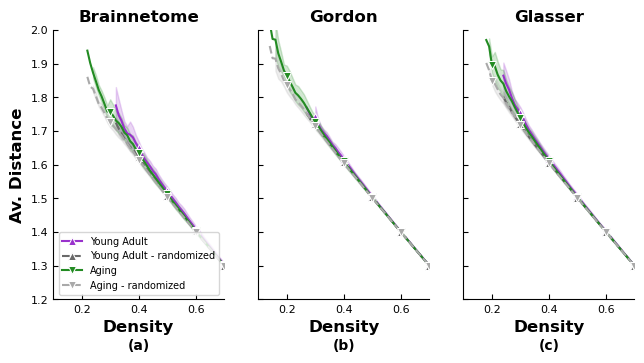

In [76]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3.5), sharex=True, sharey=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'av. distance'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='v', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', ci='sd',marker='v', markevery=(8,10))

# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))

# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))


"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')
 
axes[0].legend(title=None, prop = {'size': 7}, loc='lower center')
axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel('Av. Distance', fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel('Av. Distance', fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel('Av. Distance', fontsize = 12, weight='bold')

axes[0].text(0.4, 1.05, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 1.05, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 1.05, '(c)', weight='bold', ha='center')

plt.xlim(0.1, 0.7)
plt.ylim(1.2, 2)

#plt.tight_layout()
plt.savefig("Images/Distance_groups.png", bbox_inches = 'tight', dpi = 450)

plt.show()

#### Diferença

In [35]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'av. distance'
diferenca1 = []
diferenca2 = []
diferenca3 = []
for i in densidade:
    i = round(i,2)
    #print(i)
    diferenca1.append(Aging_BN.loc[Aging_BN['density']==i][medida].mean() - YA_BN.loc[YA_BN['density']==i][medida].mean())
    diferenca2.append(Aging_gordon.loc[Aging_gordon['density']==i][medida].mean() - YA_gordon.loc[YA_gordon['density']==i][medida].mean())
    diferenca3.append(Aging_glasser.loc[Aging_glasser['density']==i][medida].mean() - YA_glasser.loc[YA_glasser['density']==i][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'BN': diferenca1, 'gordon':diferenca2, 'glasser':diferenca3})

In [36]:
df_diferenca.describe()

densidade            BN     gordon       glasser
count  91.000000  6.900000e+01  74.000000  7.700000e+01
mean    0.550000 -5.659782e-03  -0.001792 -3.394524e-03
std     0.264134  7.447815e-03   0.002954  5.009312e-03
min     0.100000 -4.467896e-02  -0.014703 -2.386548e-02
25%     0.325000 -8.388152e-03  -0.003267 -5.497717e-03
50%     0.550000 -2.919549e-03  -0.000490 -1.306261e-03
75%     0.775000 -4.729647e-04  -0.000065 -2.074153e-04
max     1.000000  6.478193e-08   0.005759  6.412328e-08

#### Teste estatistico

In [32]:
measure = 'av. distance'

In [33]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [34]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
8      0.40     978.0  9.707050e-03   2.651234  9.412136e-03
11     0.43    2368.5  1.455443e-03   2.829847  5.304156e-03
12     0.44    3586.5  2.811864e-05   4.326437  2.570950e-05
13     0.45    4526.0  2.031018e-05   3.550575  4.829109e-04
14     0.46    6531.0  7.895962e-07   4.362372  1.966884e-05
15     0.47    7561.5  7.298647e-06   4.092886  5.753440e-05
16     0.48   10034.5  2.402738e-06   4.228795  3.165525e-05
17     0.49   13432.0  1.540357e-07   5.040759  7.715894e-07
18     0.50   16388.5  2.037108e-08   5.571836  4.981193e-08
19     0.51   22390.5  8.661084e-11   6.490384  2.543895e-10
20     0.52   29608.5  1.330455e-13   6.547417  1.624096e-10
21     0.53   34917.0  7.702263e-15   6.484811  2.223871e-10
22     0.54   43865.0  1.335592e-15   6.795754  2.907116e-11
23     0.55   53496.0  7.093344e-17   6.709121  4.649265e-11
24     0.56   67249.5  3.900565e-20   7.593073  1.112495e-13
25     0.57   81152.0  4.357594e-22   8.628509  4.197557e-17
26     0.58   91010.0  6.047983e-24   9.000350  1.908237e-18
27     0.59  105532.5  4.013200e-27   9.136273  5.473205e-19
28     0.60  116112.0  6.536864e-26   8.359743  2.666438e-16
29     0.61  129922.5  1.519297e-27   8.511961  7.481200e-17
30     0.62  146235.0  2.451324e-30   9.078150  6.679262e-19
31     0.63  162258.0  2.350086e-31   9.139624  3.647573e-19
32     0.64  179141.0  2.857017e-31   7.695955  3.332345e-14
33     0.65  197866.5  8.124347e-34   7.829209  1.188990e-14
34     0.66  213432.0  1.733931e-36   7.802729  1.410692e-14
35     0.67  225890.0  2.122964e-37   8.031899  2.408751e-15
36     0.68  243737.0  3.467315e-38   7.980762  3.451749e-15
37     0.69  257324.0  2.051023e-39   7.570786  7.370489e-14
38     0.70  267827.5  1.890747e-40   7.366076  3.218405e-13
39     0.71  281867.0  2.411647e-42   7.580624  6.651081e-14
40     0.72  298080.0  1.603059e-42   6.300496  4.055699e-10
41     0.73  306127.0  5.733505e-42   5.550336  3.441751e-08
42     0.74  314038.5  6.184404e-37   5.059092  4.789686e-07
43     0.75  322511.0  1.773386e-33   3.979500  7.262124e-05
44     0.76  328588.5  6.522143e-31   3.799926  1.508669e-04
45     0.77  340470.5  2.661748e-32   5.345392  1.047146e-07
46     0.78  359553.0  6.594289e-34   4.885912  1.140711e-06
47     0.79  360830.0  1.349783e-30   5.674485  1.665257e-08
48     0.80  368997.0  8.831649e-31   5.969269  2.955994e-09
49     0.81  377855.5  2.834258e-30   5.677708  1.625348e-08
50     0.82  385872.5  1.473838e-29   5.355198  9.799654e-08
51     0.83  390503.5  7.257125e-29   5.303288  1.295710e-07
52     0.84  403169.0  3.415438e-31   5.913613  4.068200e-09
53     0.85  414270.5  6.764748e-32   5.760332  9.981411e-09
54     0.86  415453.0  1.464627e-29   6.000602  2.401688e-09
55     0.87  415096.0  3.112999e-27   5.522726  3.855284e-08
56     0.88  419190.0  7.659353e-28   4.952206  8.060023e-07
57     0.89  424985.5  1.319926e-24   4.131265  3.778926e-05
58     0.90  416198.5  5.419269e-18   3.553582  3.900981e-04
59     0.91  414241.5  6.405184e-16   3.075647  2.132734e-03
61     0.93  405199.0  1.770041e-09   2.773595  5.601838e-03

In [35]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [36]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
10     0.37    3243.0  6.653083e-04   3.305261  1.137427e-03
11     0.38    3949.0  6.367413e-04   3.764688  2.177663e-04
12     0.39    6381.0  2.503827e-06   5.262989  3.213587e-07
13     0.40    8479.5  9.910127e-06   4.284244  2.543490e-05
14     0.41   11715.5  2.364039e-07   4.950350  1.226062e-06
15     0.42   17082.0  5.497727e-10   5.786885  1.586540e-08
16     0.43   22367.0  2.064861e-10   5.743232  1.843617e-08
17     0.44   26431.0  3.918944e-09   4.619431  5.057418e-06
18     0.45   35026.5  7.321773e-11   5.652614  2.674962e-08
19     0.46   46859.0  7.491323e-14   6.705084  4.971861e-11
20     0.47   59346.0  2.764170e-17   7.340253  6.878868e-13
21     0.48   70530.5  8.089729e-18   7.616748  9.049025e-14
22     0.49   79736.0  4.961148e-19   7.595588  9.884564e-14
23     0.50   92476.0  7.818049e-21   7.337062  5.731248e-13
24     0.51  110623.5  9.492144e-23   7.316737  6.139442e-13
25     0.52  125221.5  4.245551e-24   7.655921  5.184759e-14
26     0.53  140700.5  3.481592e-26   7.807038  1.622024e-14
27     0.54  155008.0  1.153015e-24   6.152894  1.118749e-09
28     0.55  168664.5  1.132116e-24   6.285881  4.868461e-10
29     0.56  182645.0  4.545015e-26   6.734284  2.728186e-11
30     0.57  194599.0  2.786774e-26   6.585196  7.112727e-11
31     0.58  207635.0  2.123807e-27   6.952145  6.153312e-12
32     0.59  222801.0  2.280599e-30   7.292953  5.682608e-13
33     0.60  237484.5  2.820838e-33   7.546862  8.965109e-14
34     0.61  253373.5  3.233010e-34   7.160988  1.391234e-12
35     0.62  267529.0  6.658159e-35   6.531561  9.480260e-11
36     0.63  283733.0  2.970771e-37   6.534454  9.211010e-11
37     0.64  295152.5  4.528825e-36   6.545739  8.484731e-11
38     0.65  300527.0  5.225078e-33   6.585592  6.504998e-11
39     0.66  314353.5  1.508762e-31   5.213107  2.141433e-07
40     0.67  326353.5  9.618463e-33   5.161475  2.802418e-07
41     0.68  331419.0  3.553919e-31   5.213342  2.128218e-07
42     0.69  344819.0  3.720051e-30   4.831593  1.497102e-06
43     0.70  355733.5  1.382157e-30   5.727448  1.231410e-08
44     0.71  354678.0  1.659243e-26   5.387471  8.281998e-08
45     0.72  364612.0  9.923971e-27   5.299063  1.333652e-07
46     0.73  372917.5  4.752010e-26   5.393477  7.975753e-08
47     0.74  381840.5  1.812054e-26   5.357666  9.674892e-08
48     0.75  385377.5  2.120179e-23   5.638894  2.018931e-08
49     0.76  388144.0  7.115961e-22   5.666253  1.724114e-08
50     0.77  398484.0  4.533520e-23   5.530559  3.707331e-08
51     0.78  396160.5  6.177242e-20   3.816754  1.401883e-04
52     0.79  401063.0  1.765764e-18   3.763229  1.735002e-04
53     0.80  408129.5  4.121160e-18   3.145971  1.684055e-03
54     0.81  407948.0  8.720845e-17   3.938329  8.534455e-05
55     0.82  414307.5  1.756646e-18   4.036342  5.666552e-05
56     0.83  409907.0  1.207727e-14   4.023379  5.983280e-05
57     0.84  409344.0  1.193627e-11   3.937502  8.556193e-05
58     0.85  415895.0  4.305417e-15   3.122834  1.820360e-03
59     0.86  413485.5  1.225776e-12   2.907395  3.690001e-03
60     0.87  409941.5  3.598176e-10   3.099809  1.966866e-03
61     0.88  407703.5  4.796155e-09   3.667566  2.520454e-04
62     0.89  404257.5  3.440385e-06   3.107222  1.918212e-03
63     0.90  402821.5  5.748731e-05   2.816914  4.901872e-03

In [37]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [38]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
7      0.31     918.0  7.883370e-03   2.807238  6.180966e-03
8      0.32    1383.0  8.489601e-03   2.803810  6.017103e-03
12     0.36    4869.0  1.517525e-03   2.703391  7.436817e-03
13     0.37    6690.5  5.420632e-04   2.993654  3.048535e-03
14     0.38    8745.5  1.043950e-04   3.698914  2.632314e-04
15     0.39   11750.0  3.575595e-05   3.788695  1.827712e-04
16     0.40   17362.0  1.338477e-08   5.597267  4.463600e-08
17     0.41   21313.0  8.119945e-10   6.285644  9.099636e-10
18     0.42   28323.0  2.985315e-11   6.261502  9.301999e-10
19     0.43   36117.0  9.578587e-15   7.491309  3.396244e-13
20     0.44   45112.5  5.834012e-17   8.241877  1.394205e-15
21     0.45   53279.0  4.806607e-19   8.199653  1.665100e-15
22     0.46   66297.5  2.371382e-21   8.851260  9.110919e-18
23     0.47   73390.0  5.057071e-21   7.827061  2.019934e-14
24     0.48   84457.5  2.969451e-23   8.580623  6.121519e-17
25     0.49   99842.0  3.458143e-26   8.636584  3.451675e-17
26     0.50  113193.0  6.700161e-27   9.340210  9.280786e-20
27     0.51  129876.5  3.465028e-29   9.425523  3.905175e-20
28     0.52  139134.5  1.698407e-26   7.949298  5.638176e-15
29     0.53  154298.5  1.179698e-29   8.193458  8.309581e-16
30     0.54  168000.5  1.234099e-31   8.230176  5.978514e-16
31     0.55  179938.0  2.835367e-33   8.086518  1.761507e-15
32     0.56  192158.0  9.082877e-33   6.802325  1.734931e-11
33     0.57  203221.0  2.905100e-33   6.991179  4.792987e-12
34     0.58  223643.0  3.639555e-37   7.936142  5.055174e-15
35     0.59  237993.5  4.220553e-39   7.491484  1.355804e-13
36     0.60  250281.0  3.233881e-36   7.275015  6.277632e-13
37     0.61  268866.0  1.967678e-40   7.968100  3.664668e-15
38     0.62  282258.5  2.631525e-40   7.830040  1.030193e-14
39     0.63  296747.0  9.294126e-39   7.499802  1.180236e-13
40     0.64  307712.5  3.285694e-39   7.570313  6.947980e-14
41     0.65  312737.0  5.693295e-38   7.439754  1.793620e-13
42     0.66  324896.5  4.753229e-37   7.590998  5.826722e-14
43     0.67  339702.5  2.162706e-39   6.929046  6.431702e-12
44     0.68  347970.0  1.121221e-37   7.070321  2.407511e-12
45     0.69  353797.5  1.569809e-36   6.531387  8.986741e-11
46     0.70  355515.0  6.100464e-33   5.819400  7.234763e-09
47     0.71  362708.0  1.088979e-31   5.696013  1.473819e-08
48     0.72  373217.5  1.986104e-33   6.445940  1.538213e-10
49     0.73  376240.5  1.080812e-28   5.541901  3.512093e-08
50     0.74  382771.0  1.881916e-27   5.364482  9.331015e-08
51     0.75  384675.5  2.977324e-28   5.029193  5.487091e-07
52     0.76  393761.0  5.678431e-27   5.382345  8.438633e-08
53     0.77  397022.5  3.852880e-26   5.508615  4.198396e-08
54     0.78  399933.0  3.706986e-22   5.699452  1.421292e-08
55     0.79  407527.5  1.747629e-25   6.105450  1.273597e-09
56     0.80  403534.5  5.860396e-20   5.559228  3.147187e-08
57     0.81  407471.5  4.024281e-18   5.841415  6.190471e-09
58     0.82  410654.5  6.803311e-19   4.923379  9.327174e-07
59     0.83  412911.0  2.662217e-18   5.356941  9.603961e-08
60     0.84  413633.0  1.420361e-18   4.718410  2.567879e-06
61     0.85  407473.5  2.566519e-14   4.047092  5.413591e-05
62     0.86  405001.5  1.396019e-12   3.708423  2.150871e-04
66     0.90  395754.5  8.476270e-05   2.847572  4.456115e-03
67     0.91  397311.0  1.582130e-04   2.677315  7.489576e-03

### Diameter

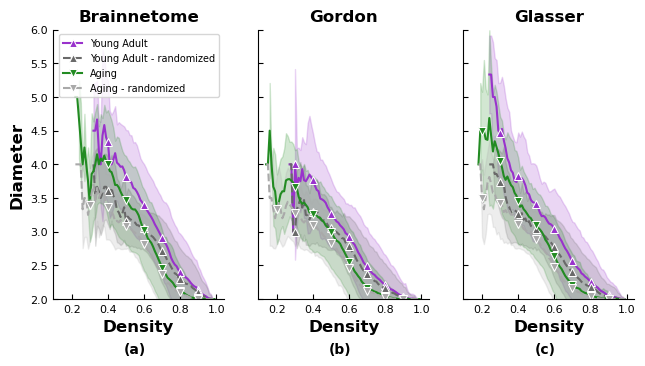

In [77]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3.5), sharex=True, sharey=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'diameter'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='v', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', ci='sd',marker='v', markevery=(8,10))

# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))

# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))



"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Diameter'

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')
 
axes[0].legend(title=None, prop = {'size': 7})
axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[0].text(0.55, 1.2, '(a)', weight='bold', ha='center')
axes[1].text(0.55, 1.2, '(b)', weight='bold', ha='center')
axes[2].text(0.55, 1.2, '(c)', weight='bold', ha='center')

#plt.xlim(0.1, 0.7)
plt.ylim(2, 6)

#plt.tight_layout()
plt.savefig("Images/Diameter_groups.png", bbox_inches = 'tight', dpi = 450)

plt.show()

#### Diferença

In [33]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'diameter'
diferenca1 = []
diferenca2 = []
diferenca3 = []
for i in densidade:
    i = round(i,2)
    #print(i)
    diferenca1.append(Aging_BN.loc[Aging_BN['density']==i][medida].mean() - YA_BN.loc[YA_BN['density']==i][medida].mean())
    diferenca2.append(Aging_gordon.loc[Aging_gordon['density']==i][medida].mean() - YA_gordon.loc[YA_gordon['density']==i][medida].mean())
    diferenca3.append(Aging_glasser.loc[Aging_glasser['density']==i][medida].mean() - YA_glasser.loc[YA_glasser['density']==i][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'BN': diferenca1, 'gordon':diferenca2, 'glasser':diferenca3})

In [34]:
df_diferenca.describe()

densidade         BN     gordon    glasser
count  91.000000  69.000000  74.000000  77.000000
mean    0.550000  -0.288182  -0.230578  -0.289473
std     0.264134   0.151255   0.183588   0.183764
min     0.100000  -0.600000  -0.561129  -0.904762
25%     0.325000  -0.391811  -0.335213  -0.400365
50%     0.550000  -0.320309  -0.279847  -0.295122
75%     0.775000  -0.200000  -0.121385  -0.180461
max     1.000000   0.085714   0.729167   0.000000

#### Teste estatistico

In [40]:
measure = 'diameter'

In [41]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [42]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
12     0.44    3348.0  2.929333e-04   3.787069  2.108127e-04
13     0.45    4070.0  1.451645e-03   2.721817  7.086591e-03
14     0.46    5806.0  4.446229e-04   3.031000  2.725519e-03
15     0.47    7040.5  1.903278e-04   3.537189  4.819094e-04
16     0.48    9822.5  1.397838e-06   4.695074  4.140651e-06
17     0.49   12812.0  1.068635e-06   4.884174  1.632620e-06
18     0.50   14837.0  2.776637e-05   4.182319  3.637434e-05
19     0.51   20120.5  1.553994e-06   4.894549  1.432922e-06
20     0.52   26642.5  1.668130e-08   5.307301  1.762463e-07
21     0.53   31679.5  5.472247e-10   5.843322  9.488326e-09
22     0.54   38694.5  2.328095e-08   5.354155  1.282557e-07
23     0.55   46620.5  4.696875e-08   5.222451  2.462073e-07
24     0.56   57854.0  7.081095e-09   5.603445  3.126031e-08
25     0.57   69579.5  1.967796e-09   6.125204  1.514403e-09
26     0.58   78696.0  2.449409e-11   6.758275  2.849449e-11
27     0.59   92467.0  1.083016e-14   8.073895  2.575621e-15
28     0.60  103847.5  3.074461e-16   8.531042  6.916427e-17
29     0.61  116254.0  9.721054e-18   9.008420  1.309275e-18
30     0.62  132839.0  3.492457e-22  10.129404  6.331592e-23
31     0.63  147722.5  2.764009e-23  10.395882  4.644094e-24
32     0.64  164189.0  7.863476e-24  10.185473  2.928904e-23
33     0.65  181665.0  5.113513e-26  10.770108  9.778961e-26
34     0.66  196520.0  2.306905e-28  11.277159  5.595612e-28
35     0.67  209848.5  4.759341e-30  11.785213  2.613237e-30
36     0.68  230395.0  5.489720e-33  12.425526  2.206262e-33
37     0.69  246032.0  8.101747e-36  12.808126  2.694767e-35
38     0.70  259879.0  1.461471e-39  13.762359  3.544024e-40
39     0.71  276030.5  3.072589e-42  14.311874  3.727634e-43
40     0.72  294060.5  2.260891e-43  14.027010  1.010202e-41
41     0.73  303638.0  2.695168e-43  13.983682  1.533616e-41
42     0.74  311908.5  1.289313e-37  12.548477  2.978993e-34
43     0.75  318163.5  6.111262e-32  11.208161  5.641073e-28
44     0.76  324276.5  5.126713e-29  10.681325  1.143078e-25
45     0.77  337903.5  8.527042e-32  11.447080  4.178514e-29
46     0.78  358727.0  8.505722e-35  12.084250  3.875746e-32
47     0.79  360295.5  2.749660e-31  11.509457  1.926981e-29
48     0.80  367736.5  1.288496e-30  11.415262  5.035103e-29
49     0.81  374606.0  8.027877e-29  11.032372  2.650345e-27
50     0.82  383682.5  1.067952e-28  11.001993  3.488750e-27
51     0.83  390578.5  7.369686e-30  11.419754  4.278516e-29
52     0.84  403815.0  6.415987e-33  12.121359  1.926113e-32
53     0.85  413014.5  2.681086e-32  12.033781  4.848942e-32
54     0.86  415885.5  6.423415e-31  11.689734  2.076213e-30
55     0.87  415005.0  6.338321e-28  11.182339  4.629568e-28
56     0.88  417478.5  2.633738e-27  11.004454  2.903382e-27
57     0.89  424679.5  2.411127e-25  10.541372  3.149663e-25
58     0.90  416967.0  8.084636e-20   9.254887  6.056892e-20
59     0.91  415814.0  8.706851e-18   8.708071  6.973673e-18
60     0.92  405284.0  7.670690e-12   6.576316  6.329307e-11
61     0.93  405106.0  5.180037e-10   6.203165  6.863620e-10
62     0.94  405078.0  7.820573e-09   5.825189  6.747147e-09
63     0.95  399648.0  1.776961e-05   4.312362  1.702727e-05

In [43]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [44]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
7      0.34    1139.0  1.195280e-03   3.454936  7.559149e-04
9      0.36    1883.0  8.180491e-03   2.880872  4.506380e-03
10     0.37    2978.0  5.177942e-03   3.545065  4.959323e-04
11     0.38    3921.5  8.168633e-05   4.923094  1.749125e-06
12     0.39    6076.5  2.753523e-06   5.330971  2.305544e-07
13     0.40    8537.0  7.949419e-08   5.705832  3.009730e-08
14     0.41   11427.0  1.404657e-08   5.647941  3.711518e-08
15     0.42   15935.0  8.356831e-09   5.806053  1.429443e-08
16     0.43   21257.5  2.153487e-10   6.464051  2.978852e-10
17     0.44   24121.5  1.409029e-06   4.866577  1.583788e-06
18     0.45   32164.0  2.141964e-08   5.881326  7.505947e-09
19     0.46   42924.0  7.793533e-11   6.663475  6.466756e-11
20     0.47   54015.5  2.586055e-13   7.555706  1.541271e-13
21     0.48   62830.0  2.329234e-11   7.071308  3.921263e-12
22     0.49   70734.0  3.702208e-12   7.283941  8.791230e-13
23     0.50   80697.0  1.117164e-11   6.903184  1.091353e-11
24     0.51   97854.0  1.339238e-14   7.883059  1.034524e-14
25     0.52  111640.5  9.894230e-17   8.470498  1.058520e-16
26     0.53  124369.5  3.868996e-17   8.780823  8.052941e-18
27     0.54  138899.5  2.389552e-17   8.682179  1.662171e-17
28     0.55  151137.0  7.024079e-17   8.625312  2.489178e-17
29     0.56  167603.0  1.220300e-21   9.911583  3.484294e-22
30     0.57  181618.0  4.927546e-24  10.528129  9.930240e-25
31     0.58  194077.0  3.669269e-25  10.875626  3.076607e-26
32     0.59  210449.5  3.001659e-29  11.883260  8.938210e-31
33     0.60  228438.5  5.670980e-35  13.188411  4.064862e-37
34     0.61  245202.5  5.469293e-35  13.154466  5.042943e-37
35     0.62  257503.0  7.849232e-33  12.426449  1.702965e-33
36     0.63  275731.0  2.082914e-36  13.145806  4.171563e-37
37     0.64  286819.5  5.142821e-34  12.641888  1.211137e-34
38     0.65  292906.0  1.292887e-30  12.075159  6.232689e-32
39     0.66  308794.0  4.239190e-30  11.662228  4.926968e-30
40     0.67  321979.0  7.864856e-32  12.037084  7.939743e-32
41     0.68  326551.0  1.078383e-29  11.361230  1.079430e-28
42     0.69  343212.0  4.846677e-31  11.599535  8.040793e-30
43     0.70  356612.0  4.855056e-33  12.207604  9.804783e-33
44     0.71  353774.5  1.506271e-27  11.006790  3.728081e-27
45     0.72  364445.5  6.709654e-28  11.032033  2.763907e-27
46     0.73  370475.5  8.232686e-26  10.707442  7.279034e-26
47     0.74  380163.5  1.030060e-26  10.872359  1.330091e-26
48     0.75  383612.0  1.434189e-23  10.233705  7.440216e-24
49     0.76  387841.0  3.178222e-23  10.119122  2.212032e-23
50     0.77  396065.0  3.212683e-23  10.153395  1.556686e-23
51     0.78  396978.5  9.276236e-22   9.648969  1.798788e-21
52     0.79  402896.0  1.901894e-21   9.629855  2.112775e-21
53     0.80  408520.0  6.324393e-21   9.343362  2.829836e-20
54     0.81  409890.5  2.922716e-20   9.213487  8.962205e-20
55     0.82  411759.5  1.382160e-19   9.036628  4.217597e-19
56     0.83  411296.0  5.041686e-18   8.799127  3.258836e-18
57     0.84  414776.0  1.199961e-17   8.653313  1.112982e-17
58     0.85  414936.0  1.374717e-17   8.591578  1.859811e-17
59     0.86  410941.0  2.026607e-14   7.680374  2.610545e-14
60     0.87  410457.0  1.750611e-14   7.701941  2.212074e-14
61     0.88  407930.0  1.377820e-11   6.793767  1.483444e-11
62     0.89  404372.0  2.423046e-08   5.626414  2.131280e-08
63     0.90  401473.0  1.390052e-06   4.856893  1.296060e-06
64     0.91  402916.0  4.464099e-06   4.545167  5.854496e-06
65     0.92  397476.0  3.328938e-04   3.600412  3.263164e-04

In [45]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [46]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
7      0.31     908.0  4.748041e-03   3.088531  2.708458e-03
8      0.32    1392.0  2.602097e-03   3.458630  7.855368e-04
9      0.33    1946.0  1.624097e-03   3.526183  5.872179e-04
16     0.40   16364.0  5.035002e-07   4.896252  1.506998e-06
17     0.41   20223.0  1.137253e-08   6.107099  2.544067e-09
18     0.42   26600.0  4.470177e-09   6.277981  8.442974e-10
19     0.43   33759.5  4.329437e-12   7.249271  1.729460e-12
20     0.44   40713.0  4.372374e-11   7.070754  5.002076e-12
21     0.45   47087.0  3.440828e-11   6.545985  1.341190e-10
22     0.46   59044.0  3.021789e-13   7.689093  5.873958e-14
23     0.47   64102.0  2.693228e-11   6.478611  1.823047e-10
24     0.48   72887.0  6.165892e-12   7.142923  2.308279e-12
25     0.49   86100.0  2.034831e-13   7.331993  5.879265e-13
26     0.50  100039.0  8.660709e-17   8.419600  1.733797e-16
27     0.51  113617.0  5.627205e-17   8.639245  2.755961e-17
28     0.52  119281.0  1.425990e-12   7.181001  1.456245e-12
29     0.53  129211.5  3.458805e-12   7.129858  2.010864e-12
30     0.54  144657.0  2.093814e-17   8.776098  7.501967e-18
31     0.55  159076.0  8.559348e-23  10.261982  1.460378e-23
32     0.56  170563.0  5.569563e-22   9.903268  3.721521e-22
33     0.57  182429.0  1.638343e-24  10.482156  1.540722e-24
34     0.58  205406.5  8.054644e-32  12.405755  3.386294e-33
35     0.59  219946.5  1.256255e-32  12.323562  7.327662e-33
36     0.60  234391.0  1.238349e-30  11.968837  2.999699e-31
37     0.61  254300.0  1.161637e-35  13.028870  1.973380e-36
38     0.62  271309.5  1.871597e-38  13.609234  1.897265e-39
39     0.63  285608.5  4.083595e-35  12.846853  1.202681e-35
40     0.64  297090.0  8.106286e-36  12.898692  6.058874e-36
41     0.65  304601.0  9.180377e-36  12.861315  8.774890e-36
42     0.66  319130.0  3.823055e-36  13.054660  8.323966e-37
43     0.67  334948.0  4.182341e-39  13.421788  9.785976e-39
44     0.68  344582.0  3.556022e-38  13.270874  5.398172e-38
45     0.69  350530.0  5.856667e-37  12.841779  7.840976e-36
46     0.70  355961.0  1.169567e-35  12.488469  4.299393e-34
47     0.71  360682.0  3.386716e-32  11.660973  3.870344e-30
48     0.72  369860.0  1.187432e-32  12.055293  4.973722e-32
49     0.73  374713.0  2.168572e-29  11.346033  1.023760e-28
50     0.74  381682.0  4.160052e-28  10.874987  1.311883e-26
51     0.75  383327.5  1.834656e-28  11.099235  1.288470e-27
52     0.76  393278.0  1.554032e-28  11.157217  6.787499e-28
53     0.77  396138.0  7.400977e-27  10.886593  1.087973e-26
54     0.78  401296.5  7.245631e-25  10.433536  1.007001e-24
55     0.79  405105.0  1.408681e-25  10.688293  7.811803e-26
56     0.80  403047.0  3.428577e-21   9.536795  4.972767e-21
57     0.81  407972.5  9.027365e-20   9.364526  2.340763e-20
58     0.82  411375.5  2.380224e-21   9.670286  1.423947e-21
59     0.83  414578.0  2.986909e-21   9.614660  2.356311e-21
60     0.84  414307.5  4.896539e-20   9.312588  3.657414e-20
61     0.85  407892.0  8.539500e-17   8.436683  6.775901e-17
62     0.86  405641.5  3.051989e-15   7.996215  2.316052e-15
63     0.87  404942.5  7.711089e-12   6.650090  3.898972e-11
64     0.88  403574.5  1.131998e-10   6.187752  7.568988e-10
65     0.89  398302.0  6.258525e-08   5.186510  2.388697e-07
66     0.90  397914.5  3.008081e-07   5.108473  3.597124e-07
67     0.91  398760.0  2.865150e-07   5.095064  3.855813e-07
68     0.92  398585.0  3.850058e-06   4.551902  5.674634e-06
69     0.93  399836.0  7.415841e-06   4.454255  8.937495e-06
70     0.94  398748.5  6.744612e-05   3.950825  8.089185e-05
71     0.95  397114.0  6.972867e-04   3.400840  6.864576e-04

### Geodesic entropy

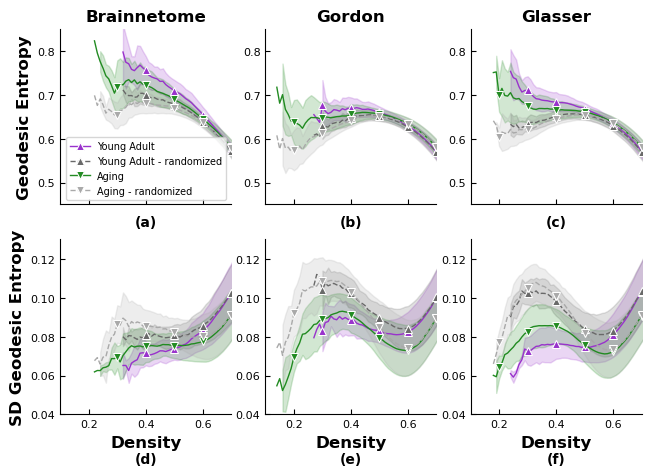

In [9]:
# Criação da figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(7.5, 5), sharex=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'entropy geo'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1, ax = axes[0,0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida, lw = 1, ax = axes[0,0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1, ax = axes[0,0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='v', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida, lw = 1, ax = axes[0,0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', ci='sd', marker='v', markevery=(8,10))


# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1, ax = axes[0,1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida, lw = 1, ax = axes[0,1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1, ax = axes[0,1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida, lw = 1, ax = axes[0,1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))


# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1, ax = axes[0,2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida, lw = 1, ax = axes[0,2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1, ax = axes[0,2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida, lw = 1, ax = axes[0,2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))

medida2 = 'std geo'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida2, lw = 1, ax = axes[1,0], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida2, lw = 1, ax = axes[1,0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed',legend=False, ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida2, lw = 1, ax = axes[1,0], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida2, lw = 1, ax = axes[1,0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(8,10))


# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida2, lw = 1, ax = axes[1,1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida2, lw = 1, ax = axes[1,1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida2, lw = 1, ax = axes[1,1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida2, lw = 1, ax = axes[1,1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))


# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida2, lw = 1, ax = axes[1,2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida2, lw = 1, ax = axes[1,2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida2, lw = 1, ax = axes[1,2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida2, lw = 1, ax = axes[1,2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))



"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""

for axis in axes:
    for ax in axis:
        ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Geodesic Entropy'
nome_eixoY2 = 'SD Geodesic Entropy'

axes[0,0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[0,1].set_title("Gordon", fontsize=12, weight='bold')
axes[0,2].set_title("Glasser", fontsize=12, weight='bold')

axes[0,0].legend(title=None, prop = {'size': 7}, loc='lower right')
axes[0,0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[0,1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,1].set_ylabel('', fontsize = 12, weight='bold')

axes[0,2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0,2].set_ylabel('', fontsize = 12, weight='bold')

axes[1,0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,0].set_ylabel(nome_eixoY2, fontsize = 12, weight='bold')

axes[1,1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,1].set_ylabel('', fontsize = 12, weight='bold')

axes[1,2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1,2].set_ylabel('', fontsize = 12, weight='bold')

axes[0,0].set_ylim(0.45, 0.85)
axes[0,1].set_ylim(0.45, 0.85)
axes[0,2].set_ylim(0.45, 0.85)

axes[1,0].set_ylim(0.04, 0.13)
axes[1,1].set_ylim(0.04, 0.13)
axes[1,2].set_ylim(0.04, 0.13)

axes[0,0].text(0.4, 0.4, '(a)', weight='bold', ha='center')
axes[0,1].text(0.4, 0.4, '(b)', weight='bold', ha='center')
axes[0,2].text(0.4, 0.4, '(c)', weight='bold', ha='center')
axes[1,0].text(0.4, 0.015, '(d)', weight='bold', ha='center')
axes[1,1].text(0.4, 0.015, '(e)', weight='bold', ha='center')
axes[1,2].text(0.4, 0.015, '(f)', weight='bold', ha='center')

plt.xlim(0.1, 0.7)
#plt.ylim(0.5, 0.85)

#plt.tight_layout()
plt.savefig("Images/Geo_entropy_groups.png", bbox_inches = 'tight', dpi = 450)

plt.show()

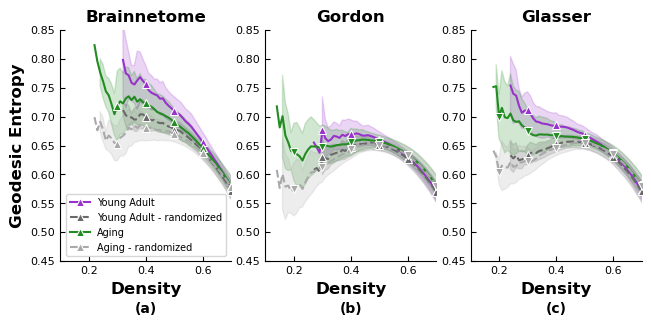

In [25]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3), sharex=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'entropy geo'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='^', markevery=(8,10))
sns.lineplot(data = df_random2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', ci='sd', marker='^', markevery=(8,10))


# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df_random1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(3,10))
sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))
sns.lineplot(data = df_random2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(6,10))


# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df_random1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'dimgrey',
             label = 'Young Adult - randomized', linestyle='dashed', legend=False, ci='sd', marker='^', markevery=(6,10))
sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))
sns.lineplot(data = df_random2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkgrey',
             label = 'Aging - randomized', linestyle='dashed', legend=False, ci='sd', marker='v', markevery=(2,10))



"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Geodesic Entropy'

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')

axes[0].legend(title=None, prop = {'size': 7}, loc='lower right')
axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel('', fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel('', fontsize = 12, weight='bold')


axes[0].set_ylim(0.45, 0.85)
axes[1].set_ylim(0.45, 0.85)
axes[2].set_ylim(0.45, 0.85)


axes[0].text(0.4, 0.36, '(a)', weight='bold', ha='center')
axes[1].text(0.4, 0.36, '(b)', weight='bold', ha='center')
axes[2].text(0.4, 0.36, '(c)', weight='bold', ha='center')


plt.xlim(0.1, 0.7)
#plt.ylim(0.5, 0.85)

#plt.tight_layout()
plt.savefig("Images/Geo_entropy_groups_test.png", bbox_inches = 'tight', dpi = 450)

plt.show()

#### Diferença

In [22]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'entropy geo'
diferenca1 = []
diferenca2 = []
diferenca3 = []
for i in densidade:
    i = round(i,2)
    #print(i)
    diferenca1.append(Aging_BN.loc[Aging_BN['density']==i][medida].mean() - YA_BN.loc[YA_BN['density']==i][medida].mean())
    diferenca2.append(Aging_gordon.loc[Aging_gordon['density']==i][medida].mean() - YA_gordon.loc[YA_gordon['density']==i][medida].mean())
    diferenca3.append(Aging_glasser.loc[Aging_glasser['density']==i][medida].mean() - YA_glasser.loc[YA_glasser['density']==i][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'BN': diferenca1, 'gordon':diferenca2, 'glasser':diferenca3})

In [31]:
df_diferenca.describe()

densidade         BN     gordon    glasser
count  91.000000  69.000000  74.000000  77.000000
mean    0.550000  -0.025081  -0.040866  -0.044420
std     0.264134   0.037653   0.021996   0.041905
min     0.100000  -0.087490  -0.073545  -0.103713
25%     0.325000  -0.057815  -0.060985  -0.082860
50%     0.550000  -0.018658  -0.040623  -0.044476
75%     0.775000   0.001150  -0.021960  -0.006855
max     1.000000   0.059229   0.002705   0.045458

#### Teste estatistico

In [121]:
measure = 'entropy geo'

In [122]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [125]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
7      0.39     746.0  3.561764e-03   3.272850  1.573354e-03
8      0.40    1035.0  1.801541e-03   3.194066  1.909509e-03
9      0.41    1291.0  3.506531e-03   2.882632  4.751608e-03
10     0.42    1693.0  1.881607e-03   2.927697  4.058618e-03
11     0.43    2536.0  6.572012e-05   3.771281  2.342076e-04
12     0.44    3745.0  1.745548e-06   4.925797  1.970252e-06
13     0.45    4658.0  2.976025e-06   4.551752  9.400213e-06
14     0.46    6787.0  2.700161e-08   5.619276  5.690097e-08
15     0.47    7886.0  2.421147e-07   5.264302  3.031307e-07
16     0.48   10379.0  1.162696e-07   5.305433  2.255634e-07
17     0.49   13870.0  4.872515e-09   6.053798  3.900976e-09
18     0.50   17007.0  2.179619e-10   6.545844  2.066135e-10
19     0.51   23244.0  2.479382e-13   7.735439  8.507748e-14
20     0.52   30555.0  3.077566e-16   8.402370  6.004802e-16
21     0.53   35697.0  7.828106e-17   8.389578  5.567928e-16
22     0.54   44882.0  7.484855e-18   8.924091  7.329112e-18
23     0.55   54311.0  1.765569e-18   9.045208  2.215652e-18
24     0.56   67546.0  1.129966e-20   9.925131  1.091156e-21
25     0.57   79633.0  1.200108e-19  10.278277  3.623873e-23
26     0.58   87891.0  3.034918e-19  10.180610  7.377973e-23
27     0.59   99375.0  1.644836e-18  10.029246  2.391173e-22
28     0.60  106652.0  1.499542e-14   8.801881  7.828219e-18
29     0.61  115077.0  1.307855e-11   8.122990  1.560634e-15
30     0.62  126854.0  8.015372e-11   7.680948  4.066834e-14
31     0.63  135959.0  5.254782e-08   6.714253  3.232487e-11
32     0.64  143334.0  1.300623e-04   4.665515  3.492185e-06
33     0.65  152842.0  3.113079e-03   3.734753  1.979429e-04
38     0.70  157081.0  7.168060e-07  -3.761241  1.770569e-04
39     0.71  158861.0  1.265457e-09  -4.768021  2.077575e-06
40     0.72  164014.0  4.149988e-12  -5.627885  2.233107e-08
41     0.73  162718.0  7.058727e-16  -6.715462  2.777174e-11
42     0.74  164389.0  4.036998e-20  -7.808189  1.152926e-14
43     0.75  168887.0  1.108742e-22  -8.391591  1.164148e-16
44     0.76  170351.0  5.062422e-26  -9.228245  9.685149e-20
45     0.77  171629.0  1.082551e-29 -10.110880  2.873495e-23
46     0.78  179930.0  1.874709e-31 -10.538125  4.302427e-25
47     0.79  180424.0  2.050247e-34 -11.021962  3.175697e-27
48     0.80  180788.0  3.934480e-38 -11.732452  1.679227e-30
49     0.81  181696.0  4.600593e-42 -12.533945  2.087144e-34
50     0.82  182023.0  1.484148e-46 -13.493104  2.324381e-39
51     0.83  182094.0  1.363372e-49 -14.106530  1.098256e-42
52     0.84  180882.0  5.134648e-55 -15.153425  1.245791e-48
53     0.85  180800.0  2.194879e-60 -16.138663  1.518380e-54
54     0.86  179509.0  7.459206e-65 -16.929175  1.716128e-59
55     0.87  178513.0  5.146593e-68 -17.407785  1.405977e-62
56     0.88  176783.0  5.236112e-72 -18.054264  7.654940e-67
57     0.89  177573.0  7.107234e-76 -18.546521  3.259746e-70
58     0.90  176790.0  2.672826e-78 -18.872734  1.825015e-72
59     0.91  176680.0  1.894104e-80 -18.995267  2.396619e-73
60     0.92  176671.0  1.070492e-81 -19.006977  1.880486e-73
61     0.93  176175.0  4.745928e-84 -19.165934  1.364665e-74
62     0.94  176341.0  1.045144e-85 -19.299926  1.463112e-75
63     0.95  176622.0  1.864868e-86 -19.317634  1.047303e-75
64     0.96  176000.0  1.958267e-87 -19.297028  1.421336e-75
65     0.97  175716.0  2.631792e-88 -19.200138  6.488080e-75
66     0.98  178566.0  4.764695e-86 -19.021442  1.119730e-73
67     0.99  185138.0  5.902655e-81 -18.515587  3.228833e-70

In [51]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [52]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
10     0.37    3213.0  9.920115e-04   3.358825  9.485557e-04
11     0.38    3781.0  3.940285e-03   3.333932  1.016105e-03
12     0.39    6140.0  3.633076e-05   4.842417  2.337928e-06
13     0.40    8027.0  3.609613e-04   3.632495  3.352197e-04
14     0.41   11020.0  4.021335e-05   4.149740  4.318471e-05
15     0.42   16000.0  8.942975e-07   4.999613  9.077717e-07
16     0.43   20955.0  6.197762e-07   5.060545  6.393133e-07
17     0.44   24313.0  3.807934e-05   3.793795  1.690671e-04
18     0.45   31939.0  1.126342e-05   4.552314  6.688907e-06
19     0.46   43019.0  1.122024e-07   5.928076  5.393755e-09
20     0.47   53044.0  6.594096e-08   6.183606  1.151049e-09
21     0.48   61483.0  1.952180e-06   5.704365  1.763362e-08
22     0.49   66576.0  1.454511e-04   4.839057  1.607216e-06
23     0.50   73742.0  5.030873e-03   3.751069  1.897878e-04
30     0.57  124084.0  5.135440e-04  -2.901267  3.792826e-03
31     0.58  125255.0  1.134377e-06  -4.321818  1.687450e-05
32     0.59  127663.0  3.062959e-09  -5.463613  5.732987e-08
33     0.60  130304.0  8.485926e-12  -6.290582  4.467703e-10
34     0.61  133494.0  2.303697e-15  -7.323957  4.397414e-13
35     0.62  137043.0  2.335242e-18  -8.178457  7.059396e-16
36     0.63  140792.0  2.229060e-21  -9.050315  5.202764e-19
37     0.64  143186.0  4.765449e-25  -9.913918  2.185347e-22
38     0.65  145553.0  1.495063e-27 -10.453450  1.233096e-24
39     0.66  153038.0  2.398916e-29 -10.690942  1.114648e-25
40     0.67  156482.0  6.483277e-32 -10.849121  2.180071e-26
41     0.68  157972.0  1.885975e-34 -11.159214  8.856457e-28
42     0.69  163545.0  3.830328e-37 -11.659581  4.223941e-30
43     0.70  165583.0  1.175488e-40 -12.298221  3.552421e-33
44     0.71  167791.0  6.461538e-42 -12.401750  1.064822e-33
45     0.72  171186.0  3.147491e-44 -12.775015  1.379249e-35
46     0.73  173289.0  4.803449e-47 -13.282124  3.240203e-38
47     0.74  175902.0  3.272809e-49 -13.590410  7.237220e-40
48     0.75  176799.0  1.128111e-52 -14.198826  3.430358e-43
49     0.76  177670.0  5.460107e-55 -14.510396  6.010083e-45
50     0.77  178689.0  3.409757e-58 -15.058758  4.183112e-48
51     0.78  180528.0  2.309482e-59 -15.150833  1.158519e-48
52     0.79  182359.0  1.066170e-61 -15.444692  2.025514e-50
53     0.80  185371.0  4.490419e-63 -15.486679  1.051238e-50
54     0.81  184550.0  1.197503e-65 -15.731582  3.473406e-52
55     0.82  183883.0  1.331888e-68 -16.176403  6.545748e-55
56     0.83  183871.0  2.499945e-70 -16.326409  7.462392e-56
57     0.84  184379.0  2.575702e-72 -16.504383  5.492109e-57
58     0.85  183763.0  3.041499e-74 -16.739767  1.763510e-58
59     0.86  183283.0  9.624366e-76 -16.916962  1.289835e-59
60     0.87  182552.0  9.309245e-78 -17.097054  8.745673e-61
61     0.88  181944.0  7.732745e-80 -17.271147  6.297732e-62
62     0.89  183828.0  2.158934e-79 -16.755113  1.202460e-58
63     0.90  183563.0  4.455763e-80 -16.746090  1.350221e-58
64     0.91  182875.0  9.916322e-82 -16.836528  3.490137e-59
65     0.92  182286.0  2.408028e-82 -16.776982  8.272608e-59
66     0.93  182117.0  1.782670e-82 -16.691542  2.863700e-58
67     0.94  182569.0  2.752591e-82 -16.639702  6.039933e-58
68     0.95  182185.0  4.595264e-83 -16.528218  2.978049e-57
69     0.96  182662.0  7.427125e-83 -16.366806  3.008205e-56
70     0.97  183915.0  6.843070e-82 -16.289390  9.087438e-56
71     0.98  185993.0  2.642476e-80 -16.254401  1.495869e-55
72     0.99  190512.0  6.578882e-77 -16.189096  3.784137e-55

In [126]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [127]:
teste_hip.loc[~(teste_hip['pvalueMWU'] <= 0.01) & ~(teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU  pvalueMWU  statTtest  pvalueTtest
0      0.24      34.0   0.303406   1.155887     0.263715
1      0.25      45.0   0.270751   1.272295     0.216552
2      0.26      77.0   0.139172   1.560362     0.129907
3      0.27     157.0   0.257433   1.335189     0.189364
4      0.28     194.0   0.234912   1.210123     0.232157
5      0.29     376.0   0.051093   2.069843     0.042640
32     0.56  137659.0   0.526860   1.512741     0.130650
33     0.57  140430.0   0.656359   0.389345     0.697098
34     0.58  147433.0   0.140052  -0.571046     0.568084
35     0.59  153023.0   0.035054  -1.194433     0.232555

In [55]:
measure = 'std geo'

In [56]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [57]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
10     0.42     761.0  6.524986e-03  -2.807420  5.795706e-03
11     0.43    1115.0  4.265915e-03  -2.976286  3.409163e-03
12     0.44    1737.0  6.446354e-03  -2.779693  6.050408e-03
14     0.46    3198.0  1.593482e-03  -3.537442  4.914403e-04
15     0.47    3570.0  1.113597e-04  -4.033115  7.315602e-05
16     0.48    5142.0  3.669977e-04  -3.466685  6.078540e-04
24     0.56   53607.0  2.017005e-03   3.641879  2.925877e-04
25     0.57   67955.0  6.397870e-06   5.142148  3.534379e-07
26     0.58   77619.0  1.353580e-07   5.988479  3.316695e-09
27     0.59   91073.0  1.215143e-09   6.835009  1.653921e-11
28     0.60  102424.0  1.351073e-10   7.129518  2.205247e-12
29     0.61  118326.0  1.790368e-14   8.442255  1.300585e-16
30     0.62  135196.0  6.540160e-18   9.405836  4.058826e-20
31     0.63  151854.0  4.315779e-20  10.061544  1.043607e-22
32     0.64  171937.0  1.068565e-23  11.008619  1.066839e-26
33     0.65  191752.0  2.386102e-27  11.813425  2.459209e-30
34     0.66  206622.0  3.199031e-29  12.252932  1.959996e-32
35     0.67  221369.0  3.032015e-32  12.967003  6.206787e-36
36     0.68  239947.0  1.525867e-33  13.180378  4.377174e-37
37     0.69  254735.0  2.137386e-35  13.569923  3.964192e-39
38     0.70  264289.0  5.875543e-35  13.504148  7.655219e-39
39     0.71  279464.0  1.431602e-36  13.981499  2.143122e-41
40     0.72  295428.0  6.603043e-36  13.864561  7.317155e-41
41     0.73  306806.0  8.958881e-37  14.210223  9.422204e-43
42     0.74  323349.0  1.912279e-37  14.514877  1.747075e-44
43     0.75  339008.0  7.073411e-38  14.632911  3.301986e-45
44     0.76  350343.0  2.881772e-37  14.513774  1.320546e-44
45     0.77  365157.0  8.017282e-39  14.842528  1.710799e-46
46     0.78  386685.0  3.562653e-40  15.079211  6.374971e-48
47     0.79  396274.0  2.455454e-40  15.130000  2.965244e-48
48     0.80  409727.0  7.240758e-42  15.402517  7.043086e-50
49     0.81  425674.0  5.154380e-44  15.754524  5.261093e-52
50     0.82  442008.0  4.615386e-46  16.042203  8.674596e-54
51     0.83  451055.0  2.717243e-46  16.005319  1.313587e-53
52     0.84  466350.0  6.901869e-48  16.200295  7.526193e-55
53     0.85  484222.0  9.045784e-50  16.424490  2.701885e-56
54     0.86  497148.0  1.147880e-51  16.707425  4.228241e-58
55     0.87  505308.0  1.663652e-52  16.774337  1.489792e-58
56     0.88  515572.0  3.451004e-54  17.022208  3.712124e-60
57     0.89  531623.0  3.156640e-56  17.348261  2.613809e-62
58     0.90  539663.0  5.247258e-58  17.612323  4.743051e-64
59     0.91  549148.0  2.693794e-60  17.949787  2.670393e-66
60     0.92  558301.0  4.590720e-64  18.500245  5.332301e-70
61     0.93  569339.0  1.325268e-67  18.976485  2.765169e-73
62     0.94  578828.0  2.002572e-70  19.373997  4.458725e-76
63     0.95  586424.0  9.976578e-74  19.831054  2.585740e-79
64     0.96  594433.0  1.547968e-78  20.472516  6.427927e-84
65     0.97  602292.0  5.811004e-83  20.922861  3.241684e-87
66     0.98  603956.0  2.976799e-84  20.935546  2.616774e-87
67     0.99  600562.0  1.245060e-81  19.973936  2.340403e-80

In [58]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [59]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
23     0.50   74671.0  1.747853e-03   4.661384  3.722910e-06
24     0.51   91555.0  7.486467e-05   5.695956  1.718570e-08
25     0.52  106402.0  1.262891e-06   6.675317  4.434061e-11
26     0.53  121722.0  1.366254e-08   7.651967  5.083224e-14
27     0.54  140464.0  1.094672e-11   8.690137  1.557760e-17
28     0.55  156931.0  2.245274e-14   9.415985  3.151343e-20
29     0.56  173267.0  1.064334e-17  10.233359  1.769923e-23
30     0.57  188277.0  1.442920e-20  10.908098  2.434670e-26
31     0.58  204650.0  1.972812e-24  11.643987  1.238607e-29
32     0.59  222053.0  3.907049e-29  12.630887  2.598333e-34
33     0.60  237869.0  1.152326e-32  13.187260  4.119203e-37
34     0.61  258222.0  3.732134e-37  13.873113  1.050340e-40
35     0.62  275559.0  5.685726e-40  14.251128  8.755856e-43
36     0.63  294694.0  4.946584e-44  14.878903  2.758436e-46
37     0.64  311630.0  1.488956e-46  15.213660  3.034149e-48
38     0.65  323193.0  4.419678e-47  15.174025  4.344385e-48
39     0.66  340649.0  2.901986e-46  14.896529  1.243920e-46
40     0.67  353352.0  7.837490e-46  14.877145  1.370142e-46
41     0.68  363331.0  3.834888e-46  14.989373  2.872400e-47
42     0.69  380842.0  5.081222e-46  14.964823  3.265196e-47
43     0.70  396145.0  1.920540e-47  15.389707  1.041134e-49
44     0.71  402201.0  2.954377e-46  15.250239  6.132172e-49
45     0.72  415522.0  1.338297e-46  15.385892  8.798695e-50
46     0.73  429115.0  7.821132e-48  15.664245  1.817296e-51
47     0.74  441483.0  1.075126e-48  15.804378  2.385259e-52
48     0.75  456200.0  5.911564e-51  16.248828  4.442307e-55
49     0.76  466063.0  4.663786e-52  16.475797  1.650294e-56
50     0.77  480191.0  4.226675e-54  16.816396  1.112488e-58
51     0.78  488987.0  2.894775e-55  16.995332  7.681956e-60
52     0.79  502234.0  3.954452e-57  17.315072  6.254604e-62
53     0.80  515094.0  7.114692e-59  17.552516  1.625234e-63
54     0.81  523677.0  8.926184e-61  17.815963  2.887866e-65
55     0.82  534985.0  1.466482e-63  18.258691  3.083982e-68
56     0.83  541919.0  7.574713e-65  18.486322  8.551490e-70
57     0.84  551549.0  1.269688e-66  18.751689  1.229389e-71
58     0.85  558058.0  4.509004e-68  18.956063  4.600389e-73
59     0.86  563480.0  1.853541e-69  19.148367  2.063173e-74
60     0.87  570448.0  3.081782e-71  19.379759  4.746665e-76
61     0.88  578304.0  2.687742e-73  19.627508  8.024728e-78
62     0.89  582745.0  2.194633e-74  19.709543  2.028770e-78
63     0.90  585602.0  2.268191e-75  19.756903  9.143294e-79
64     0.91  591773.0  2.620857e-77  19.952028  3.545651e-80
65     0.92  593988.0  1.376598e-78  19.974704  2.422370e-80
66     0.93  595214.0  1.626714e-79  19.918428  6.088772e-80
67     0.94  596415.0  4.888585e-80  19.840017  2.173075e-79
68     0.95  599389.0  3.967206e-81  19.779372  5.685430e-79
69     0.96  600027.0  3.195680e-81  19.523681  3.574530e-77
70     0.97  599595.0  6.829008e-81  19.171116  1.031649e-74
71     0.98  598209.0  7.723885e-80  18.658036  3.475721e-71
72     0.99  594931.0  2.246013e-77  17.648793  1.948215e-64

In [60]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [61]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
1      0.25       0.0  9.881423e-04  -2.988813  6.767739e-03
2      0.26       6.0  1.970443e-03  -3.288478  2.719319e-03
3      0.27      28.0  6.346576e-04  -3.148034  3.103095e-03
4      0.28      34.0  4.468165e-04  -2.970310  4.635126e-03
6      0.30     209.0  1.730980e-03  -3.029097  3.404388e-03
..      ...       ...           ...        ...           ...
71     0.95  594093.0  2.790768e-78  19.552249  2.332050e-77
72     0.96  596392.0  7.458977e-79  19.389758  3.125276e-76
73     0.97  596777.0  9.308759e-79  19.035178  9.001228e-74
74     0.98  594921.0  2.284902e-77  18.415767  1.528916e-69
75     0.99  591526.0  7.392451e-75  17.243725  8.406908e-62

[70 rows x 5 columns]

### Degree-distribution entropy

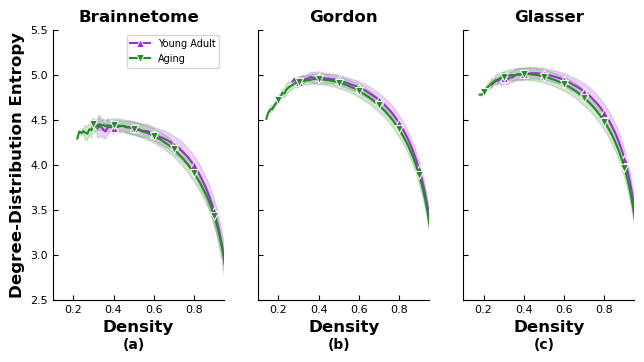

In [80]:
# Criação da figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 3.5), sharex=True, sharey=True)
df1 = [YA_BN, YA_gordon, YA_glasser]
df2 = [Aging_BN, Aging_gordon, Aging_glasser]
df_random1 = [random_YA_BN, random_YA_gordon, random_YA_glasser]
df_random2 = [random_Aging_BN, random_Aging_gordon, random_Aging_glasser]

medida = 'entropy degree'

# Graph 1
sns.lineplot(data = df1[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'darkorchid', label = 'Young Adult',
             ci='sd', marker='^', markevery=(8,10))

sns.lineplot(data = df2[0], x = 'density', y = medida, lw = 1.5, ax = axes[0], color = 'forestgreen', label = 'Aging',
             ci='sd', marker='v', markevery=(8,10))


# Graph 2
sns.lineplot(data = df1[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(3,10))

sns.lineplot(data = df2[1], x = 'density', y = medida, lw = 1.5, ax = axes[1], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(6,10))


# Graph 3
sns.lineplot(data = df1[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'darkorchid', label = 'Young Adult',
             legend=False, ci='sd', marker='^', markevery=(6,10))

sns.lineplot(data = df2[2], x = 'density', y = medida, lw = 1.5, ax = axes[2], color = 'forestgreen', label = 'Aging',
             legend=False, ci='sd', marker='v', markevery=(2,10))


"""
legend_elements = [Line2D([0], [0], color='royalblue', lw=2, label='Male'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Male - random', linestyle='dashed'),
                   Line2D([0], [0], color='firebrick', lw=2, label='Female - random', linestyle='dashed')
                   ]

axes[0,0].legend(title = 'Genders', handles = legend_elements)
"""

for ax in axes:
    ax.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
nome_eixoY = 'Degree-Distribution Entropy'

axes[0].set_title("Brainnetome", fontsize=12, weight='bold')
axes[1].set_title("Gordon", fontsize=12, weight='bold')
axes[2].set_title("Glasser", fontsize=12, weight='bold')
 
axes[0].legend(title=None, prop = {'size': 7})
axes[0].set_xlabel('Density', fontsize = 12, weight='bold')
axes[0].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[1].set_xlabel('Density', fontsize = 12, weight='bold')
axes[1].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[2].set_xlabel('Density', fontsize = 12, weight='bold')
axes[2].set_ylabel(nome_eixoY, fontsize = 12, weight='bold')

axes[0].text(0.5, 1.95, '(a)', weight='bold', ha='center')
axes[1].text(0.5, 1.95, '(b)', weight='bold', ha='center')
axes[2].text(0.5, 1.95, '(c)', weight='bold', ha='center')

plt.xlim(0.1, 0.95)
plt.ylim(2.5, 5.5)

#plt.tight_layout()
plt.savefig("Images/Degree_entropy_groups.png", bbox_inches = 'tight', dpi = 450)

plt.show()

#### Diferença entre gráficos

In [27]:
densidade = np.arange(0.10, 1.01, 0.01)
medida = 'entropy degree'
diferenca1 = []
diferenca2 = []
diferenca3 = []
for i in densidade:
    i = round(i,2)
    #print(i)
    diferenca1.append(Aging_BN.loc[Aging_BN['density']==i][medida].mean() - YA_BN.loc[YA_BN['density']==i][medida].mean())
    diferenca2.append(Aging_gordon.loc[Aging_gordon['density']==i][medida].mean() - YA_gordon.loc[YA_gordon['density']==i][medida].mean())
    diferenca3.append(Aging_glasser.loc[Aging_glasser['density']==i][medida].mean() - YA_glasser.loc[YA_glasser['density']==i][medida].mean())

df_diferenca = pd.DataFrame({'densidade': densidade, 'BN': diferenca1, 'gordon':diferenca2, 'glasser':diferenca3})

In [30]:
df_diferenca.describe()

densidade         BN     gordon    glasser
count  91.000000  69.000000  74.000000  77.000000
mean    0.550000  -0.025081  -0.040866  -0.044420
std     0.264134   0.037653   0.021996   0.041905
min     0.100000  -0.087490  -0.073545  -0.103713
25%     0.325000  -0.057815  -0.060985  -0.082860
50%     0.550000  -0.018658  -0.040623  -0.044476
75%     0.775000   0.001150  -0.021960  -0.006855
max     1.000000   0.059229   0.002705   0.045458

#### Teste estatistico

In [63]:
measure = 'entropy degree'

In [64]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_BN['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_BN.loc[(YA_BN['density'] == i), [measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_BN.loc[(YA_BN['density'] == i),[measure]], Aging_BN.loc[(Aging_BN['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [65]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
25     0.57   64560.0  1.431617e-03   3.144411  1.734987e-03
26     0.58   71569.0  1.970976e-03   3.250781  1.203490e-03
27     0.59   82747.5  7.530145e-04   3.255906  1.179112e-03
28     0.60   91419.5  1.774890e-03   3.384155  7.477440e-04
29     0.61  104055.0  1.957284e-04   4.103380  4.456053e-05
30     0.62  118904.5  7.541703e-06   4.914587  1.054575e-06
31     0.63  127692.5  4.674380e-04   4.022621  6.207965e-05
32     0.64  149279.0  3.107607e-07   5.674527  1.816007e-08
33     0.65  170146.5  1.049770e-10   7.322771  4.809447e-13
34     0.66  186752.0  1.347019e-13   8.114795  1.301228e-15
35     0.67  200870.0  8.501896e-16   8.814270  4.500720e-18
36     0.68  220317.5  4.498643e-18   9.298417  6.788801e-20
37     0.69  234189.5  2.314246e-19   9.788014  8.097157e-22
38     0.70  247187.5  1.003225e-21  10.329355  4.866959e-24
39     0.71  265973.5  5.736119e-26  11.396982  1.051287e-28
40     0.72  287047.5  1.847601e-29  12.479577  7.767782e-34
41     0.73  305802.0  5.591995e-36  13.712015  4.166445e-40
42     0.74  322588.5  7.355064e-37  13.973041  1.486910e-41
43     0.75  340186.0  9.164773e-39  14.226405  5.559535e-43
44     0.76  361101.5  1.888670e-45  15.651516  4.694222e-51
45     0.77  374894.5  4.029986e-46  15.741794  1.177671e-51
46     0.78  400450.5  2.171107e-50  16.444253  5.848994e-56
47     0.79  415112.5  2.398220e-54  16.892142  9.172261e-59
48     0.80  424647.5  1.015267e-52  16.425659  5.708576e-56
49     0.81  438635.5  2.373336e-53  16.658536  1.801415e-57
50     0.82  449499.5  2.499204e-51  15.988858  1.815072e-53
51     0.83  451251.5  2.002358e-46  15.070870  4.184759e-48
52     0.84  460876.5  2.723942e-44  14.090616  1.229296e-42
53     0.85  475249.0  5.584971e-44  13.861242  1.992659e-41
54     0.86  476528.5  7.530487e-39  12.954092  1.179479e-36
55     0.87  479964.5  4.868321e-37  12.122226  1.697899e-32
56     0.88  480257.5  2.997955e-33  11.091639  1.172858e-27
57     0.89  483662.0  6.269130e-29   9.131938  1.813727e-19
58     0.90  485982.0  1.044284e-27   8.127575  8.191746e-16
59     0.91  484742.0  1.040295e-24   6.994172  3.774224e-12
60     0.92  483100.0  1.167484e-22   6.063349  1.625825e-09
61     0.93  472088.0  1.331833e-16   3.991777  6.824054e-05

In [66]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_gordon['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_gordon.loc[(YA_gordon['density'] == i), [measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_gordon.loc[(YA_gordon['density'] == i),[measure]], Aging_gordon.loc[(Aging_gordon['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [67]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
15     0.42   14749.0  6.229194e-04   3.430811  6.732938e-04
18     0.45   29708.0  4.265679e-03   2.821407  4.973902e-03
19     0.46   39899.5  3.992623e-04   3.419772  6.728844e-04
20     0.47   50564.5  2.663530e-05   4.309786  1.906280e-05
21     0.48   59753.0  5.715142e-05   4.400510  1.259160e-05
22     0.49   66639.5  1.316355e-04   3.779955  1.702877e-04
23     0.50   79544.5  1.332163e-06   5.126906  3.760343e-07
24     0.51   91982.0  4.289365e-05   4.021674  6.320817e-05
25     0.52  109319.5  1.489002e-08   5.793731  9.672644e-09
26     0.53  123536.0  7.967777e-10   6.023866  2.478709e-09
27     0.54  137478.5  1.157072e-09   6.449505  1.781576e-10
28     0.55  150472.0  5.459807e-10   6.460982  1.624714e-10
29     0.56  164293.0  2.230399e-11   6.914173  8.226224e-12
30     0.57  178293.0  2.654503e-13   7.368954  3.436468e-13
31     0.58  188613.0  8.245395e-13   7.436051  2.081060e-13
32     0.59  204770.5  7.208279e-16   8.480158  6.931033e-17
33     0.60  220062.5  1.353421e-18   8.930816  1.614806e-18
34     0.61  233287.5  7.577520e-18   9.181610  1.801499e-19
35     0.62  253033.0  4.486164e-22  10.224620  1.295109e-23
36     0.63  274521.0  2.016857e-27  11.595283  1.264100e-29
37     0.64  288699.5  5.376974e-28  12.010145  1.355353e-31
38     0.65  298276.0  1.712426e-27  11.798501  1.256465e-30
39     0.66  319963.0  1.961959e-30  12.458271  7.899211e-34
40     0.67  337146.0  1.462107e-33  13.146245  2.618275e-37
41     0.68  348658.0  3.925957e-35  13.620083  8.491594e-40
42     0.69  369428.5  1.197527e-37  14.209161  5.143642e-43
43     0.70  387511.0  4.224623e-41  14.550081  6.063025e-45
44     0.71  398240.0  2.262300e-43  15.238374  7.177150e-49
45     0.72  414647.5  5.722278e-46  15.709577  1.119322e-51
46     0.73  430232.5  1.225976e-48  15.912393  6.122412e-53
47     0.74  447407.0  5.505361e-53  16.797390  2.177082e-58
48     0.75  455849.0  1.048571e-50  16.386908  6.386452e-56
49     0.76  474830.5  1.899862e-58  17.726656  2.098638e-64
50     0.77  479677.5  9.738894e-54  16.971766  1.179239e-59
51     0.78  495391.0  6.976463e-60  17.773338  7.964863e-65
52     0.79  507990.0  2.889960e-61  18.030611  1.416361e-66
53     0.80  513867.5  5.166341e-58  17.464425  6.028340e-63
54     0.81  520025.0  3.259174e-58  17.331133  4.027909e-62
55     0.82  527509.0  2.588367e-58  17.100365  1.101966e-60
56     0.83  534851.0  7.222268e-60  17.451113  5.806216e-63
57     0.84  541856.0  8.013658e-60  17.511302  2.167512e-63
58     0.85  537358.0  6.239500e-54  16.362056  4.017760e-56
59     0.86  539015.0  7.952757e-53  16.070996  2.400269e-54
60     0.87  541416.0  1.316923e-51  15.612025  1.380977e-51
61     0.88  542481.0  2.552092e-49  14.682014  3.688829e-46
62     0.89  544434.0  8.342594e-49  14.395190  1.539439e-44
63     0.90  547524.0  8.607485e-50  14.142168  3.966820e-43
64     0.91  540452.0  9.405705e-44  12.965779  8.062435e-37
65     0.92  537861.0  4.659885e-42  12.387608  7.010920e-34
66     0.93  542174.0  1.874135e-44  12.600826  5.948089e-35
67     0.94  541922.0  4.793712e-44  12.550006  1.072424e-34
68     0.95  537413.0  8.541293e-41  11.430819  2.900168e-29
69     0.96  538380.0  4.611417e-41  10.992715  2.963915e-27
70     0.97  536292.0  6.037186e-40  10.890055  8.572576e-27
71     0.98  537686.0  1.088589e-40  11.102071  9.472094e-28
72     0.99  532349.0  7.027261e-38  10.485468  5.181999e-25

In [68]:
s1 = []
p1 = []
s2 = []
p2 = []

minimo = YA_glasser['density'].min()

var_density = np.arange(minimo,1.01,0.01).round(2)

for i in var_density:
    statt1, pvalue1 = stats.mannwhitneyu(YA_glasser.loc[(YA_glasser['density'] == i), [measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    statt2,pvalue2 = stats.ttest_ind(YA_glasser.loc[(YA_glasser['density'] == i),[measure]], Aging_glasser.loc[(Aging_glasser['density'] == i),[measure]])
    s1.append(statt1[0])
    p1.append(pvalue1[0])
    s2.append(statt2[0])
    p2.append(pvalue2[0])
    
data = np.array(list(zip(var_density, s1,p1,s2,p2)))
teste_hip = pd.DataFrame(data, columns=['density','statMWU','pvalueMWU','statTtest','pvalueTtest'])

In [69]:
teste_hip.loc[(teste_hip['pvalueMWU'] <= 0.01) & (teste_hip['pvalueTtest'] <= 0.01)]

density   statMWU     pvalueMWU  statTtest   pvalueTtest
8      0.32     643.0  4.975097e-03  -3.460275  7.812453e-04
21     0.45   41681.5  7.811380e-03   2.804599  5.213469e-03
22     0.46   52862.0  9.549474e-04   3.248462  1.223298e-03
23     0.47   60302.0  1.074744e-04   3.876851  1.165157e-04
24     0.48   69981.0  1.137521e-05   4.409754  1.198609e-05
25     0.49   82660.0  2.144142e-06   4.737132  2.592138e-06
26     0.50   95961.5  5.912458e-08   5.565233  3.571665e-08
27     0.51  110683.5  4.847701e-09   6.192884  9.170779e-10
28     0.52  121048.0  2.980248e-09   5.918925  4.614666e-09
29     0.53  136196.0  5.329512e-12   7.126786  2.053873e-12
30     0.54  147975.5  1.215795e-12   7.658577  4.535885e-14
31     0.55  158101.5  4.600655e-13   7.581848  7.749566e-14
32     0.56  172433.0  5.067108e-15   8.360260  1.991465e-16
33     0.57  185284.0  3.208032e-17   9.063497  5.884033e-19
34     0.58  204969.0  2.908043e-20   9.860700  4.774189e-22
35     0.59  215489.0  2.172343e-19   9.826862  6.157459e-22
36     0.60  233039.0  1.465547e-21  10.429910  1.982892e-24
37     0.61  244993.5  1.784372e-20  10.247702  1.065752e-23
38     0.62  263955.5  1.893401e-24  11.178200  1.006987e-27
39     0.63  281613.5  2.307809e-25  11.330592  1.909490e-28
40     0.64  294459.0  6.987969e-27  11.491318  3.357164e-29
41     0.65  306857.0  2.810531e-30  12.539434  3.450009e-34
42     0.66  322268.5  6.354430e-31  12.658816  8.040291e-35
43     0.67  337705.0  1.419171e-32  13.059644  7.121744e-37
44     0.68  358019.5  1.649786e-38  14.400634  5.173470e-44
45     0.69  372195.5  3.609008e-42  14.898696  7.985490e-47
46     0.70  382835.0  3.191570e-43  15.354682  1.805470e-49
47     0.71  398022.5  7.161339e-46  15.717795  1.205888e-51
48     0.72  416579.0  1.944601e-51  16.804769  2.884718e-58
49     0.73  429876.5  1.498894e-52  16.984143  1.880801e-59
50     0.74  446819.5  1.866622e-56  17.720426  3.403263e-64
51     0.75  450003.0  3.595240e-55  17.456871  1.537506e-62
52     0.76  469262.0  1.230405e-59  18.296397  4.449147e-68
53     0.77  486807.0  8.203480e-67  19.586331  7.456646e-77
54     0.78  499015.0  8.356389e-67  19.482675  3.019359e-76
55     0.79  508316.5  4.465435e-69  19.762396  3.042093e-78
56     0.80  521999.0  3.953850e-73  20.411636  6.834027e-83
57     0.81  529202.0  2.867768e-70  19.989578  5.289071e-80
58     0.82  540945.0  1.536784e-75  20.716924  3.102149e-85
59     0.83  548074.0  3.409186e-75  20.614757  1.420139e-84
60     0.84  553799.0  3.211570e-76  20.771720  9.539399e-86
61     0.85  555414.0  2.342905e-75  20.674445  4.549163e-85
62     0.86  559691.0  3.616945e-76  20.733363  1.593558e-85
63     0.87  565635.0  1.949587e-74  20.448178  1.542167e-83
64     0.88  570412.5  7.962108e-75  20.352485  6.900220e-83
65     0.89  575735.0  2.521566e-77  20.606746  9.737315e-85
66     0.90  574881.0  2.305135e-74  20.093413  4.441952e-81
67     0.91  574487.0  1.868457e-71  19.425925  2.128286e-76
68     0.92  572105.0  1.966558e-67  18.553517  2.036136e-70
69     0.93  569340.0  4.139353e-63  17.317891  2.968583e-62
70     0.94  569692.0  2.418585e-62  16.716730  2.016862e-58
71     0.95  567576.0  1.252117e-59  15.838612  5.342529e-53
72     0.96  561352.0  1.046224e-54  14.600379  1.013567e-45
73     0.97  556792.0  1.333013e-51  13.434167  2.745995e-39
74     0.98  550142.0  1.186217e-47  12.149457  1.049926e-32
75     0.99  530094.0  1.006466e-36   9.087591  2.588302e-19

# Von Neumann

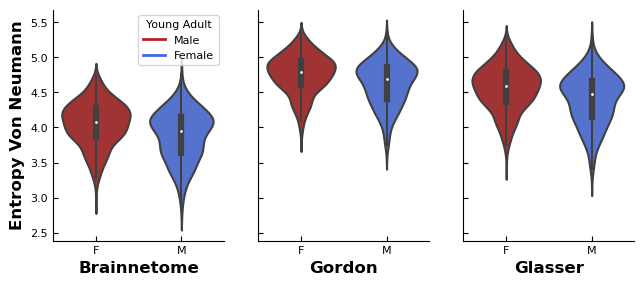

In [70]:
fig, ax = plt.subplots(1,3, figsize=(7.5,3), sharey=True, sharex=True)

sns.violinplot(data=VN_YA_BN, x='Gender', y='entropy Von Neumann', ax=ax[0], palette=['firebrick', 'royalblue'], order=['F','M'])

legend_elements = [Line2D([0], [0], color='firebrick', lw=2, label='Male'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Female')
                   ]

ax[0].legend(title = 'Young Adult', handles = legend_elements, prop = {'size': 8}, title_fontsize=8)

sns.violinplot(data=VN_YA_gordon, x='Gender', y='entropy Von Neumann', ax=ax[1], palette=['firebrick', 'royalblue'], order=['F','M'])

sns.violinplot(data=VN_YA_glasser, x='Gender', y='entropy Von Neumann', ax=ax[2], palette=['firebrick', 'royalblue'], order=['F','M'])


ax[0].set_ylabel('Entropy Von Neumann', weight='bold', fontsize=12)
ax[1].set(ylabel='')
ax[2].set(ylabel='')

ax[0].set_xlabel('Brainnetome', weight='bold', fontsize=12)
ax[1].set_xlabel('Gordon', weight='bold', fontsize=12)
ax[2].set_xlabel('Glasser', weight='bold', fontsize=12)

for a in ax:
    a.tick_params(labeltop=False, bottom=True, direction="in", labelsize=8)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)


#plt.tight_layout()
plt.savefig("Images/Von_neumann_gender_YA.png", bbox_inches = 'tight', dpi = 450)
plt.show()

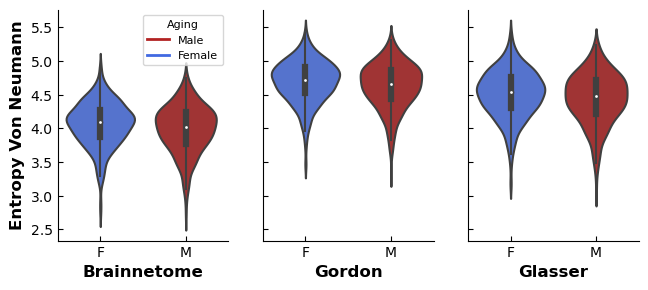

In [71]:
fig, ax = plt.subplots(1,3, figsize=(7.5,3), sharey=True, sharex=True)

sns.violinplot(data=VN_aging_BN, x='Gender', y='entropy Von Neumann', ax=ax[0], palette=['royalblue', 'firebrick'])

legend_elements = [Line2D([0], [0], color='firebrick', lw=2, label='Male'),
                   Line2D([0], [0], color='royalblue', lw=2, label='Female')
                   ]

ax[0].legend(title = 'Aging', handles = legend_elements, prop = {'size': 8}, title_fontsize=8)

sns.violinplot(data=VN_aging_gordon, x='Gender', y='entropy Von Neumann', ax=ax[1], palette=['royalblue', 'firebrick'])

sns.violinplot(data=VN_aging_glasser, x='Gender', y='entropy Von Neumann', ax=ax[2], palette=['royalblue', 'firebrick'])


for a in ax:
    a.tick_params(labeltop=False, bottom=True, direction="in")
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    
ax[0].set_ylabel('Entropy Von Neumann', weight='bold', fontsize=12)
ax[1].set(ylabel='')
ax[2].set(ylabel='')

ax[0].set_xlabel('Brainnetome', weight='bold', fontsize=12)
ax[1].set_xlabel('Gordon', weight='bold', fontsize=12)
ax[2].set_xlabel('Glasser', weight='bold', fontsize=12)

plt.savefig("Images/Von_neumann_gender_aging.png", bbox_inches = 'tight', dpi = 450)
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

F vs. M: Mann-Whitney-Wilcoxon test two-sided, P_val:5.502e-13 U_stat=1.829e+05


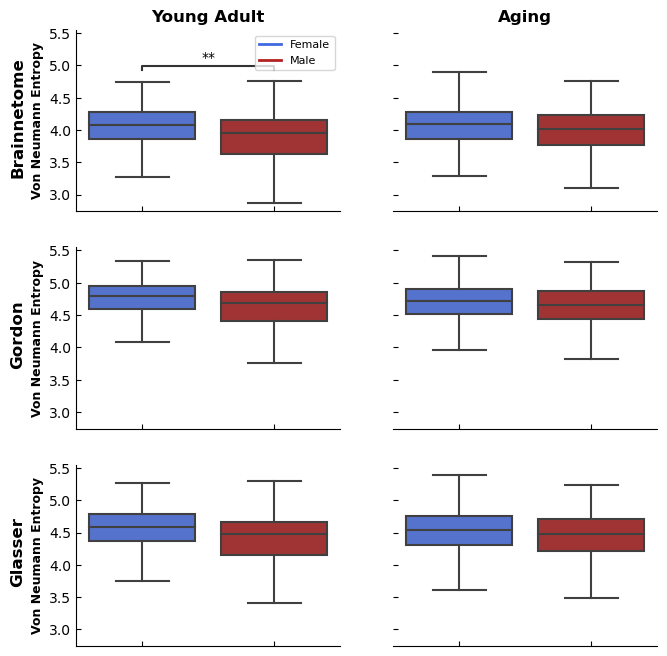

In [72]:
fig, axes = plt.subplots(3,2, figsize=(7.5,8), sharey=True, sharex=True)

sns.boxplot(data=VN_YA_BN, x='Gender', y='entropy Von Neumann', ax=axes[0,0], palette=['royalblue', 'firebrick'], 
            order=['F','M'], showfliers=False)
sns.boxplot(data=VN_YA_gordon, x='Gender', y='entropy Von Neumann', ax=axes[1,0], palette=['royalblue', 'firebrick'],
            order=['F','M'], showfliers=False)
sns.boxplot(data=VN_YA_glasser, x='Gender', y='entropy Von Neumann', ax=axes[2,0], palette=['royalblue', 'firebrick'], 
            order=['F','M'], showfliers=False)

sns.boxplot(data=VN_aging_BN, x='Gender', y='entropy Von Neumann', ax=axes[0,1], palette=['royalblue', 'firebrick'],
               order=['F','M'], showfliers=False)
sns.boxplot(data=VN_aging_gordon, x='Gender', y='entropy Von Neumann', ax=axes[1,1], palette=['royalblue', 'firebrick'],
               order=['F','M'], showfliers=False)
sns.boxplot(data=VN_aging_glasser, x='Gender', y='entropy Von Neumann', ax=axes[2,1], palette=['royalblue', 'firebrick'],
               order=['F','M'], showfliers=False)


legend_elements = [
                    Line2D([0], [0], color='royalblue', lw=2, label='Female'),
                    Line2D([0], [0], color='firebrick', lw=2, label='Male')
                   ]

axes[0,0].legend(title = '', handles = legend_elements, prop = {'size': 8}, title_fontsize=8, loc='upper right')

for ax in axes:
    for a in ax:
        a.tick_params(labeltop=False, bottom=True, direction="in", labelbottom=False)
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.set_xlabel('')

axes[0,0].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)
axes[1,0].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)
axes[2,0].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)

axes[0,0].text(-1, 4.2, 'Brainnetome', weight='bold', fontsize=12, va='center', rotation='vertical')
axes[1,0].text(-1, 4.2, 'Gordon', weight='bold', fontsize=12, va='center', rotation='vertical')
axes[2,0].text(-1, 4.2, 'Glasser', weight='bold', fontsize=12, va='center', rotation='vertical')

axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[2,1].set_ylabel('')

axes[0,0].set_title('Young Adult', weight='bold', fontsize=12)
axes[0,1].set_title('Aging', weight='bold', fontsize=12)

axes[0,1].spines['left'].set_visible(False)
axes[1,1].spines['left'].set_visible(False)
axes[2,1].spines['left'].set_visible(False)

pair = [('F','M')]
annotator = Annotator(axes[0,0], pair, data=VN_YA_BN, x='Gender', y='entropy Von Neumann', order=['F','M'])
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate() 

plt.savefig("Images/Von_neumann_gender_all.png", bbox_inches = 'tight', dpi = 450)
plt.show()

In [ ]:
adjustments = -0.15

dados = [VN_BN, VN_gordon, VN_glasser]

for a, data in zip(ax,dados):
    for i, group in enumerate(['F - Young Adult', 'M - Young Adult', 'F - Aging', 'M - Aging']):
        
        group_data = data[data['GenderGroup'] == group]
        mean_value = group_data.mean()
        std_value = group_data.std()
        
        formatted_text = f"{mean_value:.2f}({std_value*10:.0f})"
        
        position = mean_value - std_value + adjustments
        
        a.text(i, position, formatted_text, 
                ha='center', va='top', fontsize=8, color='black')

In [20]:
VN_BN

codes  entropy Von Neumann Release Acquisition Gender    Age  \
0        100206             4.029928    S900         Q11      M  26-30   
1        100307             4.444548      Q1         Q01      F  26-30   
2        100408             3.362056      Q3         Q03      M  31-35   
3        100610             3.922687    S900         Q08      M  26-30   
4        101006             4.285778    S500         Q06      F  31-35   
..          ...                  ...     ...         ...    ...    ...   
719  HCA9947411             3.569354     NaN         NaN      M     38   
720  HCA9953406             4.146768     NaN         NaN      F     47   
721  HCA9956008             3.805764     NaN         NaN      F     41   
722  HCA9986825             3.999974     NaN         NaN      F     86   
723  HCA9992517             4.169903     NaN         NaN      F     54   

    3T_Full_MR_Compl T1_Count T2_Count  3T_RS-fMRI_Count  ...  tlbx_motor01  \
0               True        1        1               4.0  ...           NaN   
1               True        1        1               4.0  ...           NaN   
2               True        1        1               4.0  ...           NaN   
3               True        2        1               4.0  ...           NaN   
4               True        2        2               4.0  ...           NaN   
..               ...      ...      ...               ...  ...           ...   
719              NaN        1        1               NaN  ...             1   
720              NaN        1        1               NaN  ...             1   
721              NaN        1        1               NaN  ...             1   
722              NaN        1        1               NaN  ...             1   
723              NaN        1        1               NaN  ...             1   

    tlbx_perhost01  tlbx_rej01  tlbx_sensation01  tlbx_wellbeing01  tpvt01  \
0              NaN         NaN               NaN               NaN     NaN   
1              NaN         NaN               NaN               NaN     NaN   
2              NaN         NaN               NaN               NaN     NaN   
3              NaN         NaN               NaN               NaN     NaN   
4              NaN         NaN               NaN               NaN     NaN   
..             ...         ...               ...               ...     ...   
719              1           1                 1                 1       1   
720              1           1                 1                 1       1   
721              1           1                 1                 1       1   
722              1           1                 1                 1       1   
723              1           1                 1                 1       1   

     trail_ca01  vitals01      GenderGroup        atlas  
0           NaN       NaN  M - Young Adult  Brainnetome  
1           NaN       NaN  F - Young Adult  Brainnetome  
2           NaN       NaN  M - Young Adult  Brainnetome  
3           NaN       NaN  M - Young Adult  Brainnetome  
4           NaN       NaN  F - Young Adult  Brainnetome  
..          ...       ...              ...          ...  
719           1         1        M - Aging  Brainnetome  
720           1         1        F - Aging  Brainnetome  
721           1         1        F - Aging  Brainnetome  
722           1         1        F - Aging  Brainnetome  
723           1         1        F - Aging  Brainnetome  

[1808 rows x 381 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

F - Young Adult vs. M - Young Adult: Mann-Whitney-Wilcoxon test two-sided, P_val:5.502e-13 U_stat=1.829e+05
F - Aging vs. M - Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:9.111e-03 U_stat=7.184e+04
F - Young Adult vs. F - Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:5.734e-01 U_stat=1.167e+05
M - Young Adult vs. M - Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:1.162e-04 U_stat=6.639e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

F - Young Adult vs. M - Young Adult: Mann-Whitney-Wilcoxon test two-sided, P_val:5.309e-12 U_stat=1.813e+05
F - Aging vs. M - Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:1.179e-02 U_stat=7.159e+04
F - Young Adult vs. F - Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:5.183e-04 U_stat=1.346e+05
M - Young Adult vs. M - Aging: Mann-Whitne

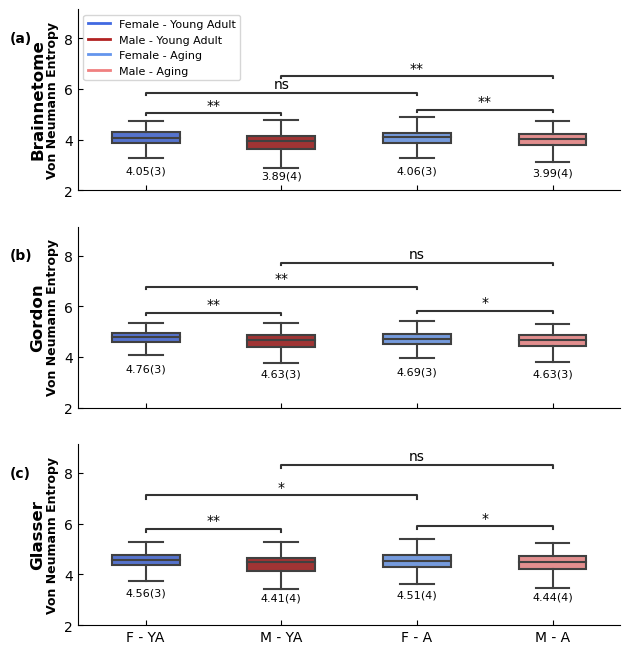

In [45]:
fig, ax = plt.subplots(3,1, figsize=(7,8), sharex=True, sharey=True)

custom_palette = {'Young Adult': {'M': 'firebrick', 'F': 'royalblue'},
                  'Aging': {'M': 'lightcoral', 'F': 'cornflowerblue'}}


sns.boxplot(data=VN_BN, x='GenderGroup', y='entropy Von Neumann', ax=ax[0], palette=['royalblue', 'firebrick', 'cornflowerblue','lightcoral'], 
            showfliers=False, order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'], width=0.5)
sns.boxplot(data=VN_gordon, x='GenderGroup', y='entropy Von Neumann', ax=ax[1], palette=['royalblue', 'firebrick', 'cornflowerblue','lightcoral'],
            showfliers=False, order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'], width=0.5)
sns.boxplot(data=VN_glasser, x='GenderGroup', y='entropy Von Neumann', ax=ax[2], palette=['royalblue', 'firebrick', 'cornflowerblue','lightcoral'], 
            showfliers=False, order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'], width=0.5)


legend_elements = [
                    Line2D([0], [0], color='royalblue', lw=2, label='Female - Young Adult'),
                    Line2D([0], [0], color='firebrick', lw=2, label='Male - Young Adult'),
                    Line2D([0], [0], color='cornflowerblue', lw=2, label='Female - Aging'),
                    Line2D([0], [0], color='lightcoral', lw=2, label='Male - Aging')
                   ]

ax[0].legend(title = '', handles = legend_elements, prop = {'size': 8}, title_fontsize=8, loc='upper left')

plt.ylim(2,5.5)
#ax[0].set_ylim(2.8, 5.5)
#ax[1].set_ylim(3.5, 5.5)
#ax[2].set_ylim(3.2, 5.5)

for a in ax:
    a.tick_params(labeltop=False, bottom=True, direction="in", labelbottom=True)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.set_xlabel('')
    a.set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)
    
ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)
plt.xticks(ticks=[0,1,2,3], labels=['F - YA','M - YA','F - A', 'M - A'])
#ax[0].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)
#ax[1].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)
#ax[2].set_ylabel('Von Neumann Entropy', weight='bold', fontsize=9)

ax[0].text(-0.85, 5.6, 'Brainnetome', weight='bold', fontsize=12, va='center', rotation='vertical')
ax[1].text(-0.85, 5.6, 'Gordon', weight='bold', fontsize=12, va='center', rotation='vertical')
ax[2].text(-0.85, 5.6, 'Glasser', weight='bold', fontsize=12, va='center', rotation='vertical')


ax[0].text(-1, 8, '(a)', fontsize=10, va='center', weight='bold')
ax[1].text(-1, 8, '(b)', fontsize=10, va='center', weight='bold')
ax[2].text(-1, 8, '(c)', fontsize=10, va='center', weight='bold')

adjustments = -0.75

dados = [VN_BN, VN_gordon, VN_glasser]

for a, data in zip(ax,dados):
    for i, group in enumerate(['F - Young Adult', 'M - Young Adult', 'F - Aging', 'M - Aging']):
        
        group_data = data[data['GenderGroup'] == group]['entropy Von Neumann']
        mean_value = group_data.mean()
        std_value = group_data.std()
        
        formatted_text = f"{mean_value:.2f}({std_value*10:.0f})"
        
        position = mean_value - std_value + adjustments
        
        a.text(i, position, formatted_text, 
                ha='center', va='top', fontsize=8, color='black')

"""
ticks = ax[0].get_xticks().tolist()
ticks[0] = 'YA - F'
ticks[1] = 'YA - M'
ticks[2] = 'A - F'
ticks[3] = 'A - M'

ax[0].set_xticklabels(ticks)
"""

#ax[0].set_title('Young Adult', weight='bold', fontsize=12)
#ax[0].set_title('Aging', weight='bold', fontsize=12)

pair = [('F - Young Adult','M - Young Adult'),('F - Aging', 'M - Aging'),('F - Young Adult','F - Aging'),('M - Young Adult','M - Aging')]
annotator = Annotator(ax[0], pair, data=VN_BN, x='GenderGroup', y='entropy Von Neumann',
                      order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'])
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate() 

annotator = Annotator(ax[1], pair, data=VN_gordon, x='GenderGroup', y='entropy Von Neumann',
                      order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'])
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate() 

annotator = Annotator(ax[2], pair, data=VN_glasser, x='GenderGroup', y='entropy Von Neumann',
                      order=['F - Young Adult','M - Young Adult', 'F - Aging', 'M - Aging'])
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate() 

plt.savefig("Images/Von_neumann_gender_all.png", bbox_inches = 'tight', dpi = 450)
plt.show()

In [74]:
Von_neumann = [VN_YA_BN, VN_YA_gordon, VN_YA_glasser, VN_aging_BN, VN_aging_gordon, VN_aging_glasser]

for df in Von_neumann:
    a,b = stats.mannwhitneyu(df[df['Gender']=='F']['entropy Von Neumann'], df[df['Gender']=='M']['entropy Von Neumann'])

    print(a)
    print(b)

182912.0
5.50202844571267e-13
181293.0
5.309068912412877e-12
180619.0
1.3255083621948034e-11
71838.0
0.00911087799047494
71588.0
0.011790522567385147
70520.0
0.032683164417919436


In [75]:
VN_YA = [VN_YA_BN, VN_YA_gordon, VN_YA_glasser]
VN_aging = [VN_aging_BN, VN_aging_gordon, VN_aging_glasser]

for i in range(len(VN_YA)):
    a,b = stats.mannwhitneyu(VN_YA[i][VN_YA[i]['Gender']=='F']['entropy Von Neumann'], VN_aging[i][VN_aging[i]['Gender']=='F']['entropy Von Neumann'])

    print(a)
    print(b)

116659.0
0.5734282846944694
134584.0
0.0005182843905932559
129103.0
0.025252254480329094


In [76]:
VN_YA = [VN_YA_BN, VN_YA_gordon, VN_YA_glasser]
VN_aging = [VN_aging_BN, VN_aging_gordon, VN_aging_glasser]

for i in range(len(VN_YA)):
    a,b = stats.mannwhitneyu(VN_YA[i][VN_YA[i]['Gender']=='M']['entropy Von Neumann'], VN_aging[i][VN_aging[i]['Gender']=='M']['entropy Von Neumann'])

    print(a)
    print(b)

66388.0
0.00011620301015454557
78545.0
0.8841932791736177
74216.0
0.14260344410776638


In [35]:
print("Entropia Male Aging Brainnetome: ", VN_aging_BN[VN_aging_BN['Gender']=='M']['entropy Von Neumann'].mean())
print("Entropia Male YA Brainnetome:    ", VN_YA_BN[VN_YA_BN['Gender']=='M']['entropy Von Neumann'].mean())
print("Entropia Female Aging Gordon: ", VN_aging_gordon[VN_aging_gordon['Gender']=='F']['entropy Von Neumann'].mean())
print("Entropia Female YA Gordon:    ", VN_YA_gordon[VN_YA_gordon['Gender']=='F']['entropy Von Neumann'].mean())
print("Entropia Female Aging Glasser: ", VN_aging_glasser[VN_aging_glasser['Gender']=='F']['entropy Von Neumann'].mean())
print("Entropia Female YA Glasser:    ", VN_YA_glasser[VN_YA_glasser['Gender']=='F']['entropy Von Neumann'].mean())

Entropia Male Aging Brainnetome:  3.9904803882794972
Entropia Male YA Brainnetome:     3.889697099245853
Entropia Female Aging Gordon:  4.693809412476162
Entropia Female YA Gordon:     4.761902659620483
Entropia Female Aging Glasser:  4.508730395435819
Entropia Female YA Glasser:     4.559312328617002


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

Young Adult vs. Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:1.912e-03 U_stat=3.586e+05
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

Young Adult vs. Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:2.138e-02 U_stat=4.174e+05
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

Young Adult vs. Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:5.982e-01 U_stat=3.981e+05


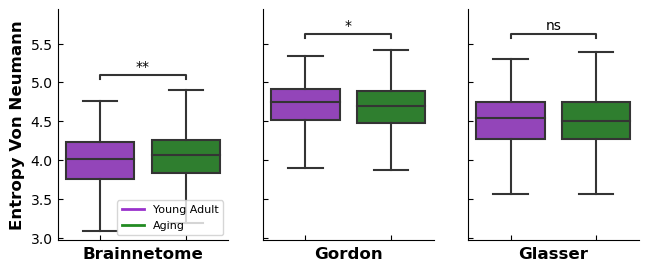

In [134]:
fig, ax = plt.subplots(1,3, figsize=(7.5,3), sharey=True, sharex=True)

sns.boxplot(data=VN_BN, x='group', y='entropy Von Neumann', ax=ax[0], palette=['darkorchid', 'forestgreen'], showfliers=False)

legend_elements = [Line2D([0], [0], color='darkorchid', lw=2, label='Young Adult'),
                   Line2D([0], [0], color='forestgreen', lw=2, label='Aging')
                   ]

ax[0].legend(title = '', handles = legend_elements, prop = {'size': 8}, title_fontsize=8, loc='lower right')

sns.boxplot(data=VN_gordon, x='group', y='entropy Von Neumann', ax=ax[1], palette=['darkorchid', 'forestgreen'], showfliers=False)

sns.boxplot(data=VN_glasser, x='group', y='entropy Von Neumann', ax=ax[2], palette=['darkorchid', 'forestgreen'], showfliers=False)

for a in ax:
    a.tick_params(labeltop=False, bottom=True, direction="in", labelbottom=False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

ax[0].set_ylabel('Entropy Von Neumann', weight='bold', fontsize=12)
ax[1].set(ylabel='')
ax[2].set(ylabel='')

ax[0].set_xlabel('Brainnetome', weight='bold', fontsize=12)
ax[1].set_xlabel('Gordon', weight='bold', fontsize=12)
ax[2].set_xlabel('Glasser', weight='bold', fontsize=12)

pair = [('Young Adult','Aging')]
annotator = Annotator(ax[0], pair, data=VN_BN, x='group', y='entropy Von Neumann')
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()

annotator = Annotator(ax[1], pair, data=VN_gordon, x='group', y='entropy Von Neumann')
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()

annotator = Annotator(ax[2], pair, data=VN_glasser, x='group', y='entropy Von Neumann')
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()
plt.savefig("Images/Von_neumann_groups.png", bbox_inches = 'tight', dpi = 450)
plt.show()

In [35]:
Von_neumann['group']

0      Young Adult
1      Young Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
719          Aging
720          Aging
721          Aging
722          Aging
723          Aging
Name: group, Length: 5424, dtype: object

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: p <= 1.00e-02

Gordon_Young Adult vs. Gordon_Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:2.138e-02 U_stat=4.174e+05
Brainnetome_Young Adult vs. Brainnetome_Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:1.912e-03 U_stat=3.586e+05
Glasser_Young Adult vs. Glasser_Aging: Mann-Whitney-Wilcoxon test two-sided, P_val:5.982e-01 U_stat=3.981e+05


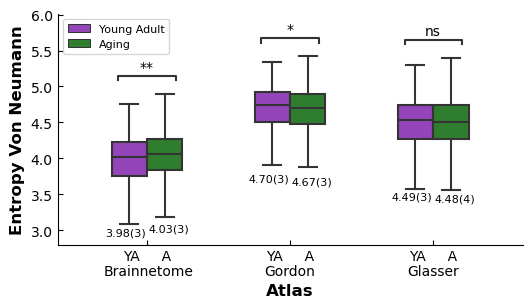

In [43]:
_, ax = plt.subplots(figsize=(6,3))

sns.boxplot(ax=ax, data=Von_neumann, x='atlas', y='entropy Von Neumann', hue='group', palette=['darkorchid', 'forestgreen'],
            showfliers=False, order=['Brainnetome','Gordon','Glasser'], width=0.5)

ax.legend(title = '', prop = {'size': 8}, title_fontsize=8, loc='upper left')

ax.tick_params(labeltop=False, bottom=True, direction="in", labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Entropy Von Neumann', weight='bold', fontsize=12)
ax.set_xlabel('Atlas', weight='bold', fontsize=12, labelpad=14)
ticks = ax.get_xticks().tolist()
ticks[0] = 'YA     A'
ticks[1] = 'YA     A'
ticks[2] = 'YA     A'
plt.ylim(2.8,6)
ax.set_xticklabels(ticks)

ax.text(-0.3, 2.43, 'Brainnetome', fontsize=10, va='center')
ax.text(0.82, 2.43, 'Gordon', fontsize=10, va='center')
ax.text(1.82, 2.43, 'Glasser', fontsize=10, va='center')

adjustments = -0.6

for age in ['Young Adult','Aging']:
    for i, group in enumerate(['Brainnetome','Gordon','Glasser']):
        if age =='Young Adult':
            i-=0.15
        elif age == 'Aging':
            i+=0.15
        
        group_data = Von_neumann[(Von_neumann['atlas'] == group) & (Von_neumann['group'] == age)]['entropy Von Neumann']
        mean_value = group_data.mean()
        std_value = group_data.std()
        
        formatted_text = f"{mean_value:.2f}({std_value*10:.0f})"
        
        position = mean_value - std_value + adjustments
        
        ax.text(i, position, formatted_text, 
                ha='center', va='top', fontsize=8, color='black')


pair = [(('Brainnetome','Aging'),('Brainnetome','Young Adult')),
        (('Gordon','Aging'),('Gordon','Young Adult')),
        (('Glasser','Aging'),('Glasser','Young Adult'))]

annotator = Annotator(ax, pair, data=Von_neumann, x='atlas', y='entropy Von Neumann', hue='group',
                      order=['Brainnetome','Gordon','Glasser'])
annotator.configure(test='Mann-Whitney', text_format='star', pvalue_thresholds=[[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()

plt.savefig("Images/Von_neumann_groups.png", bbox_inches = 'tight', dpi = 450)
plt.show()

In [120]:
# Diferença Von Neumann
print(VN_aging_BN['entropy Von Neumann'].mean() - VN_YA_BN['entropy Von Neumann'].mean())
print(VN_aging_gordon['entropy Von Neumann'].mean() - VN_YA_gordon['entropy Von Neumann'].mean())
print(VN_aging_glasser['entropy Von Neumann'].mean() - VN_YA_glasser['entropy Von Neumann'].mean())

0.05387500602812345
-0.034413136351484575
-0.008179621867452802


In [78]:
Von_neumann = [VN_YA_BN, VN_YA_gordon, VN_YA_glasser, VN_aging_BN, VN_aging_gordon, VN_aging_glasser]
for df in Von_neumann:
    # Aplicar o teste Anderson-Darling
    result = anderson(df['entropy Von Neumann']) #peguei uma coluna aleatória, nesse caso testei a homologia 1 do gordon aging
    
    # Exibir o resultado
    print('Estatística de Teste:', result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'Em nível de significância {sl}%: a amostra parece seguir uma distribuição normal (não rejeita H0)')
        else:
            print(f'Em nível de significância {sl}%: a amostra não segue uma distribuição normal (rejeita H0)')

    #stat, p = normaltest(YA_BN['entropy_geo']) 
    stat, p = normaltest(df['entropy Von Neumann']) 

    print('Estatística de Teste:', stat)
    print('p-valor:', p)

    alpha = 0.05 #dá pra variar essa significância também, igual o anderson-darling que testa em mais de um intervalo
    if p > alpha:
        print('A amostra parece seguir uma distribuição normal (não rejeita H0)')
    else:
        print('A amostra não segue uma distribuição normal (rejeita H0)')

Estatística de Teste: 5.6535301322562646
Em nível de significância 15.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 10.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 5.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 2.5%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 1.0%: a amostra não segue uma distribuição normal (rejeita H0)
Estatística de Teste: 36.06144592788255
p-valor: 1.476918437086264e-08
A amostra não segue uma distribuição normal (rejeita H0)
Estatística de Teste: 7.610667031840876
Em nível de significância 15.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 10.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 5.0%: a amostra não segue uma distribuição normal (rejeita H0)
Em nível de significância 2.5%: a amostra não segue uma distribuição normal

In [79]:
VN_atlases = [VN_BN, VN_gordon, VN_glasser]

for df in VN_atlases:
    a,b = stats.mannwhitneyu(df[df['group']=='Aging']['entropy Von Neumann'], df[df['group']=='Young Adult']['entropy Von Neumann'])

    print(a)
    print(b)

426167.0
0.0019115938996136167
367378.0
0.021384752629963873
386676.0
0.5982398516167641


# Statistical testing

In [80]:
# Aplicar o teste Anderson-Darling
result = anderson(YA_BN.loc[YA_BN['density']==0.67]['entropy_geo']) #peguei uma coluna aleatória, nesse caso testei a homologia 1 do gordon aging

# Exibir o resultado
print('Estatística de Teste:', result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'Em nível de significância {sl}%: a amostra parece seguir uma distribuição normal (não rejeita H0)')
    else:
        print(f'Em nível de significância {sl}%: a amostra não segue uma distribuição normal (rejeita H0)')

KeyError: 'entropy_geo'

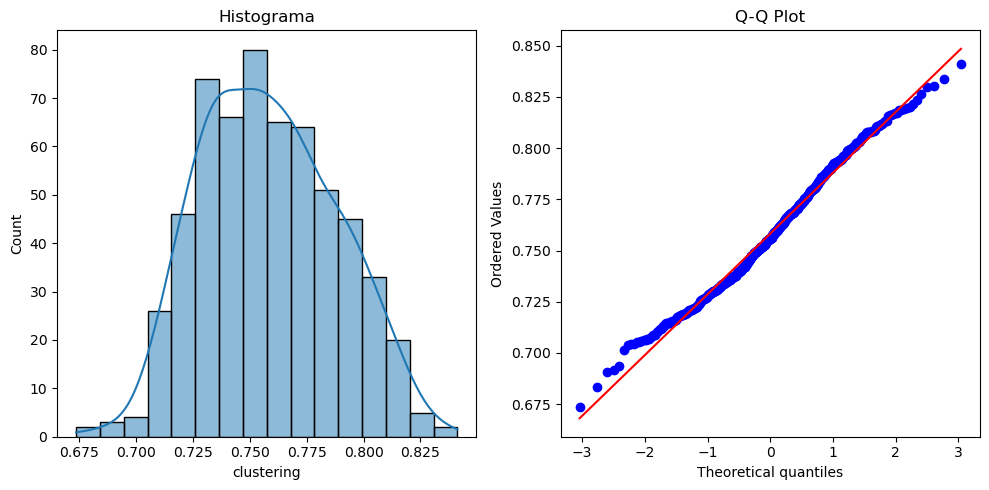

In [8]:
# Visualização dos dados com Q-Q plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(YA_BN.loc[YA_BN['density']==0.6]['clustering'], kde=True) 
plt.title('Histograma')

plt.subplot(1, 2, 2)
stats.probplot(YA_BN.loc[YA_BN['density']==0.6]['clustering'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [17]:
#stat, p = normaltest(YA_BN['entropy_geo']) 
stat, p = normaltest(YA_BN.loc[YA_BN['density']==0.68]['entropy_geo']) 

print('Estatística de Teste:', stat)
print('p-valor:', p)

alpha = 0.05 #dá pra variar essa significância também, igual o anderson-darling que testa em mais de um intervalo
if p > alpha:
    print('A amostra parece seguir uma distribuição normal (não rejeita H0)')
else:
    print('A amostra não segue uma distribuição normal (rejeita H0)')

Estatística de Teste: 16.764048292522
p-valor: 0.00022894605582078308
A amostra não segue uma distribuição normal (rejeita H0)


In [10]:
YA_BN['clustering'].describe()

count    44638.000000
mean         0.854643
std          0.088768
min          0.536042
25%          0.789855
50%          0.863499
75%          0.926078
max          1.000000
Name: clustering, dtype: float64

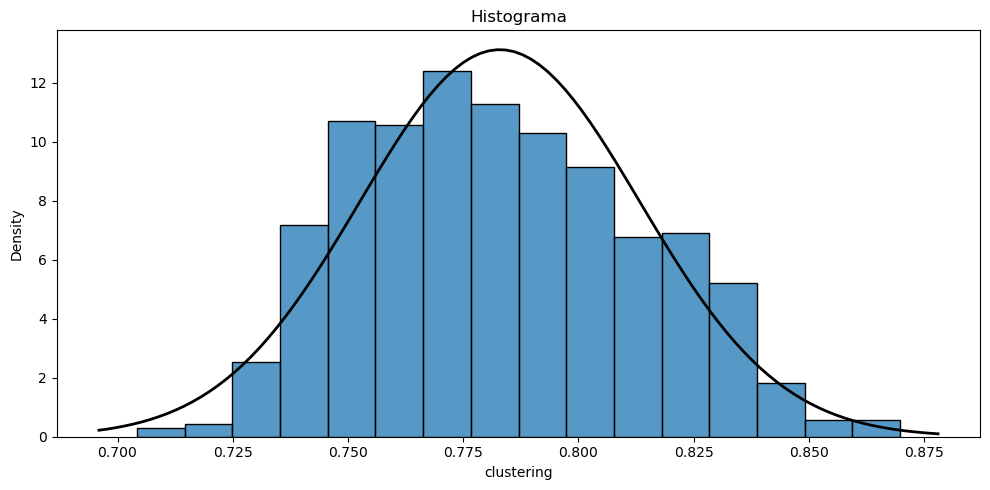

In [11]:
from scipy.stats import norm
plt.figure(figsize=(10, 5))

sns.histplot(YA_BN.loc[YA_BN['density']==0.65]['clustering'], stat='density')
plt.title('Histograma')

mu, std = norm.fit(YA_BN.loc[YA_BN['density']==0.65]['clustering'])

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
plt.tight_layout()
plt.show()

In [12]:
result_kl_div = special.kl_div(YA_BN.loc[YA_BN['Gender']=='M']['clustering'], YA_BN.loc[YA_BN['Gender']=='F']['clustering'])
result_kl_div

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
44633   NaN
44634   NaN
44635   NaN
44636   NaN
44637   NaN
Name: clustering, Length: 44638, dtype: float64

In [13]:
shapiro_test = stats.shapiro(YA_BN.loc[YA_BN['Gender']=='M']['clustering'])
shapiro_test

c:\Users\mathe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9664536714553833, pvalue=0.0)

## Plots

Text(0.5, 1.0, 'Comparison of cluster coeficient between genders in Aging')

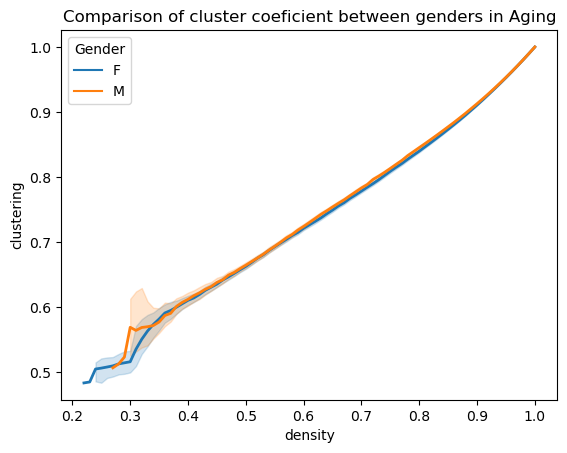

In [9]:
#err_kws = {'capsize': 2, 'capthick': 2, 'elinewidth': 2}

sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', hue = 'Gender', lw = 2)
             #err_style = 'bars') # Changes from a confidence interval to error bars
             #err_kws = err_kws, 
             #style = 'Gender', markers = ['o','^'], dashes = False)
plt.title('Comparison of cluster coeficient between genders in Aging')


Text(0.5, 1.0, 'Comparison of cluster coeficient between genders in Aging')

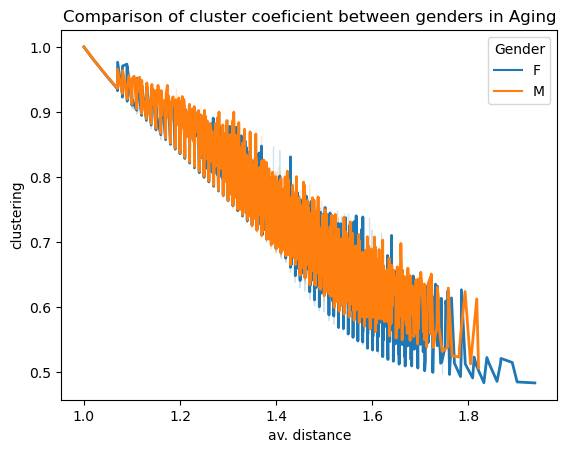

In [11]:
#err_kws = {'capsize': 2, 'capthick': 2, 'elinewidth': 2}

sns.lineplot(data = Aging_BN, x = 'av. distance', y = 'clustering', hue = 'Gender', lw = 2)
             #err_style = 'bars') # Changes from a confidence interval to error bars
             #err_kws = err_kws, 
             #style = 'Gender', markers = ['o','^'], dashes = False)
plt.title('Comparison of cluster coeficient between genders in Aging')


Text(0.5, 1.0, 'Comparison of cluster coeficient X average distance in YA and aging')

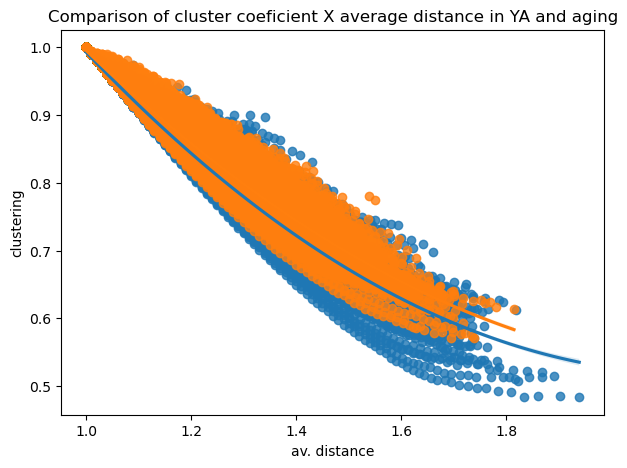

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.regplot(data = Aging_BN, x = 'av. distance', y = 'clustering', order = 2, label = "Aging", ax=ax)
sns.regplot(data = YA_BN, x = 'av. distance', y = 'clustering', order = 2, label = "YA", ax=ax)
plt.title('Comparison of cluster coeficient X average distance in YA and aging')


Text(0.5, 1.0, 'Comparison of cluster coeficient in YA and Aging')

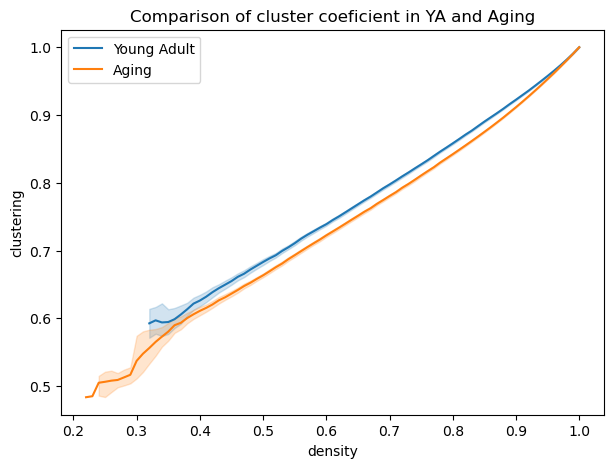

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'clustering', label = 'Young Adult', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', label = 'Aging', ax=ax)
plt.title('Comparison of cluster coeficient in YA and Aging')


Text(0.5, 1.0, 'Degree-distribution entropy X Geodesic entropy')

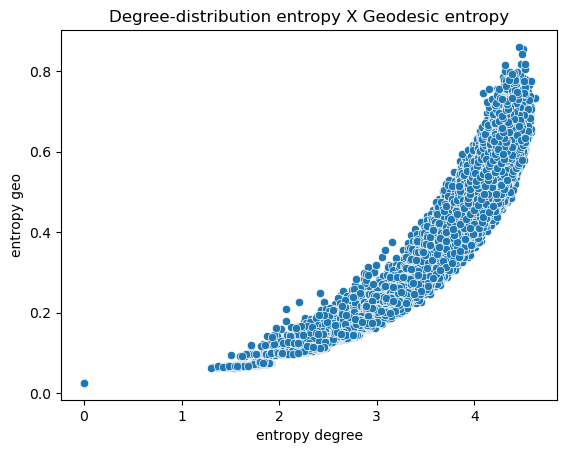

In [17]:
sns.scatterplot(data = YA_BN, x = 'entropy degree', y = 'entropy geo')

plt.title('Degree-distribution entropy X Geodesic entropy')


Text(0.5, 1.0, 'Comparison of cluster coeficient in different Atlas - Young Adult')

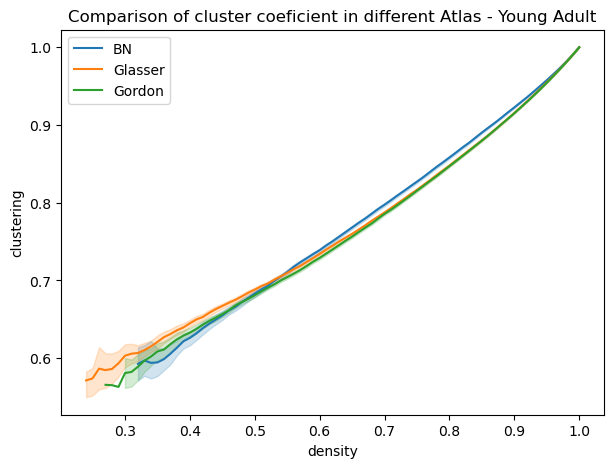

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'clustering', label = 'BN', ax=ax)
sns.lineplot(data = YA_glasser, x = 'density', y = 'clustering', label = 'Glasser', ax=ax)
sns.lineplot(data = YA_gordon, x = 'density', y = 'clustering', label = 'Gordon', ax=ax)

plt.title('Comparison of cluster coeficient in different Atlas - Young Adult')


Text(0.5, 1.0, 'Comparison of cluster coeficient in different Atlas - Aging')

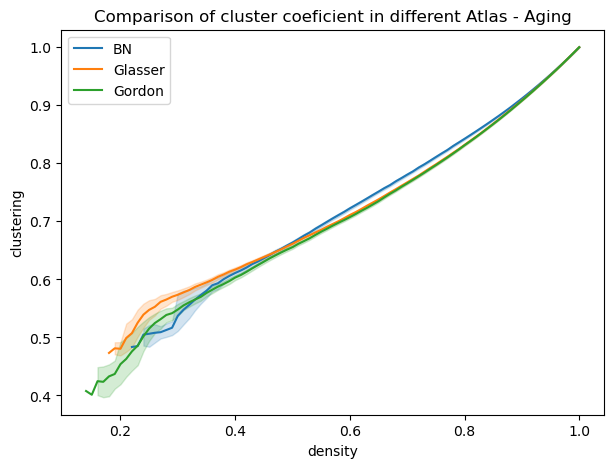

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', label = 'BN', ax=ax)
sns.lineplot(data = Aging_glasser, x = 'density', y = 'clustering', label = 'Glasser', ax=ax)
sns.lineplot(data = Aging_gordon, x = 'density', y = 'clustering', label = 'Gordon', ax=ax)

plt.title('Comparison of cluster coeficient in different Atlas - Aging')


Text(0.5, 1.0, 'Comparison of cluster coeficient in different Atlas - YA and Aging')

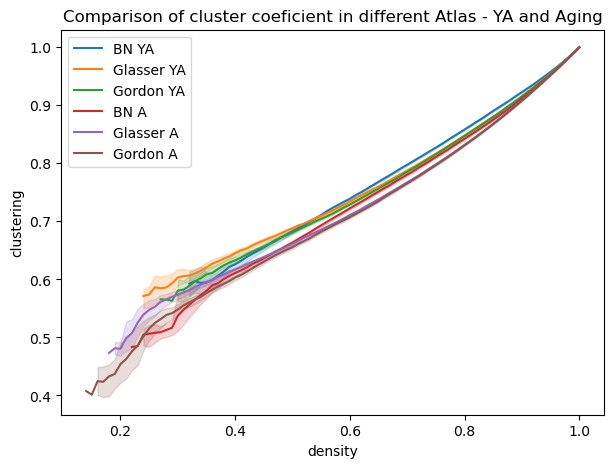

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'clustering', label = 'BN YA', ax=ax)
sns.lineplot(data = YA_glasser, x = 'density', y = 'clustering', label = 'Glasser YA', ax=ax)
sns.lineplot(data = YA_gordon, x = 'density', y = 'clustering', label = 'Gordon YA', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', label = 'BN A', ax=ax)
sns.lineplot(data = Aging_glasser, x = 'density', y = 'clustering', label = 'Glasser A', ax=ax)
sns.lineplot(data = Aging_gordon, x = 'density', y = 'clustering', label = 'Gordon A', ax=ax)

plt.title('Comparison of cluster coeficient in different Atlas - YA and Aging')


Text(0.5, 1.0, 'Comparison of cluster coeficient in YA and Aging')

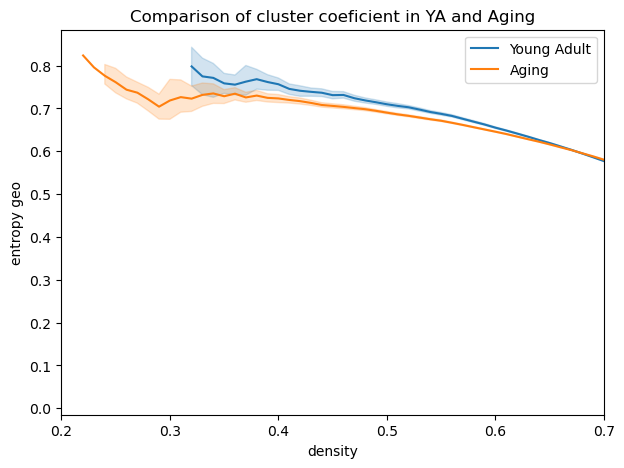

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlim(0.2,0.7)
sns.lineplot(data = YA_BN, x = 'density', y = 'entropy geo', label = 'Young Adult', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'entropy geo', label = 'Aging', ax=ax)
plt.title('Comparison of cluster coeficient in YA and Aging')

Text(0.5, 1.0, 'Comparison of geodesic entropy between genders in YA')

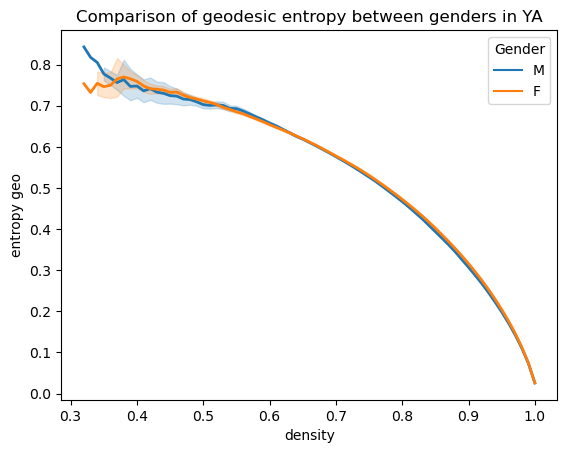

In [23]:
sns.lineplot(data = YA_BN, x = 'density', y = 'entropy geo', hue = 'Gender', lw = 2)
             #err_style = 'bars') # Changes from a confidence interval to error bars
             #err_kws = err_kws, 
             #style = 'Gender', markers = ['o','^'], dashes = False)
plt.title('Comparison of geodesic entropy between genders in YA')

# Random plots

## Young adult: BN

Text(0.5, 1.0, 'Comparison of cluster coeficient in young adult and random: BN')

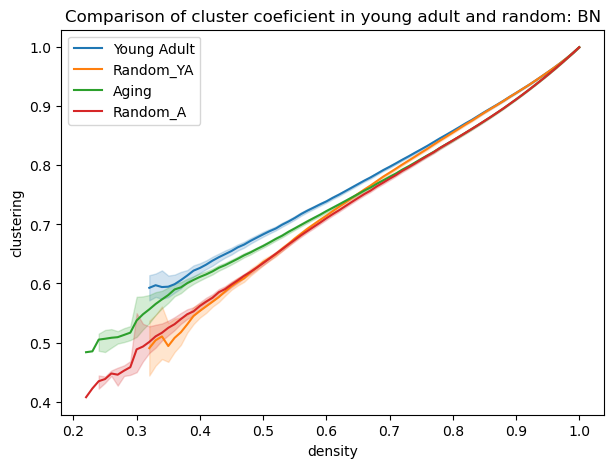

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'clustering', label = 'Young Adult', ax=ax)
sns.lineplot(data = random_YA_BN, x = 'density', y = 'clustering', label = 'Random_YA', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', label = 'Aging', ax=ax)
sns.lineplot(data = random_Aging_BN, x = 'density', y = 'clustering', label = 'Random_A', ax=ax)
plt.title('Comparison of cluster coeficient in young adult and random: BN')

Text(0.5, 1.0, 'Comparison of geodesic entropy in young adult and random: BN')

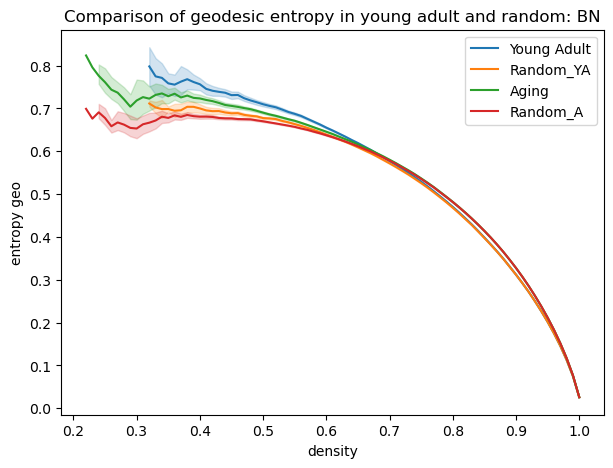

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'entropy geo', label = 'Young Adult', ax=ax)
sns.lineplot(data = random_YA_BN, x = 'density', y = 'entropy_geo', label = 'Random_YA', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'entropy geo', label = 'Aging', ax=ax)
sns.lineplot(data = random_Aging_BN, x = 'density', y = 'entropy_geo', label = 'Random_A', ax=ax)
plt.title('Comparison of geodesic entropy in young adult and random: BN')

Text(0.5, 1.0, 'Comparison of degree-distribution entropy in young adult and random: BN')

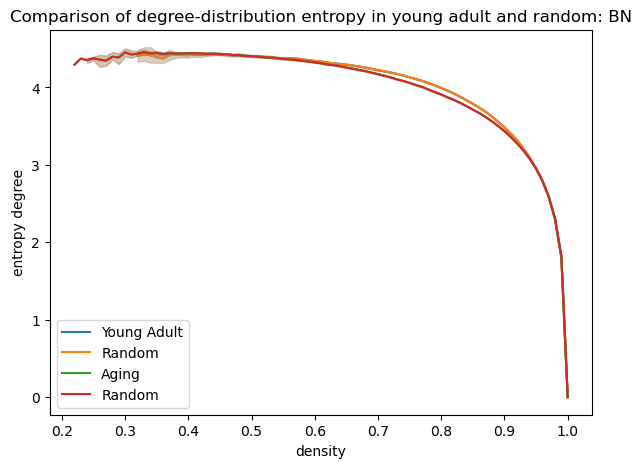

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'entropy degree', label = 'Young Adult', ax=ax)
sns.lineplot(data = random_YA_BN, x = 'density', y = 'entropy_degree', label = 'Random', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'entropy degree', label = 'Aging', ax=ax)
sns.lineplot(data = random_Aging_BN, x = 'density', y = 'entropy_degree', label = 'Random', ax=ax)
plt.title('Comparison of degree-distribution entropy in young adult and random: BN')

Text(0.5, 1.0, 'Comparison of geodesic std in young adult and random: BN')

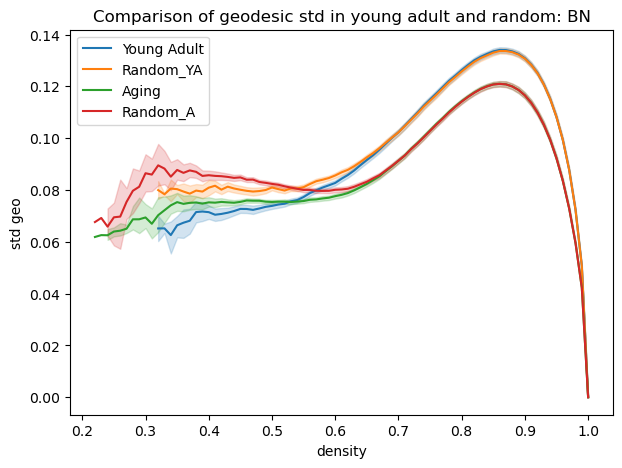

In [30]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'std geo', label = 'Young Adult', ax=ax)
sns.lineplot(data = random_YA_BN, x = 'density', y = 'std_geo', label = 'Random_YA', ax=ax)
sns.lineplot(data = Aging_BN, x = 'density', y = 'std geo', label = 'Aging', ax=ax)
sns.lineplot(data = random_Aging_BN, x = 'density', y = 'std_geo', label = 'Random_A', ax=ax)
plt.title('Comparison of geodesic std in young adult and random: BN')

Text(0.5, 1.0, 'Comparison of average distance in young adult and random: BN')

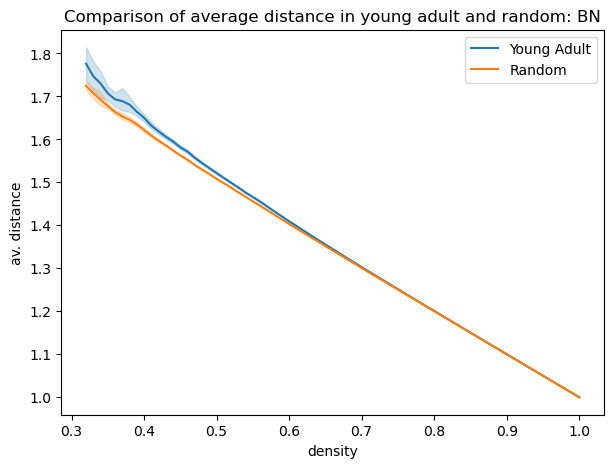

In [33]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = YA_BN, x = 'density', y = 'av. distance', label = 'Young Adult', ax=ax)
sns.lineplot(data = random_YA_BN, x = 'density', y = 'av_distance', label = 'Random', ax=ax)
plt.title('Comparison of average distance in young adult and random: BN')

## Aging: BN

Text(0.5, 1.0, 'Comparison of cluster coeficient in Aging and random: BN')

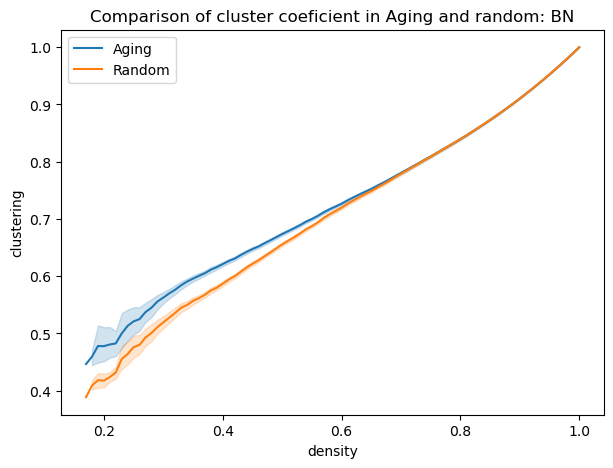

In [17]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data = Aging_BN, x = 'density', y = 'clustering', label = 'Aging', ax=ax)
sns.lineplot(data = random_Aging_BN, x = 'density', y = 'clustering', label = 'Random', ax=ax)
plt.title('Comparison of cluster coeficient in Aging and random: BN')